In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_auc_score
import scikitplot as skplt
%matplotlib inline

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.shape

(284807, 31)

In [6]:
data.describe().T


count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  3.918649e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  5.682686e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -8.761736e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.811118e-15      1.415869   -5.683171     -0.848640   
V5      284807.0 -1.552103e-15      1.380247 -113.743307     -0.691597   
V6      284807.0  2.040130e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -1.698953e-15      1.237094  -43.557242     -0.554076   
V8      284807.0 -1.893285e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -3.147640e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  1.772925e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  9.289524e-16      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.803266e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  1.674888e-15      0.995274   -5.791881     -0.648539   
V14     284807.0  1.475621e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  3.501098e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.392460e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -7.466538e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  4.258754e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  9.019919e-16      0.814041   -7.213527     -0.456299   
V20     284807.0  5.126845e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.473120e-16      0.734524  -34.830382     -0.228395   
V22     284807.0  8.042109e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  5.282512e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.456271e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  1.426896e-15      0.521278  -10.295397     -0.317145   
V26     284807.0  1.701640e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.662252e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.217809e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [7]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.duplicated().sum()

1081

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data = data.reset_index().drop(columns="index")

<AxesSubplot:>

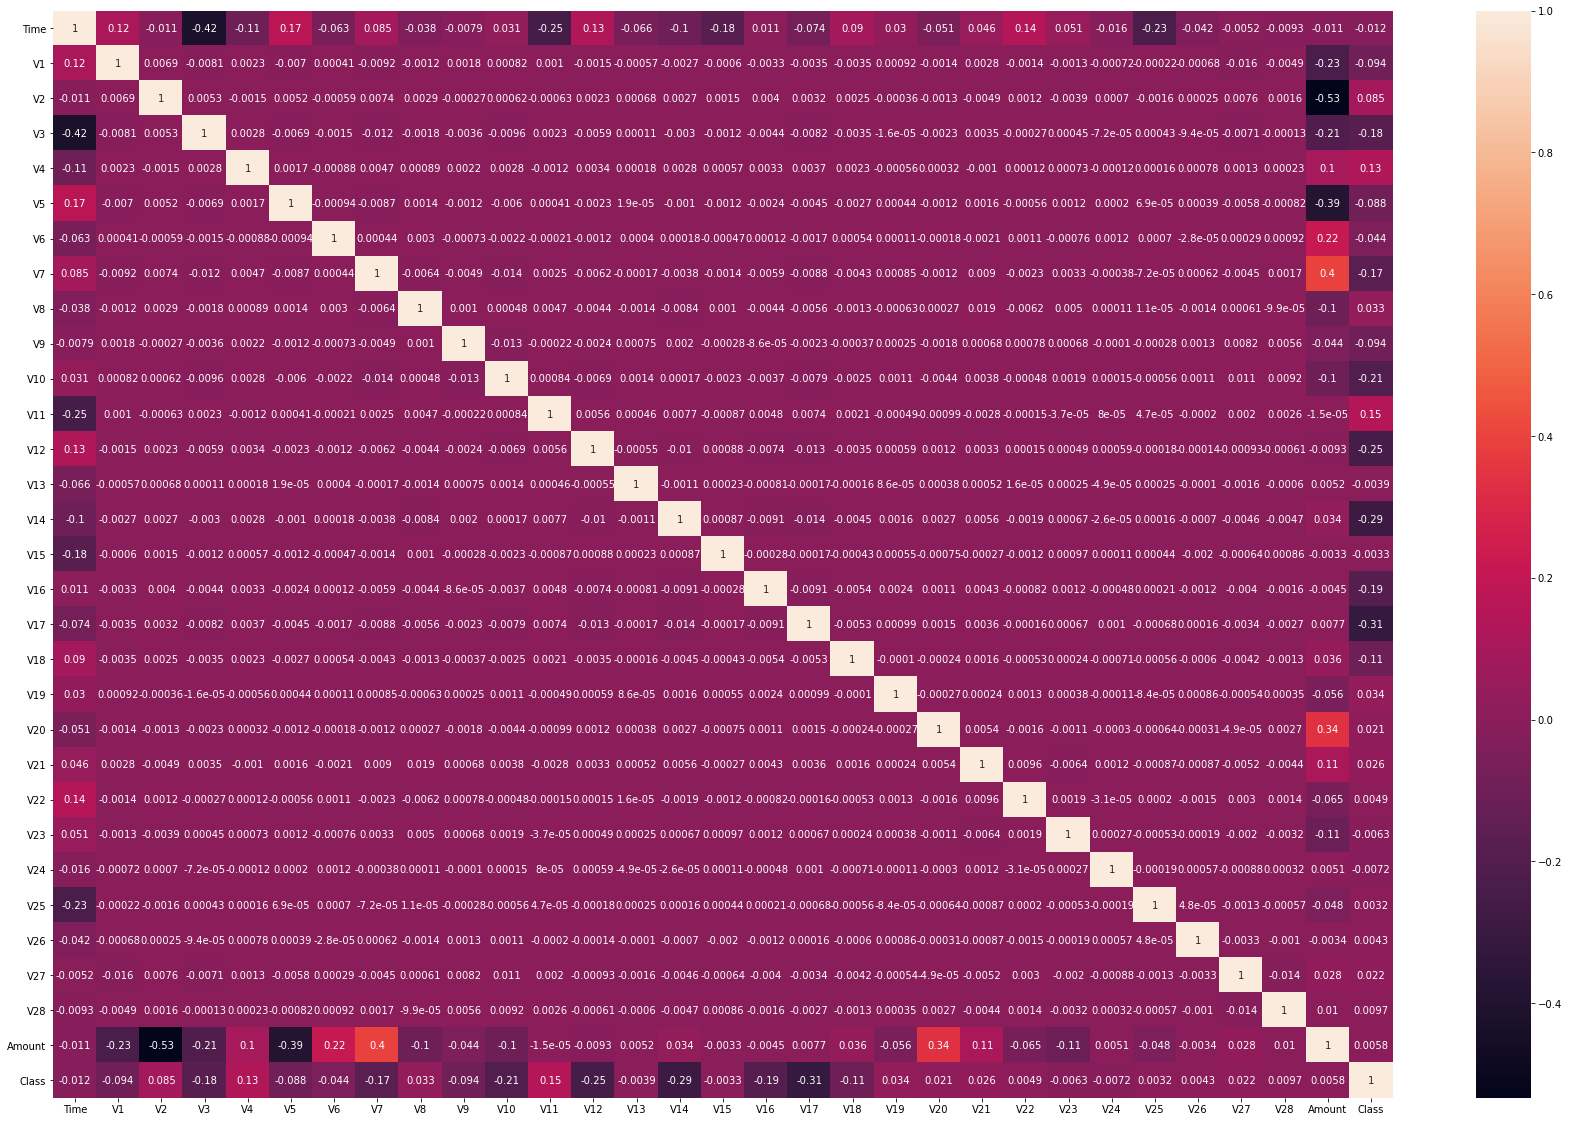

In [11]:
plt.rcParams["figure.figsize"]=(30,20)
sns.heatmap(data.corr(),annot=True)

In [12]:
trans = StandardScaler()

In [13]:
data_scale=pd.DataFrame(trans.fit_transform(data.drop(columns="Class")), columns= data.drop(columns="Class").columns)

In [14]:
data_scale =pd.concat([data_scale,data['Class']],axis=1)

<AxesSubplot:>

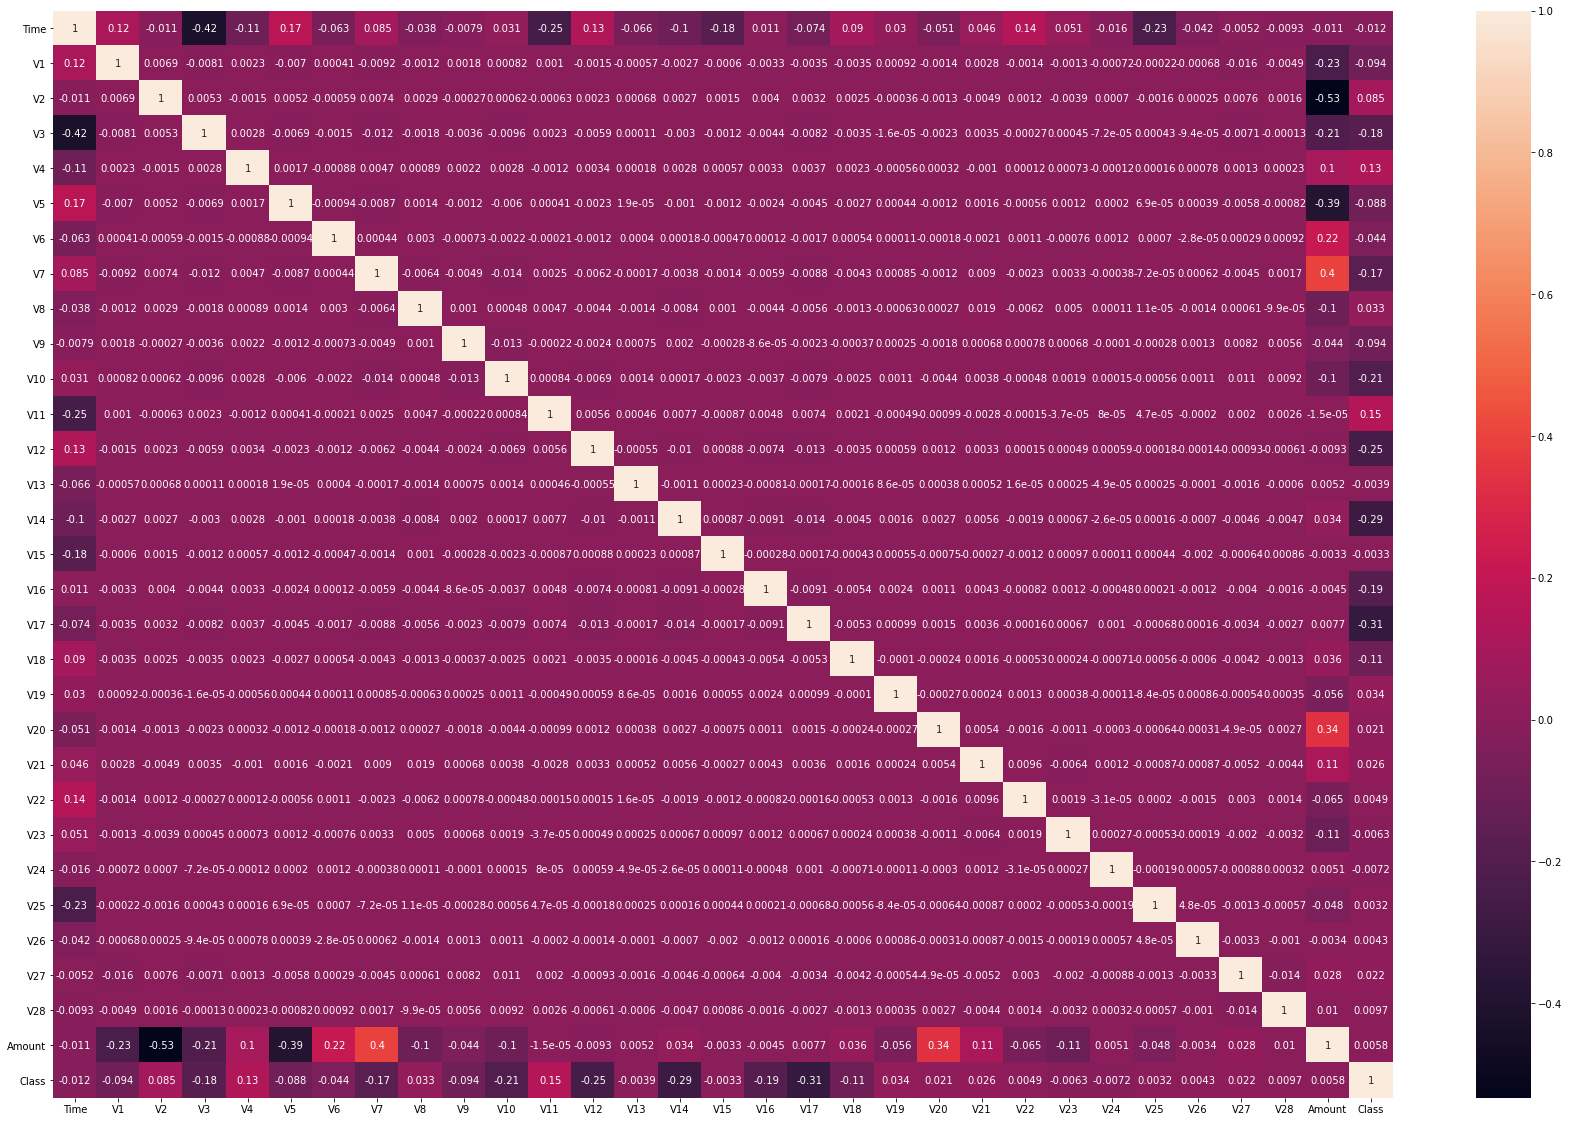

In [15]:

sns.heatmap(data.corr(),annot=True)

In [16]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

C:\Users\nived\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

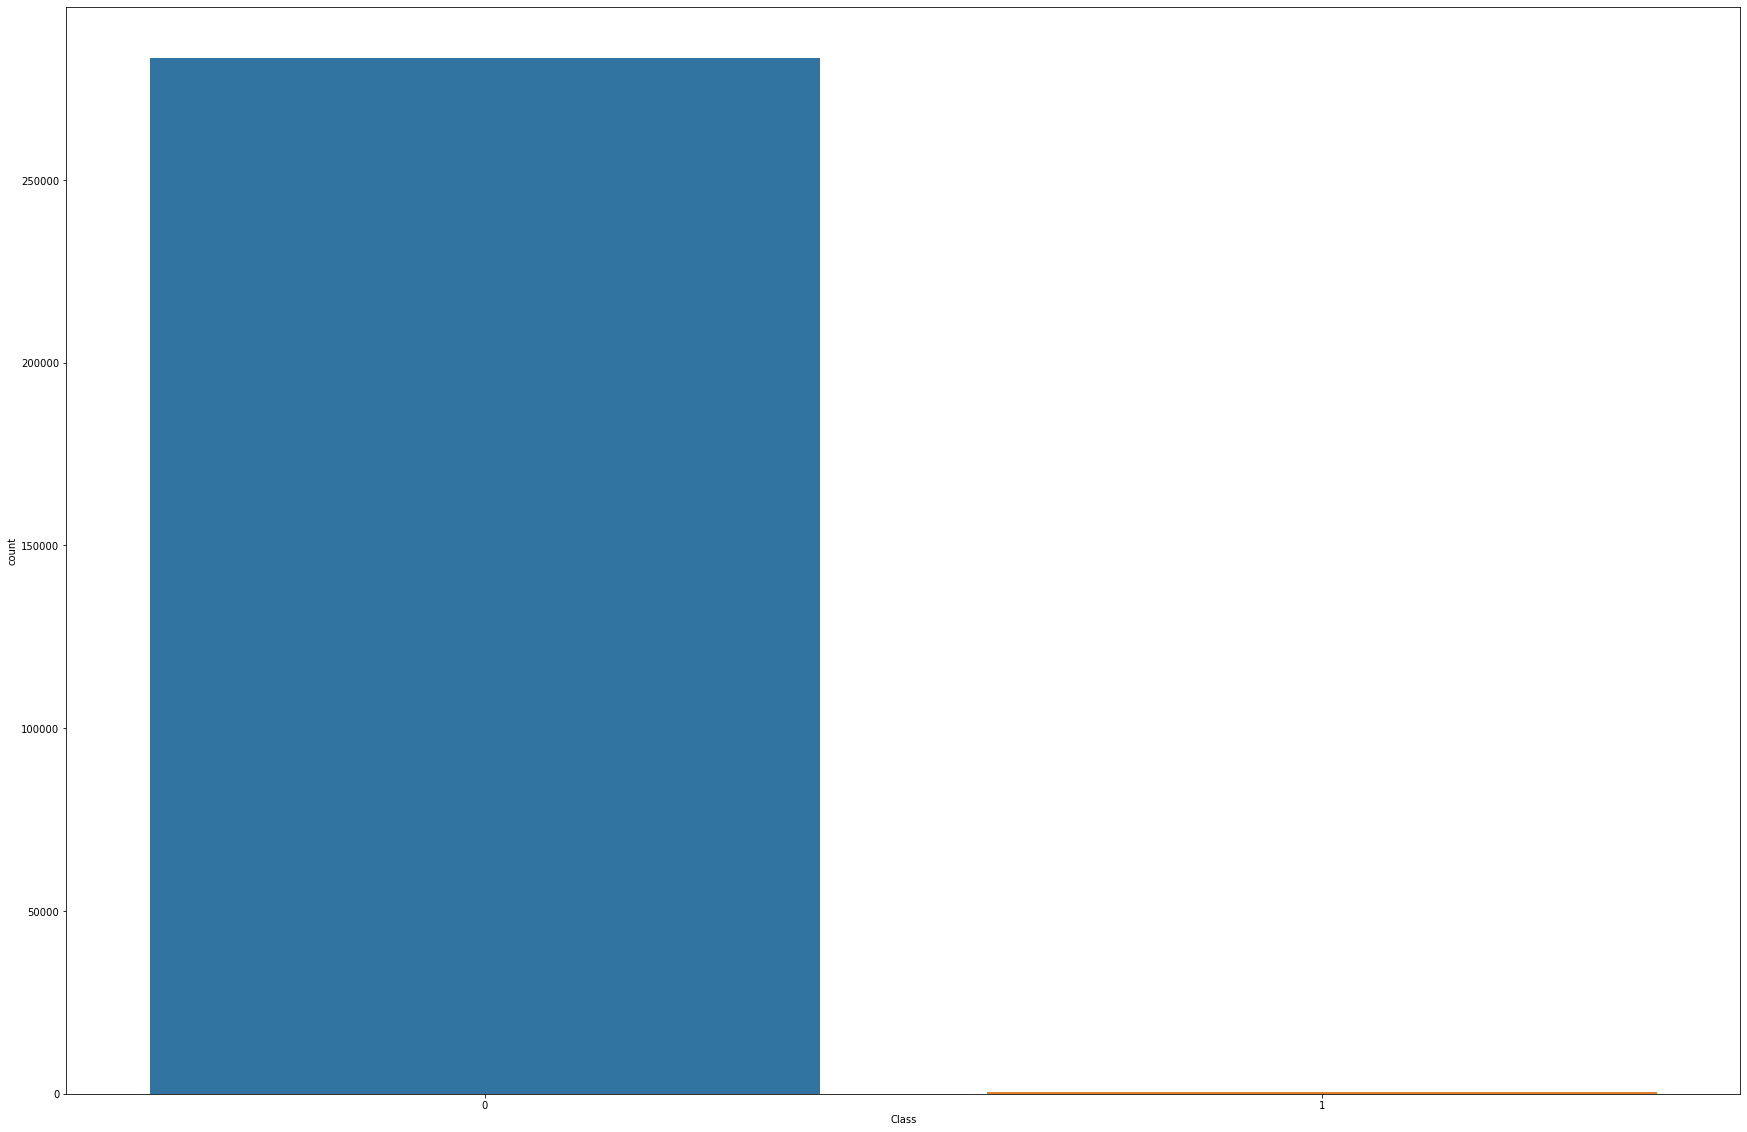

In [17]:
sns.countplot(data.Class)

In [18]:
nm = NearMiss()

In [19]:
x_under,y_under  = nm.fit_resample(data_scale.drop(columns='Class'),data_scale['Class'])

C:\Users\nived\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

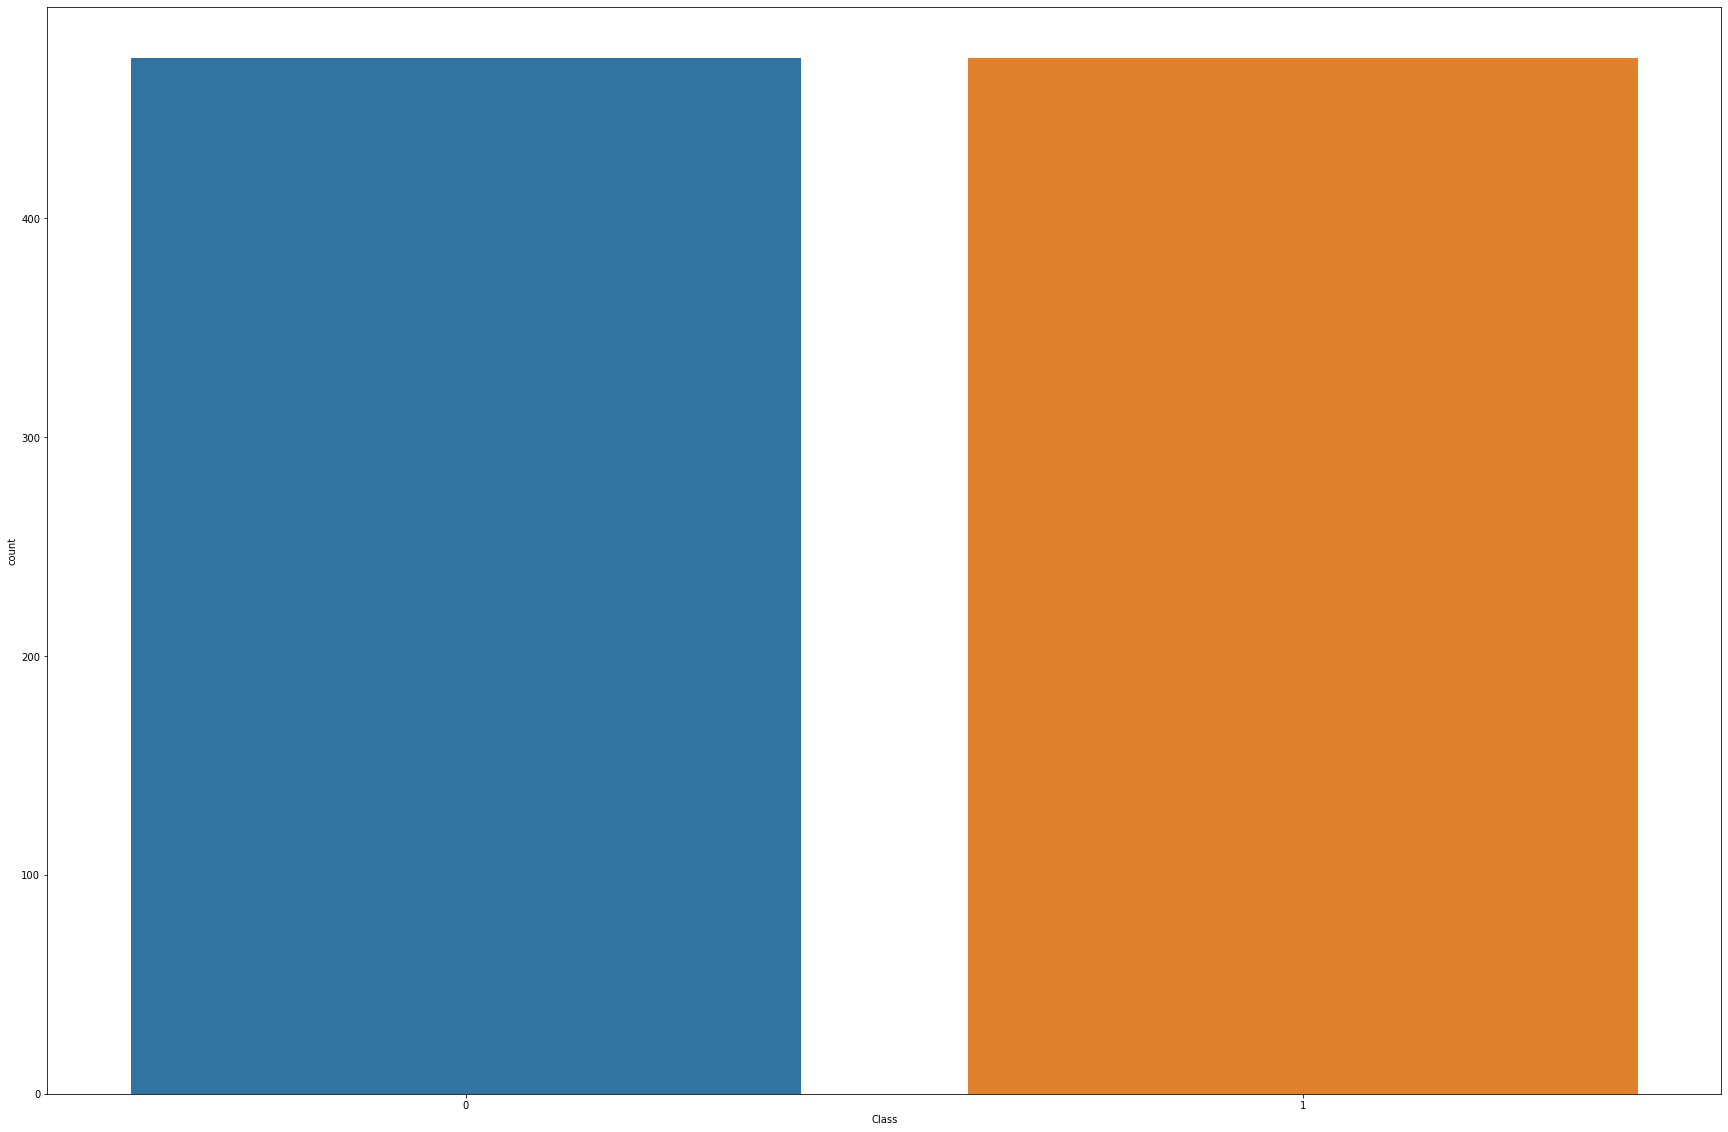

In [20]:
sns.countplot(y_under)

In [21]:
data_undersampled=pd.concat([x_under,y_under],axis=1)

<AxesSubplot:>

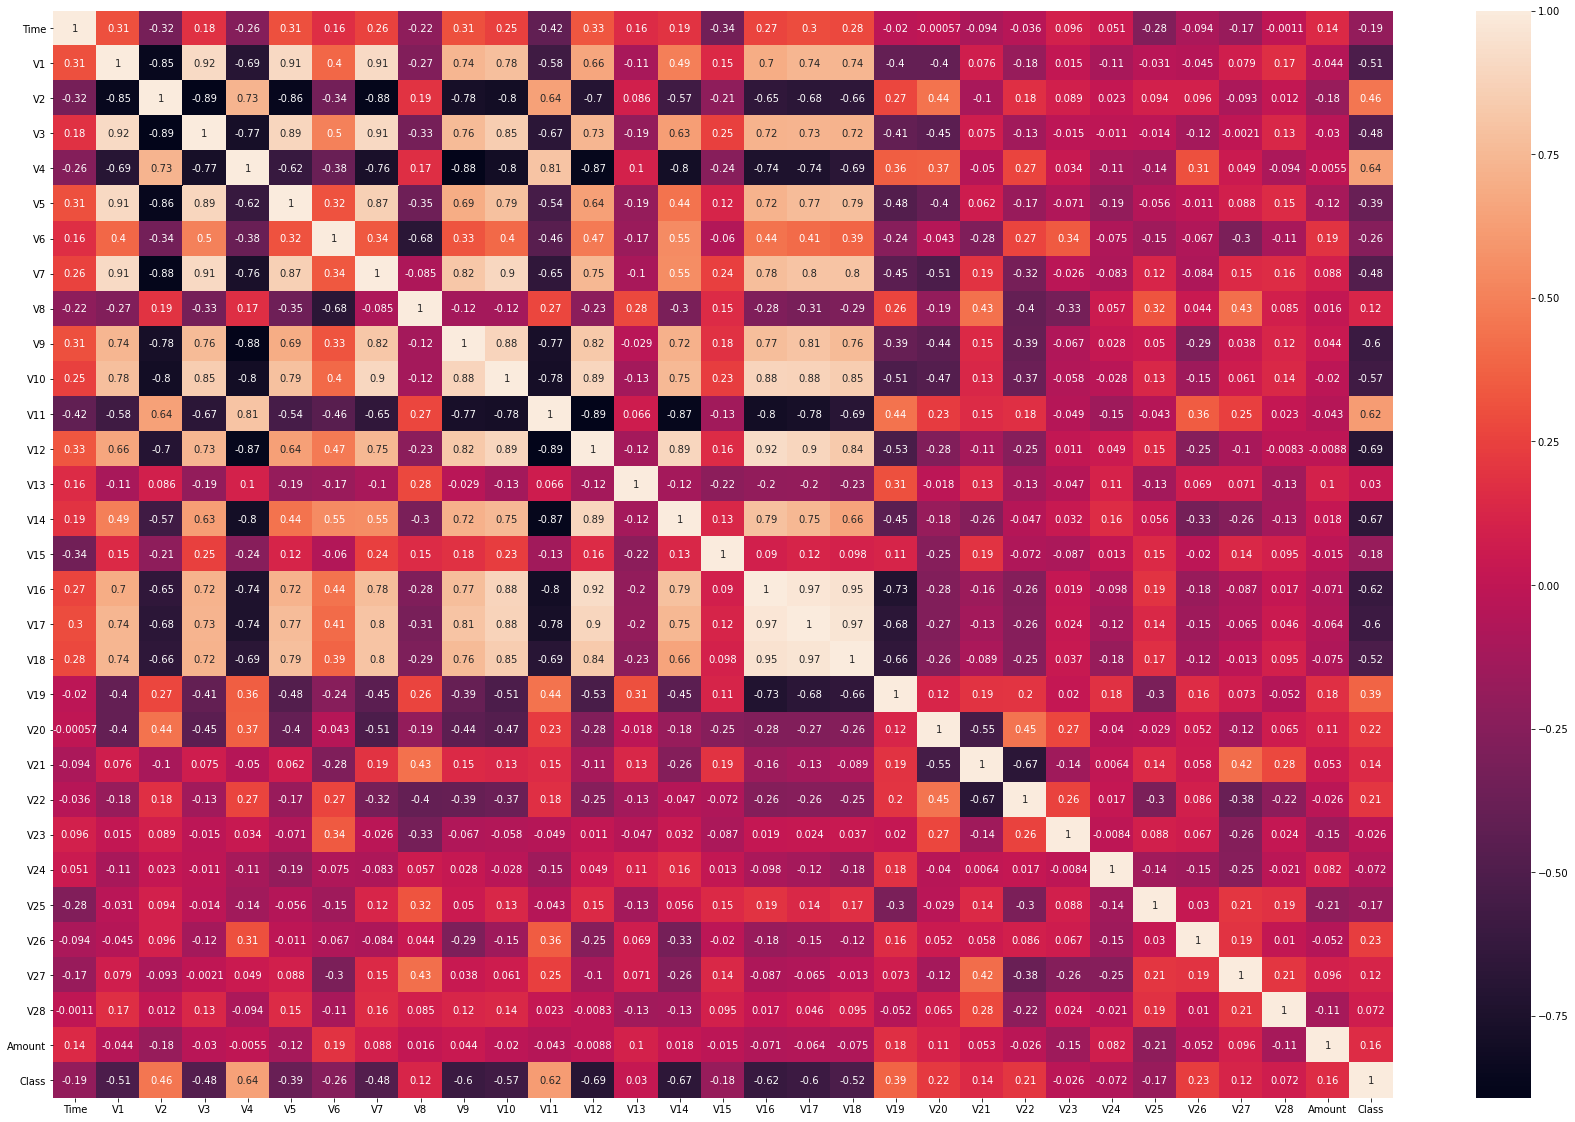

In [22]:
sns.heatmap(data_undersampled.corr(),annot=True)

In [23]:
X = data_undersampled.drop(columns=['Class','Time','V13'])

In [24]:
y=data_undersampled['Class']

In [25]:
train_X, test_X, train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=9)

In [26]:
def model_fit(model, train_X, train_y, test_X):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred))
    print("Train confusion matrix : \n",confusion_matrix(train_y, train_pred))
    print("Train AUC : ", roc_auc_score(train_y, train_pred))
    test_pred = model.predict(test_X)
    print("Test Accuracy : ",accuracy_score(test_y, test_pred))
    print("Test confusion matrix : \n",confusion_matrix(test_y, test_pred))
    print("Test AUC : ", roc_auc_score(test_y, test_pred))
    skplt.metrics.plot_roc_curve(test_y, model.predict_proba(test_X))
    return roc_auc_score(train_y, train_pred), roc_auc_score(test_y, test_pred)

Train Accuracy :  0.9563492063492064
Train confusion matrix : 
 [[386   2]
 [ 31 337]]
Train AUC :  0.9553031151949798
Test Accuracy :  0.9421052631578948
Test confusion matrix : 
 [[84  1]
 [10 95]]
Test AUC :  0.9464985994397759


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


(0.9553031151949798, 0.9464985994397759)

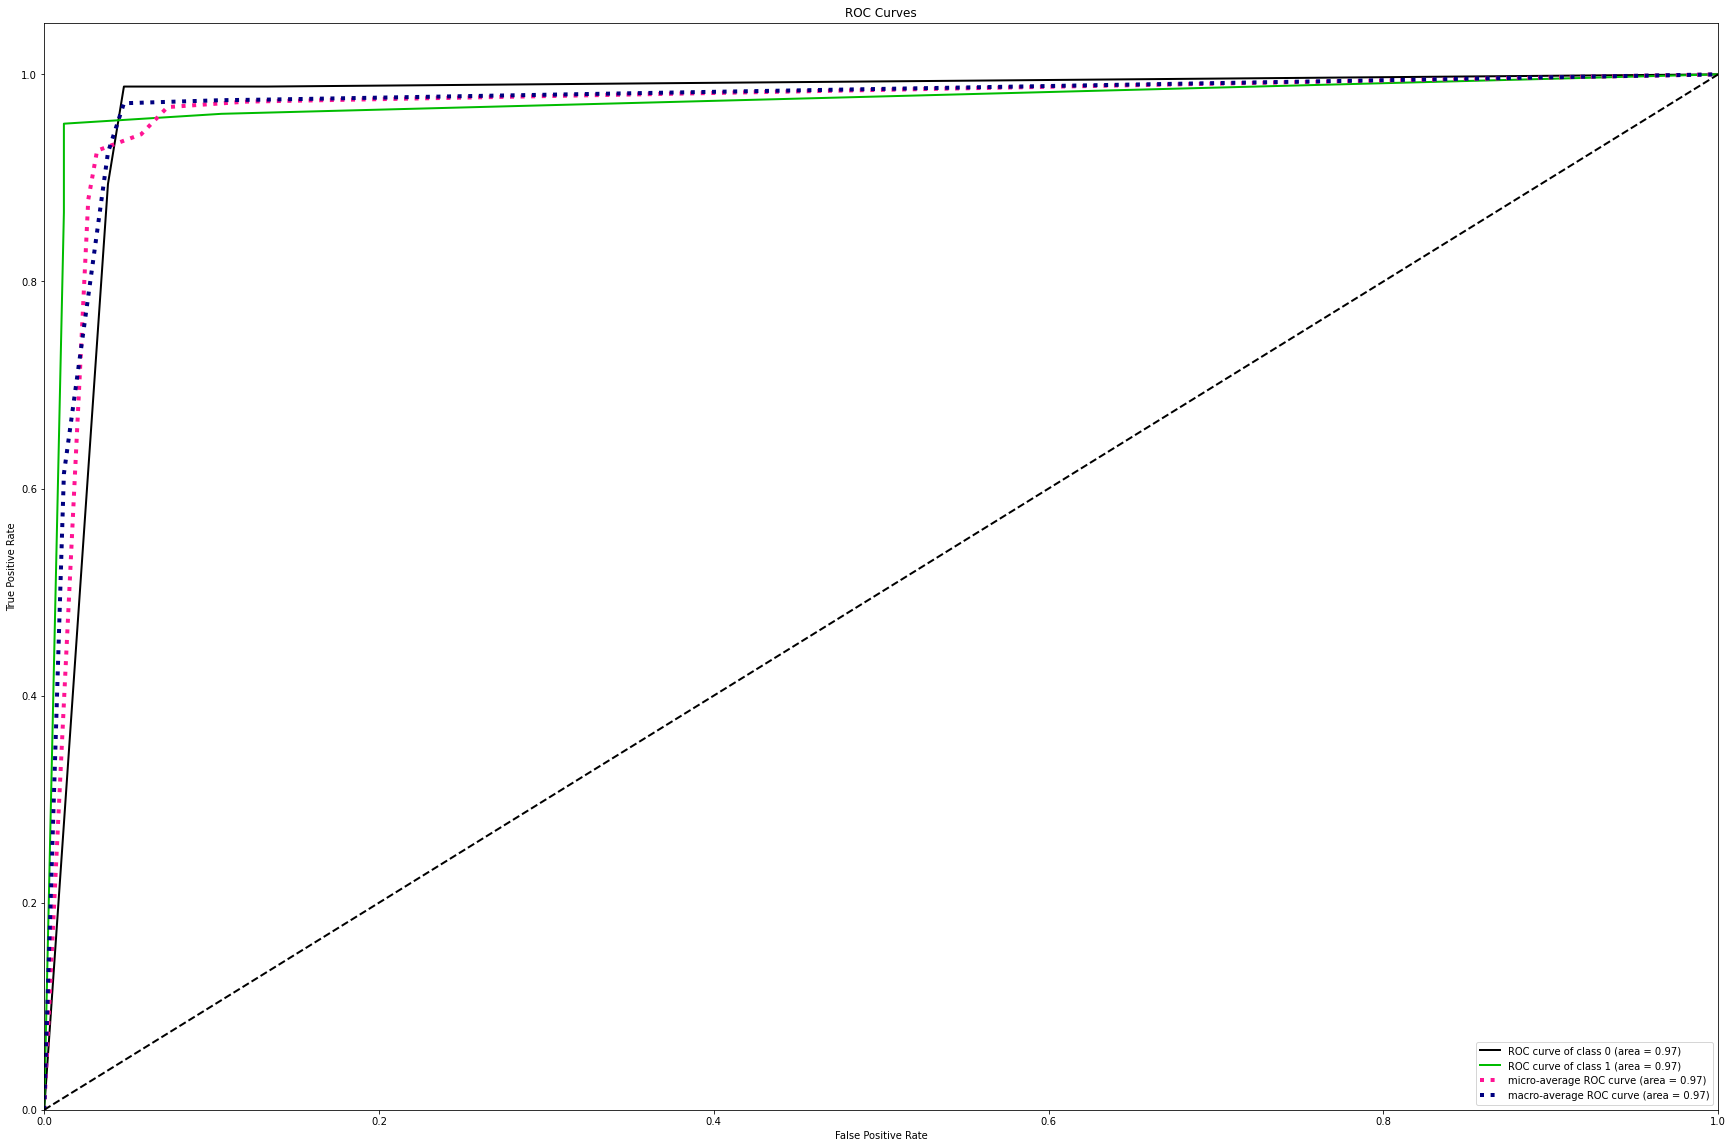

In [27]:
model = KNeighborsClassifier()
model_fit(model, train_X, train_y, test_X)

1
Train Accuracy :  1.0
Train confusion matrix : 
 [[388   0]
 [  0 368]]
Train AUC :  1.0
Test Accuracy :  0.9578947368421052
Test confusion matrix : 
 [[ 82   3]
 [  5 100]]
Test AUC :  0.9585434173669468
2
Train Accuracy :  0.9682539682539683
Train confusion matrix : 
 [[388   0]
 [ 24 344]]
Train AUC :  0.9673913043478262
Test Accuracy :  0.9578947368421052
Test confusion matrix : 
 [[84  1]
 [ 7 98]]
Test AUC :  0.9607843137254902
3
Train Accuracy :  0.9708994708994709
Train confusion matrix : 
 [[385   3]
 [ 19 349]]
Train AUC :  0.9703188032272524
Test Accuracy :  0.9631578947368421
Test confusion matrix : 
 [[84  1]
 [ 6 99]]
Test AUC :  0.9655462184873951
4


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


Train Accuracy :  0.951058201058201
Train confusion matrix : 
 [[386   2]
 [ 35 333]]
Train AUC :  0.9498683325862842
Test Accuracy :  0.9368421052631579
Test confusion matrix : 
 [[84  1]
 [11 94]]
Test AUC :  0.9417366946778712
5
Train Accuracy :  0.9563492063492064
Train confusion matrix : 
 [[386   2]
 [ 31 337]]
Train AUC :  0.9553031151949798
Test Accuracy :  0.9421052631578948
Test confusion matrix : 
 [[84  1]
 [10 95]]
Test AUC :  0.9464985994397759
6
Train Accuracy :  0.9457671957671958
Train confusion matrix : 
 [[386   2]
 [ 39 329]]
Train AUC :  0.9444335499775887
Test Accuracy :  0.9315789473684211
Test confusion matrix : 
 [[84  1]
 [12 93]]
Test AUC :  0.9369747899159664
7


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


Train Accuracy :  0.9470899470899471
Train confusion matrix : 
 [[386   2]
 [ 38 330]]
Train AUC :  0.9457922456297625
Test Accuracy :  0.9368421052631579
Test confusion matrix : 
 [[84  1]
 [11 94]]
Test AUC :  0.9417366946778712
8
Train Accuracy :  0.9404761904761905
Train confusion matrix : 
 [[386   2]
 [ 43 325]]
Train AUC :  0.9389987673688929
Test Accuracy :  0.9263157894736842
Test confusion matrix : 
 [[84  1]
 [13 92]]
Test AUC :  0.9322128851540616
9
Train Accuracy :  0.9404761904761905
Train confusion matrix : 
 [[386   2]
 [ 43 325]]
Train AUC :  0.9389987673688929
Test Accuracy :  0.9263157894736842
Test confusion matrix : 
 [[84  1]
 [13 92]]


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


Test AUC :  0.9322128851540616
10
Train Accuracy :  0.9378306878306878
Train confusion matrix : 
 [[386   2]
 [ 45 323]]
Train AUC :  0.936281376064545
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


11
Train Accuracy :  0.9378306878306878
Train confusion matrix : 
 [[386   2]
 [ 45 323]]
Train AUC :  0.936281376064545
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569
12
Train Accuracy :  0.9325396825396826
Train confusion matrix : 
 [[386   2]
 [ 49 319]]
Train AUC :  0.9308465934558494
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569
13
Train Accuracy :  0.9338624338624338
Train confusion matrix : 
 [[386   2]
 [ 48 320]]
Train AUC :  0.9322052891080232
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569
14
Train Accuracy :  0.9312169312169312
Train confusion matrix : 
 [[386   2]
 [ 50 318]]
Train AUC :  0.9294878978036755
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569
15
Train Accuracy :  0.9325396825396826
Train confusion matrix : 

C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


Train confusion matrix : 
 [[386   2]
 [ 49 319]]
Train AUC :  0.9308465934558494
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569
17
Train Accuracy :  0.9325396825396826
Train confusion matrix : 
 [[386   2]
 [ 49 319]]
Train AUC :  0.9308465934558494
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569
18
Train Accuracy :  0.9272486772486772
Train confusion matrix : 
 [[386   2]
 [ 53 315]]
Train AUC :  0.9254118108471537
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569
19


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


Train Accuracy :  0.9272486772486772
Train confusion matrix : 
 [[386   2]
 [ 53 315]]
Train AUC :  0.9254118108471537
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569
20
Train Accuracy :  0.921957671957672
Train confusion matrix : 
 [[386   2]
 [ 57 311]]
Train AUC :  0.9199770282384581
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569
21
Train Accuracy :  0.9246031746031746
Train confusion matrix : 
 [[386   2]
 [ 55 313]]
Train AUC :  0.922694419542806
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\scikitplot\metrics.py:299: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

22
Train Accuracy :  0.917989417989418
Train confusion matrix : 
 [[386   2]
 [ 60 308]]
Train AUC :  0.9159009412819363
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569
23
Train Accuracy :  0.917989417989418
Train confusion matrix : 
 [[386   2]
 [ 60 308]]
Train AUC :  0.9159009412819363
Test Accuracy :  0.9210526315789473
Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569
24
Train Accuracy :  0.9153439153439153
Train confusion matrix : 
 [[386   2]
 [ 62 306]]
Train AUC :  0.9131835499775885
Test Accuracy :  0.9210526315789473


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


Test confusion matrix : 
 [[84  1]
 [14 91]]
Test AUC :  0.9274509803921569


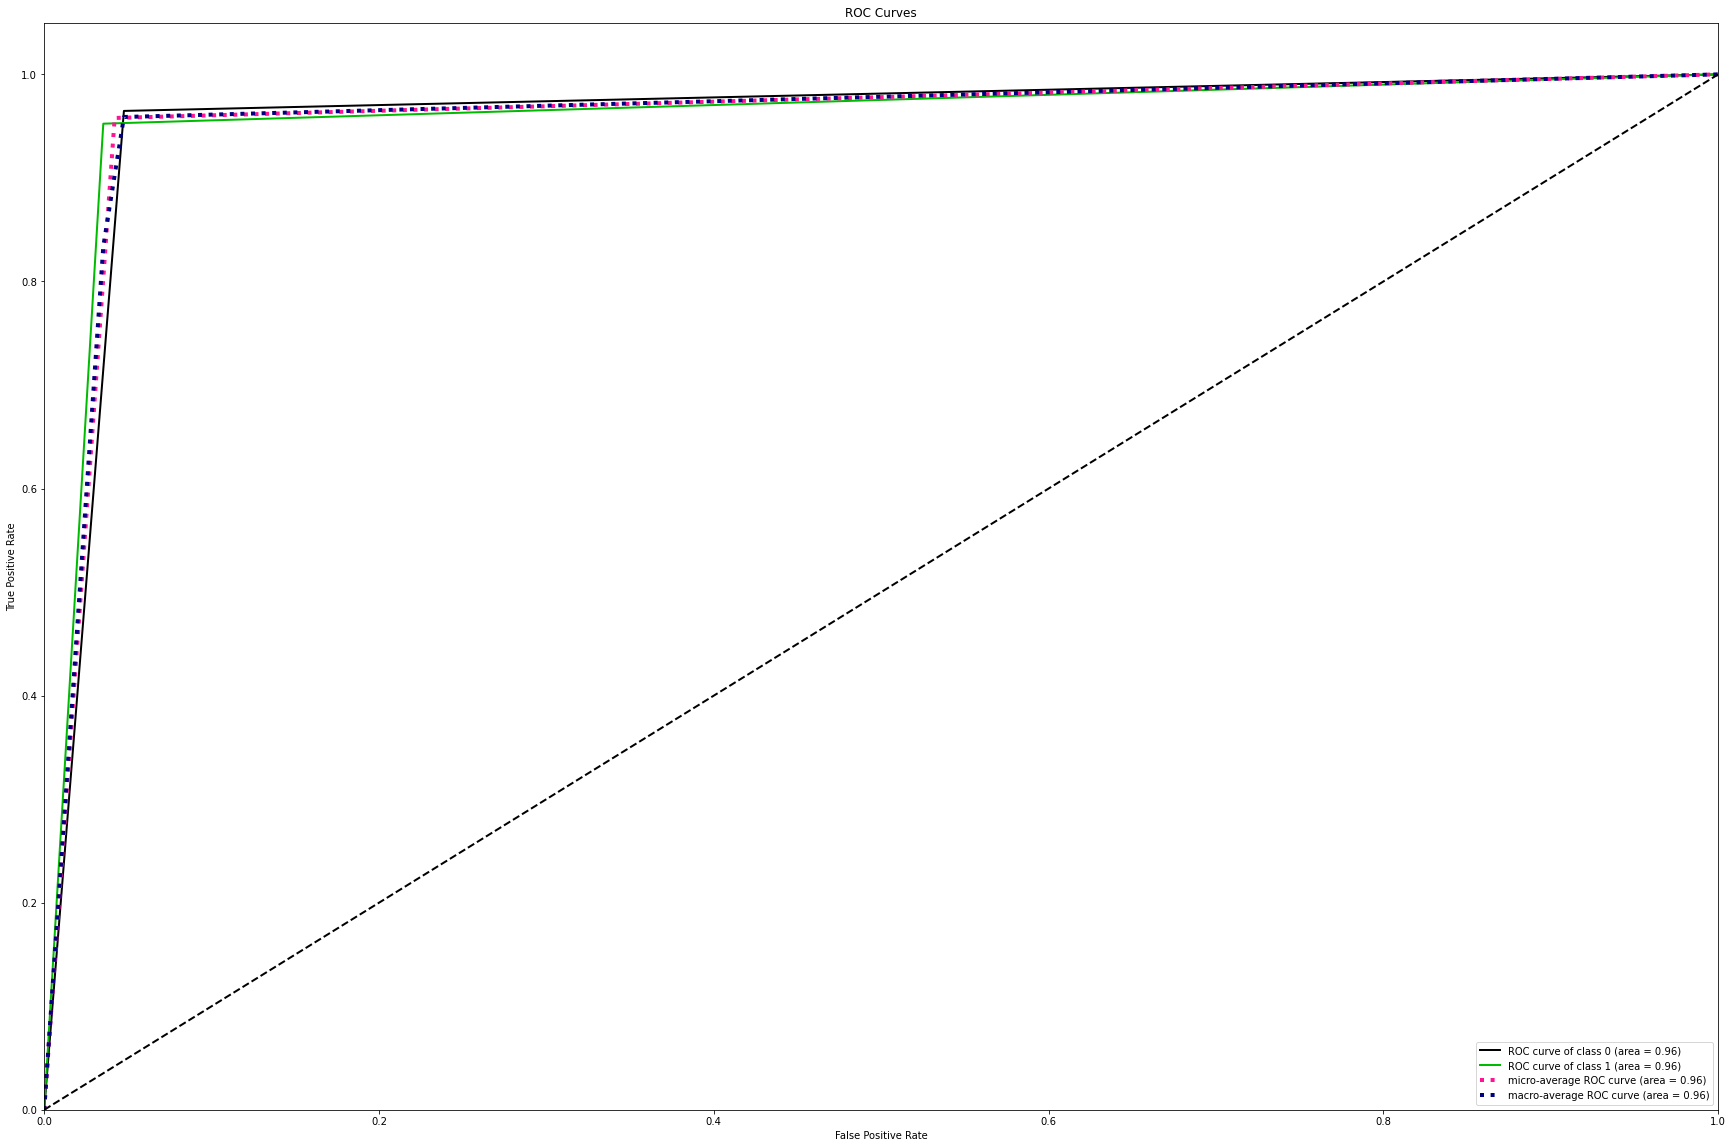

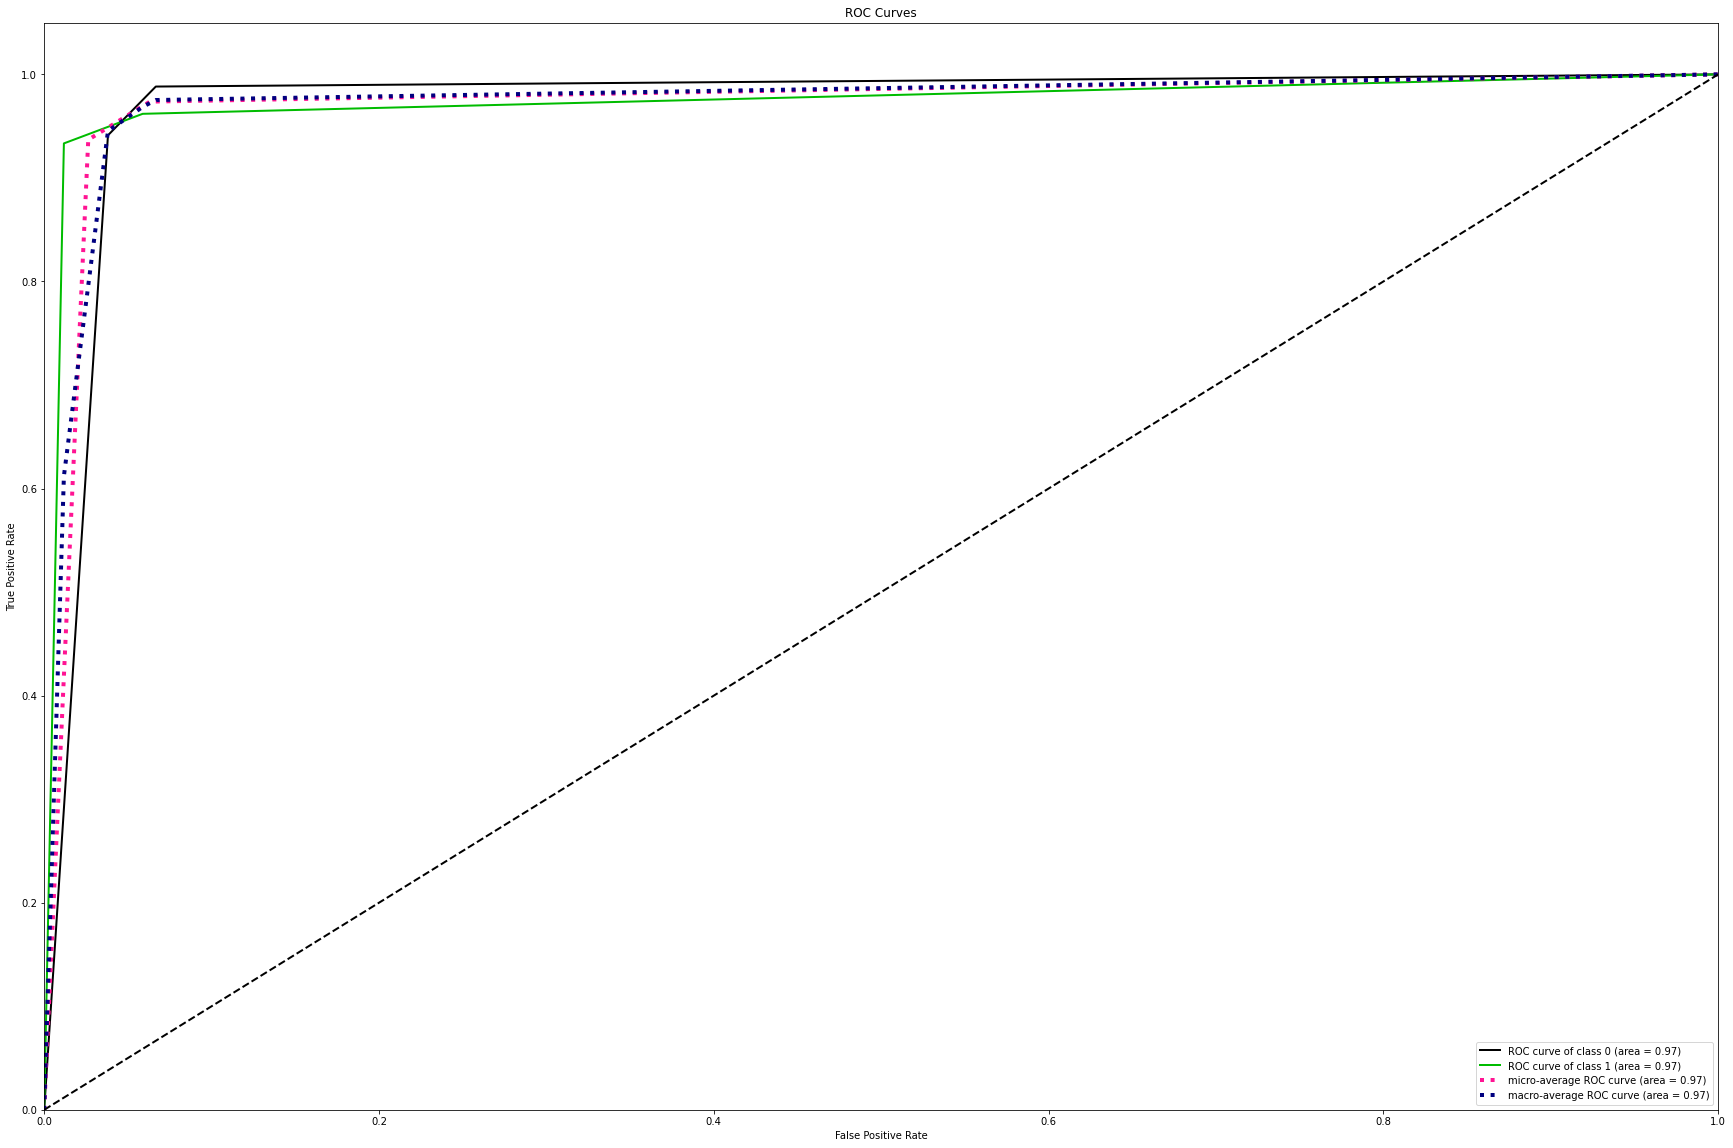

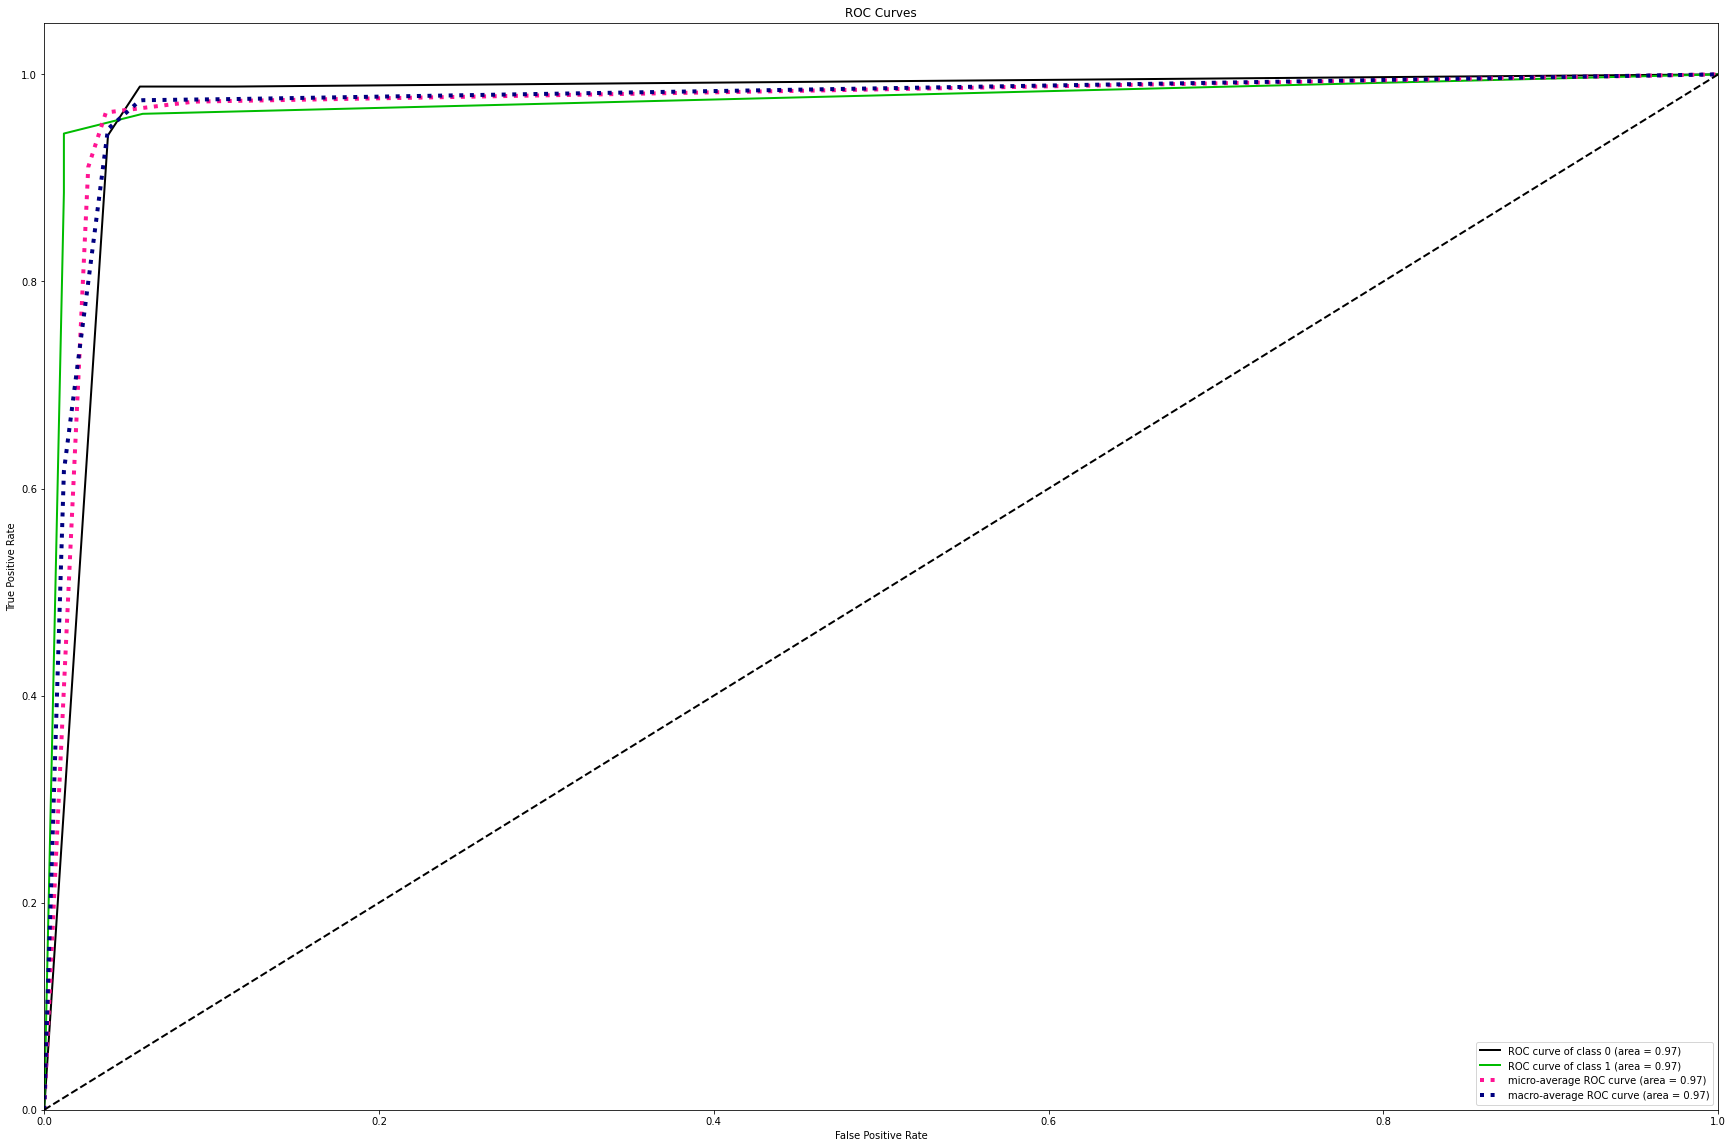

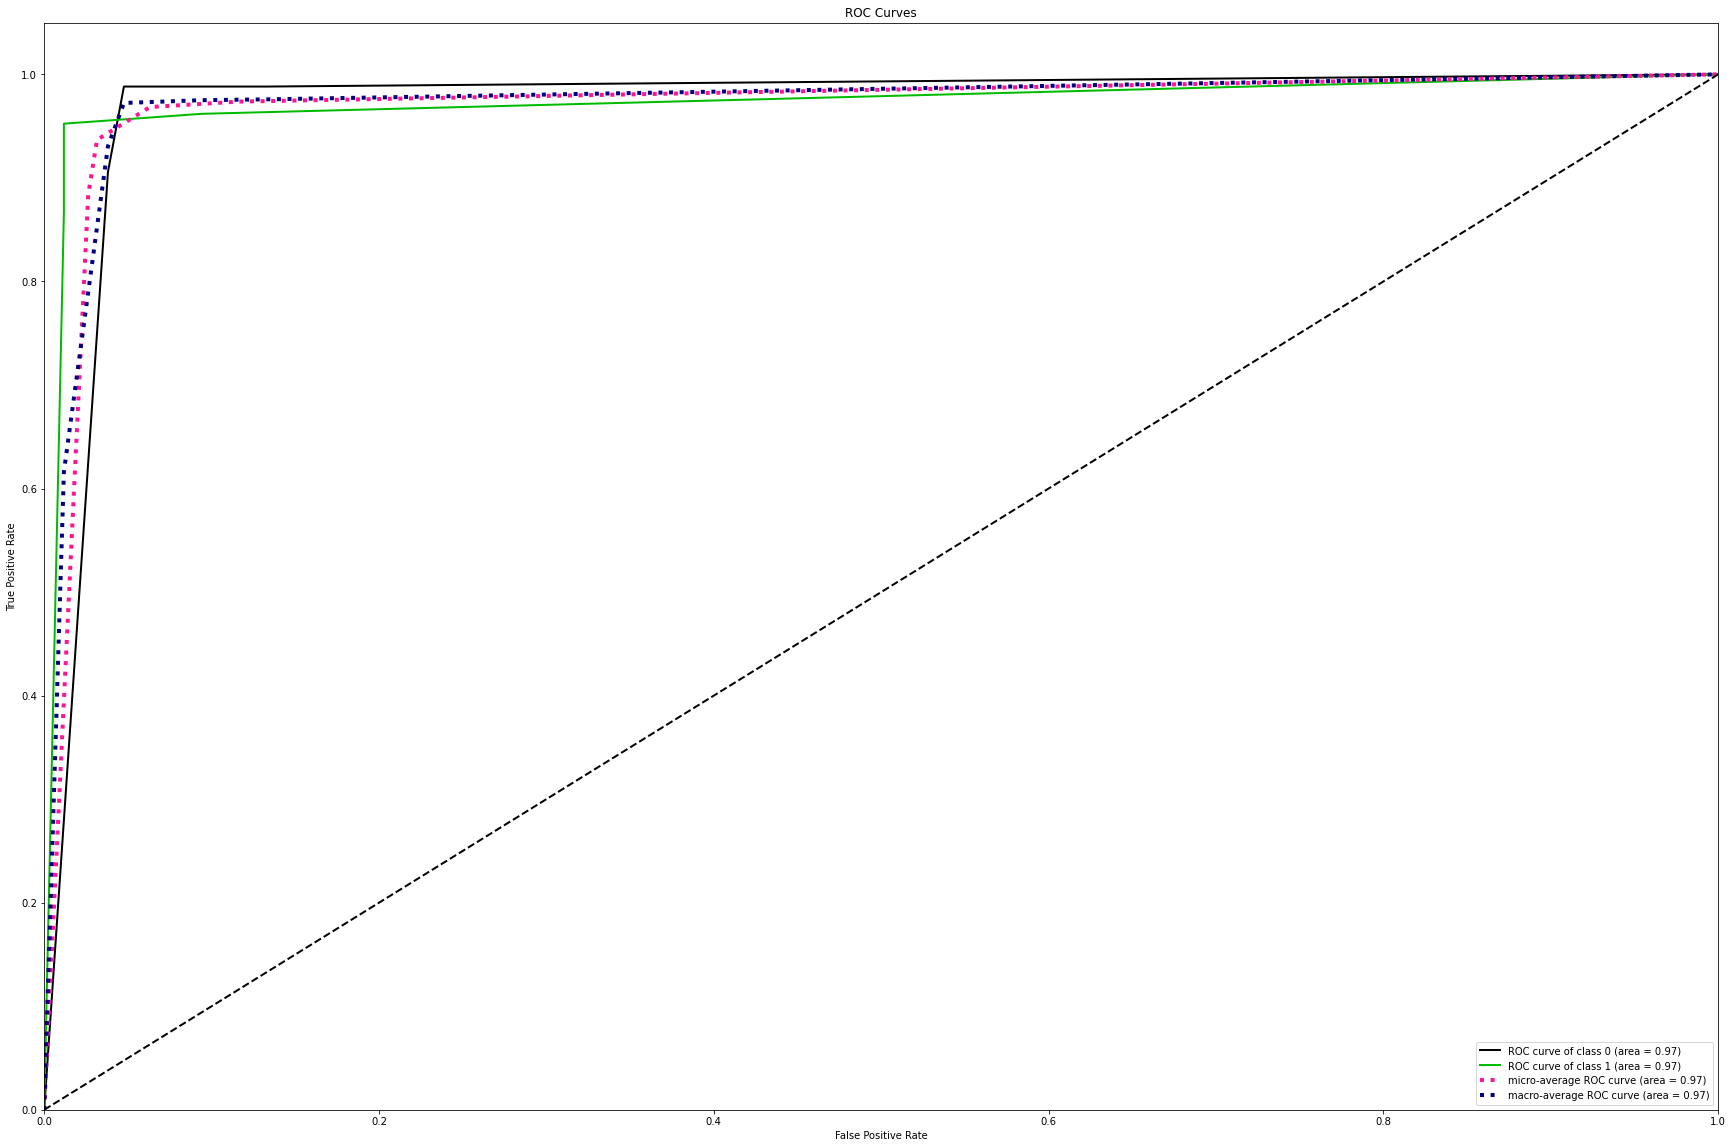

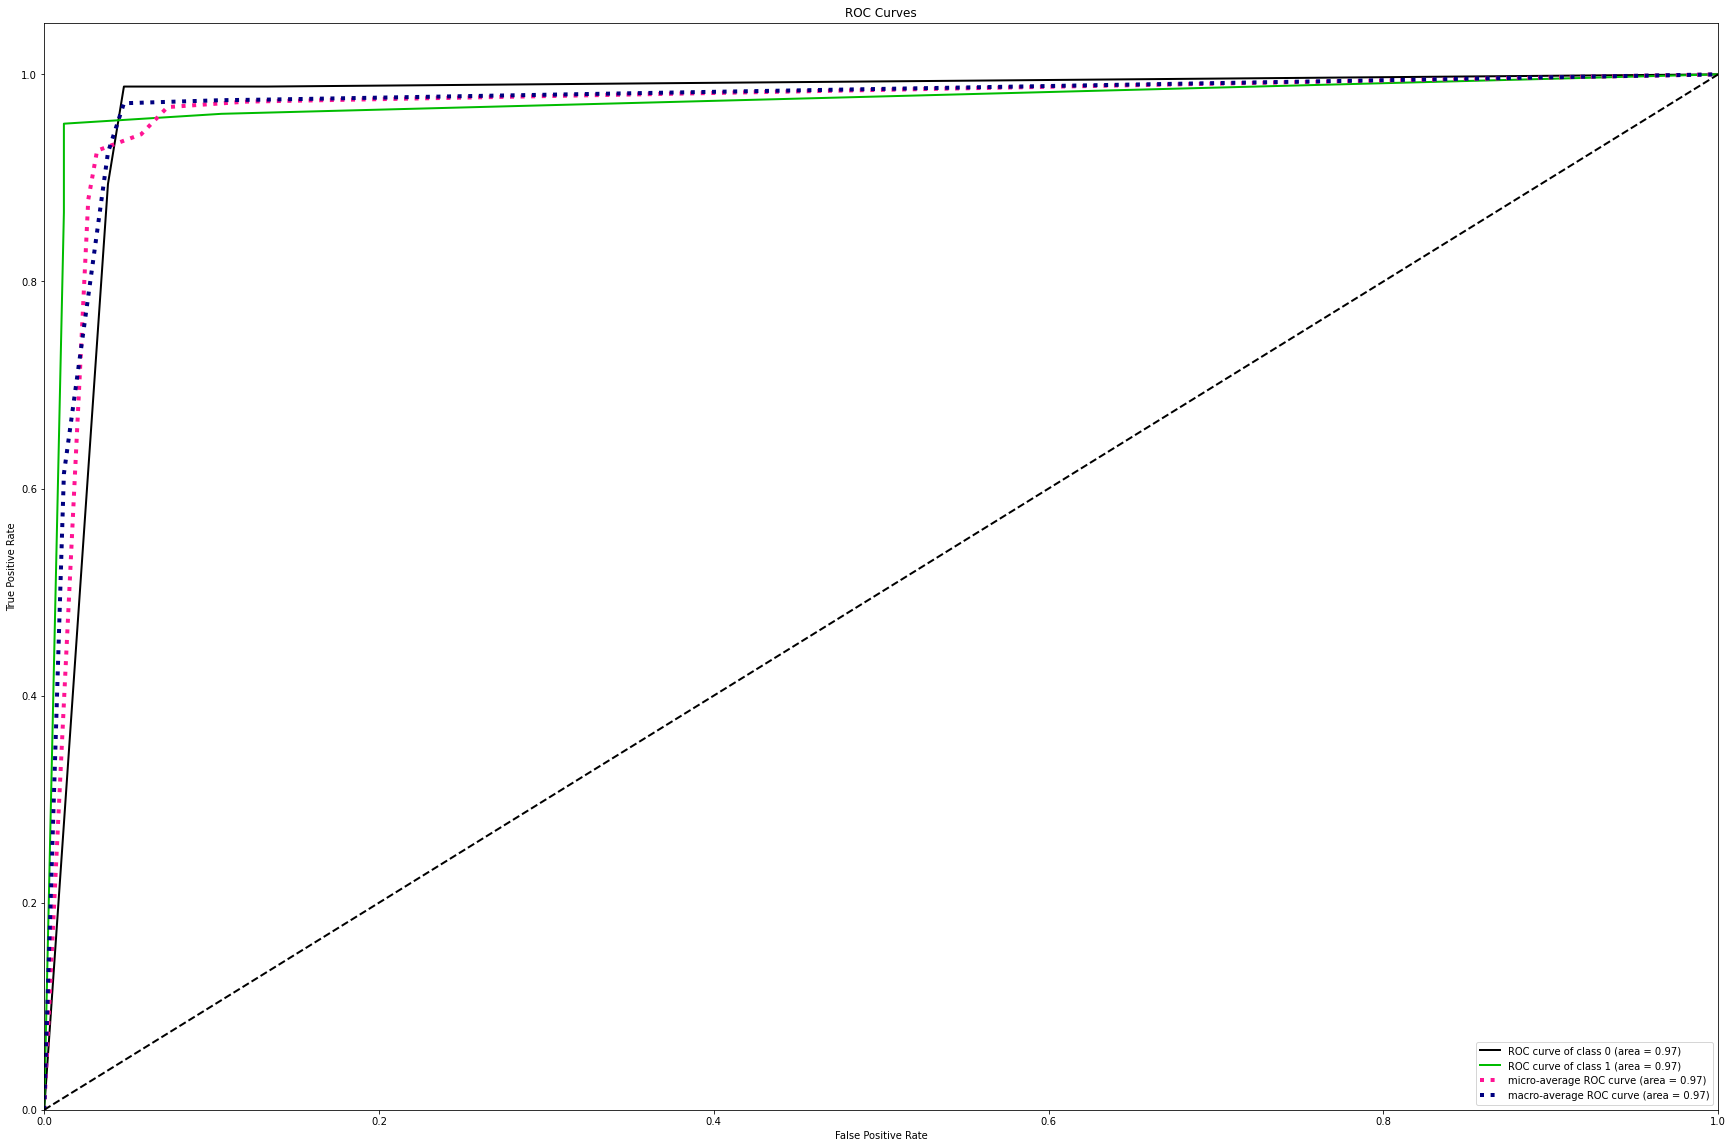

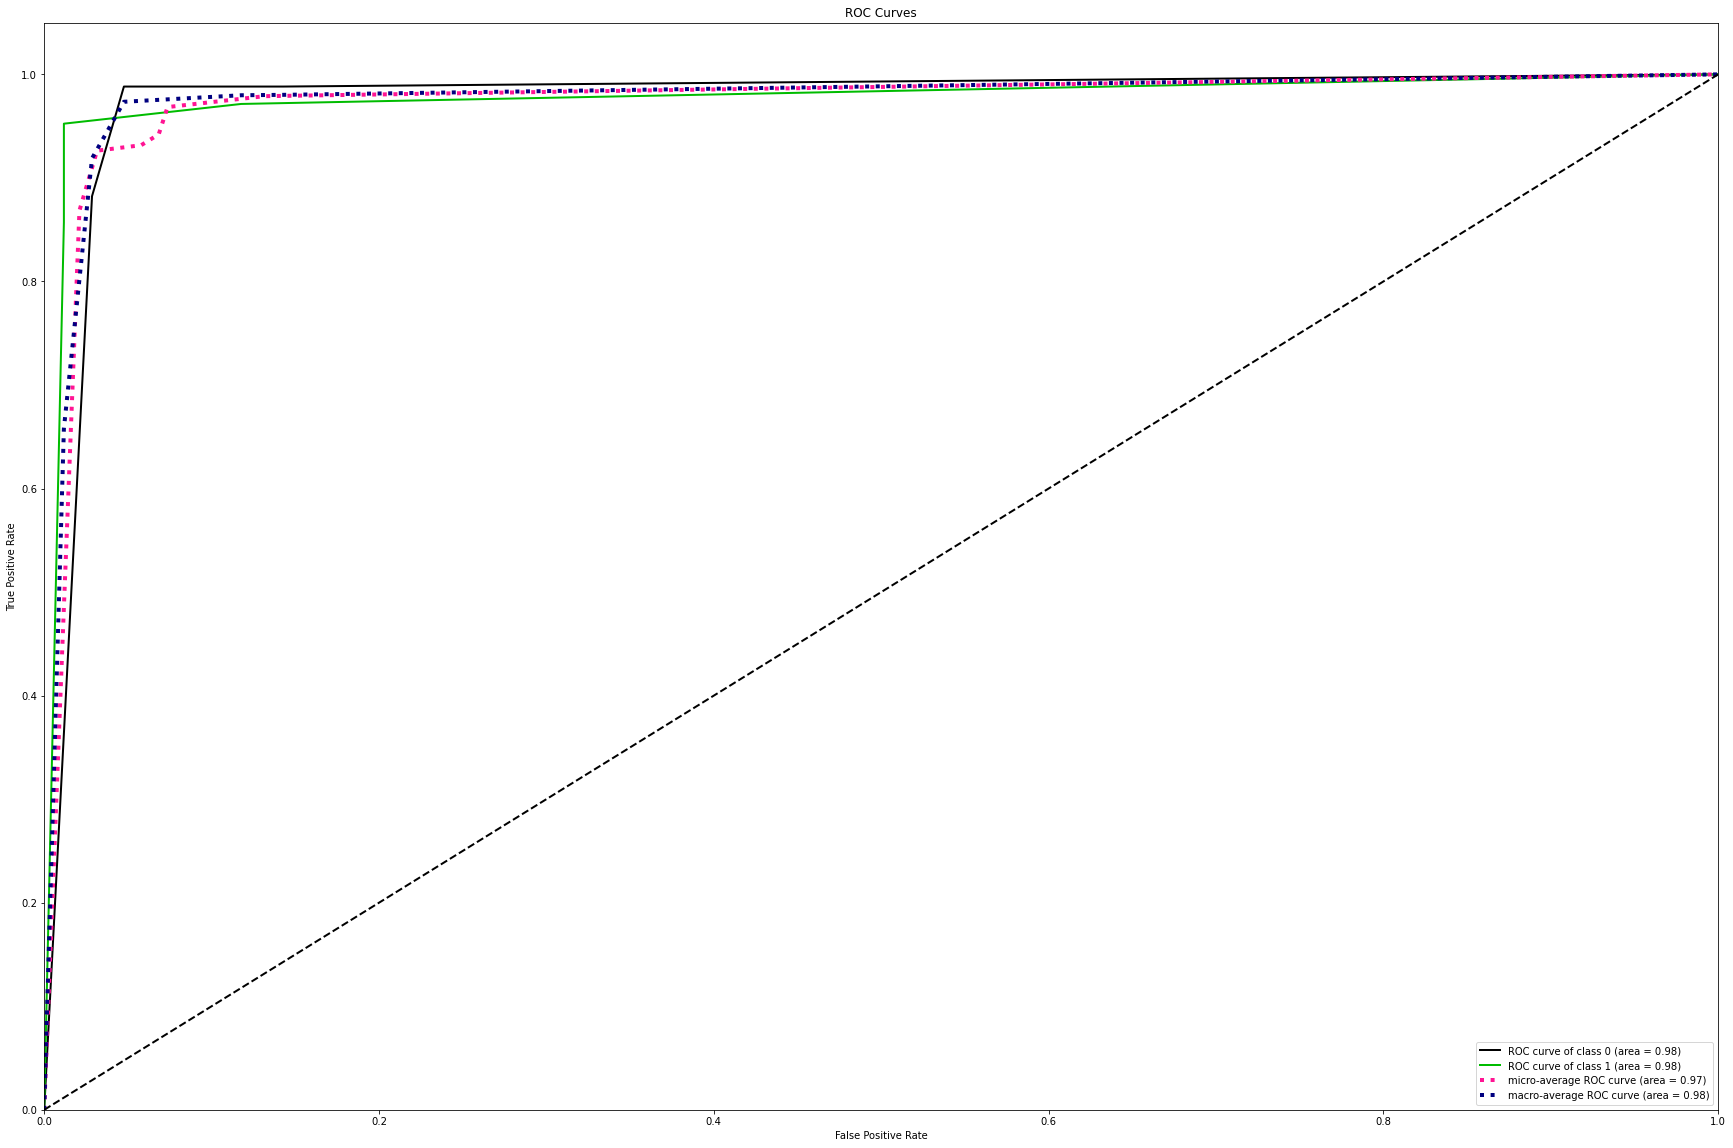

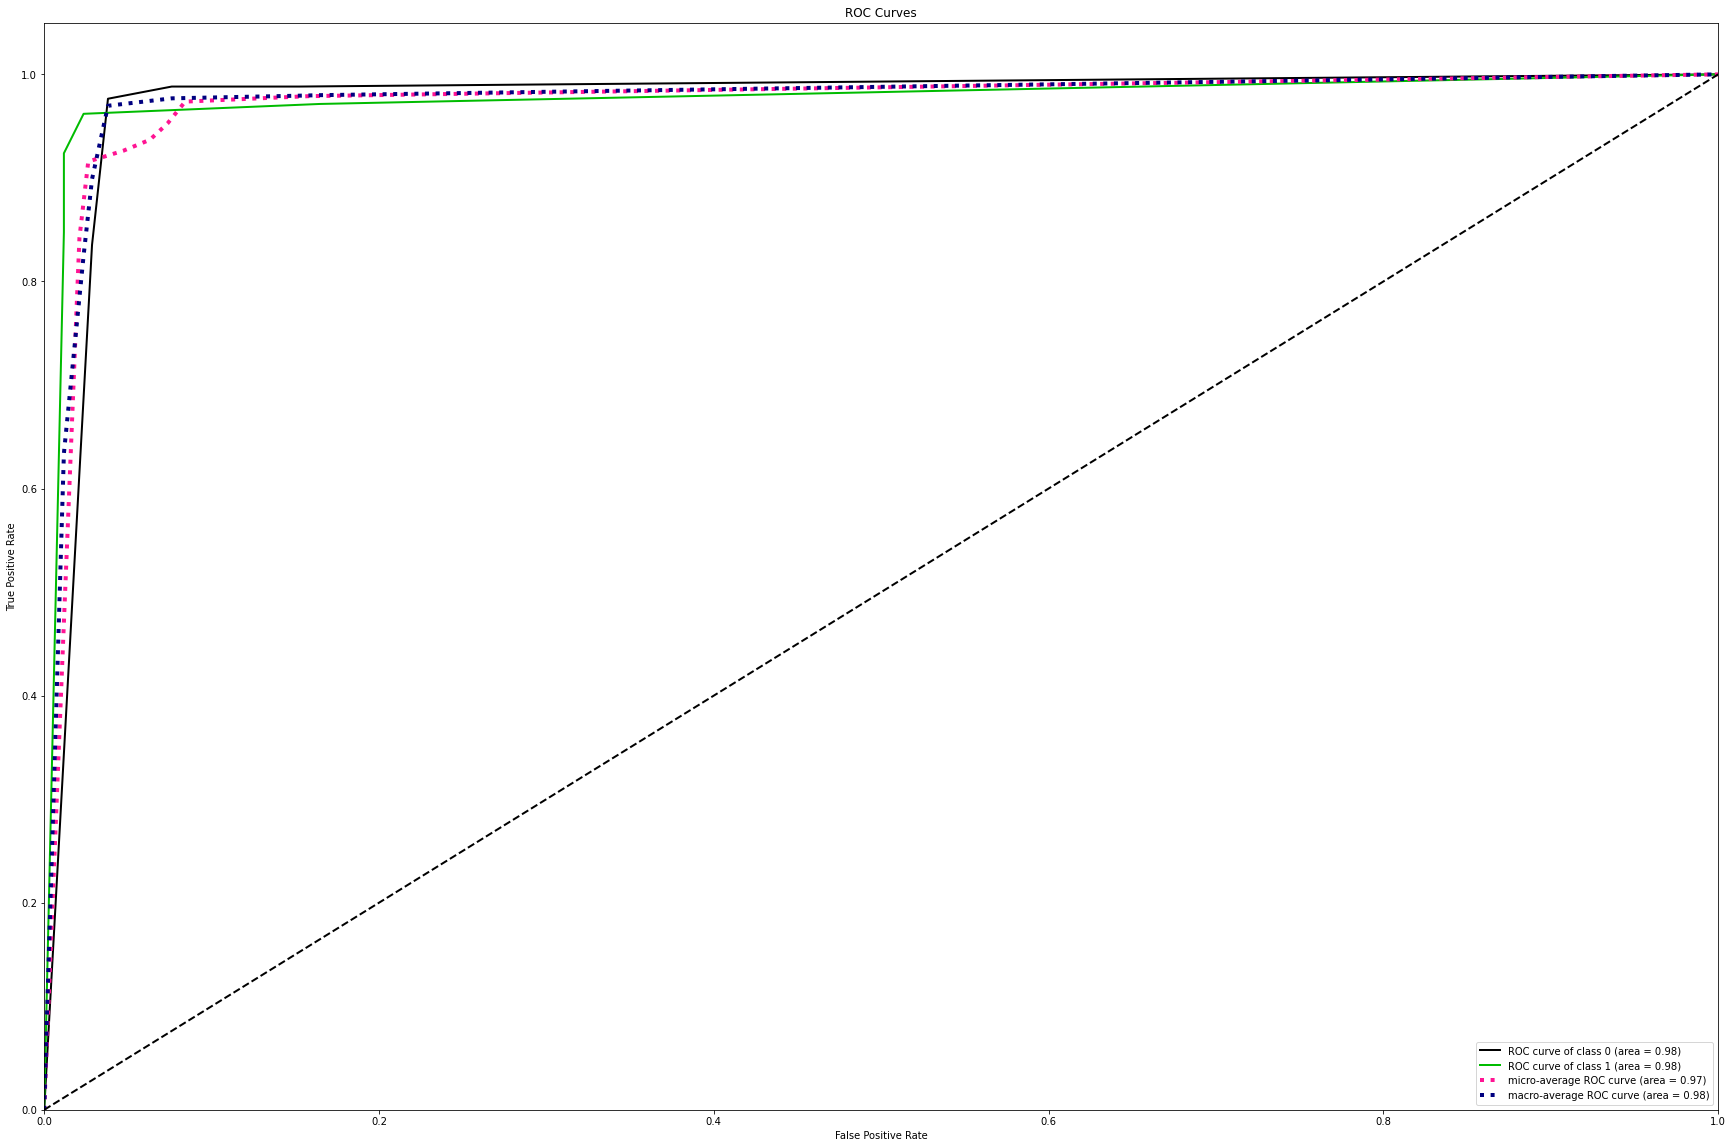

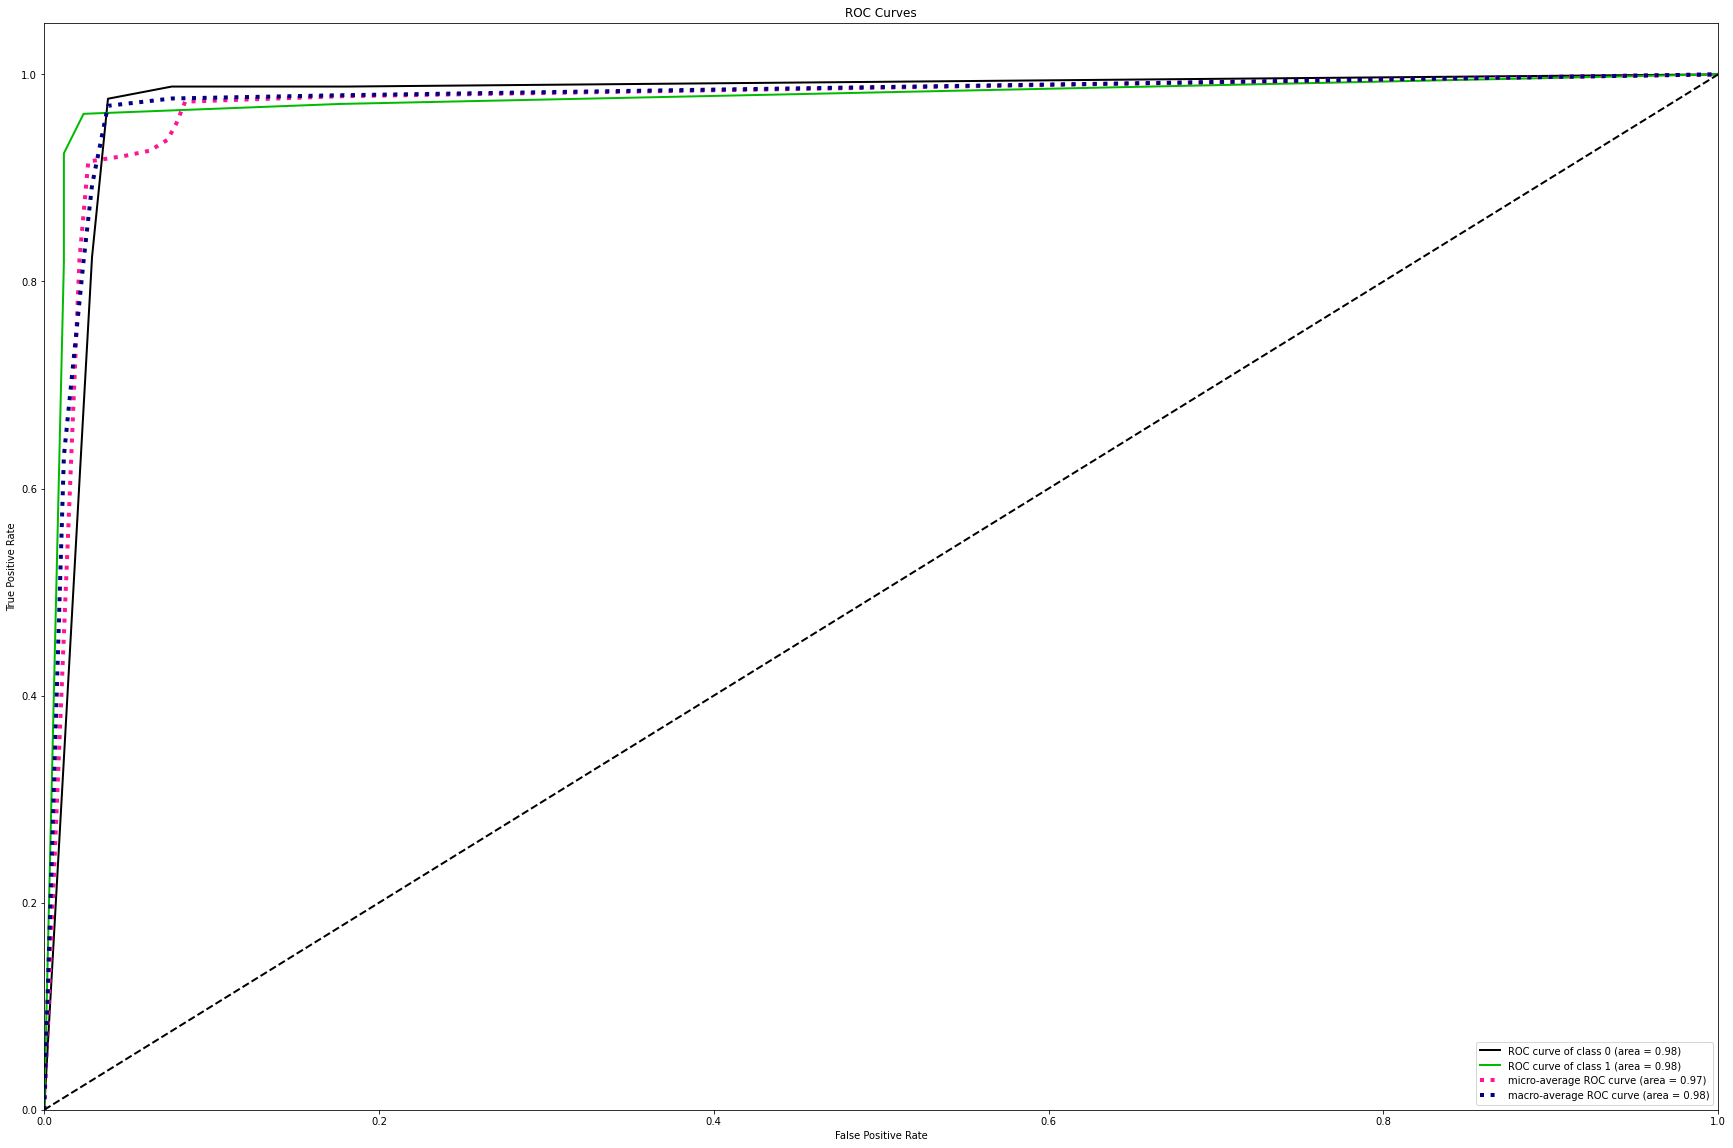

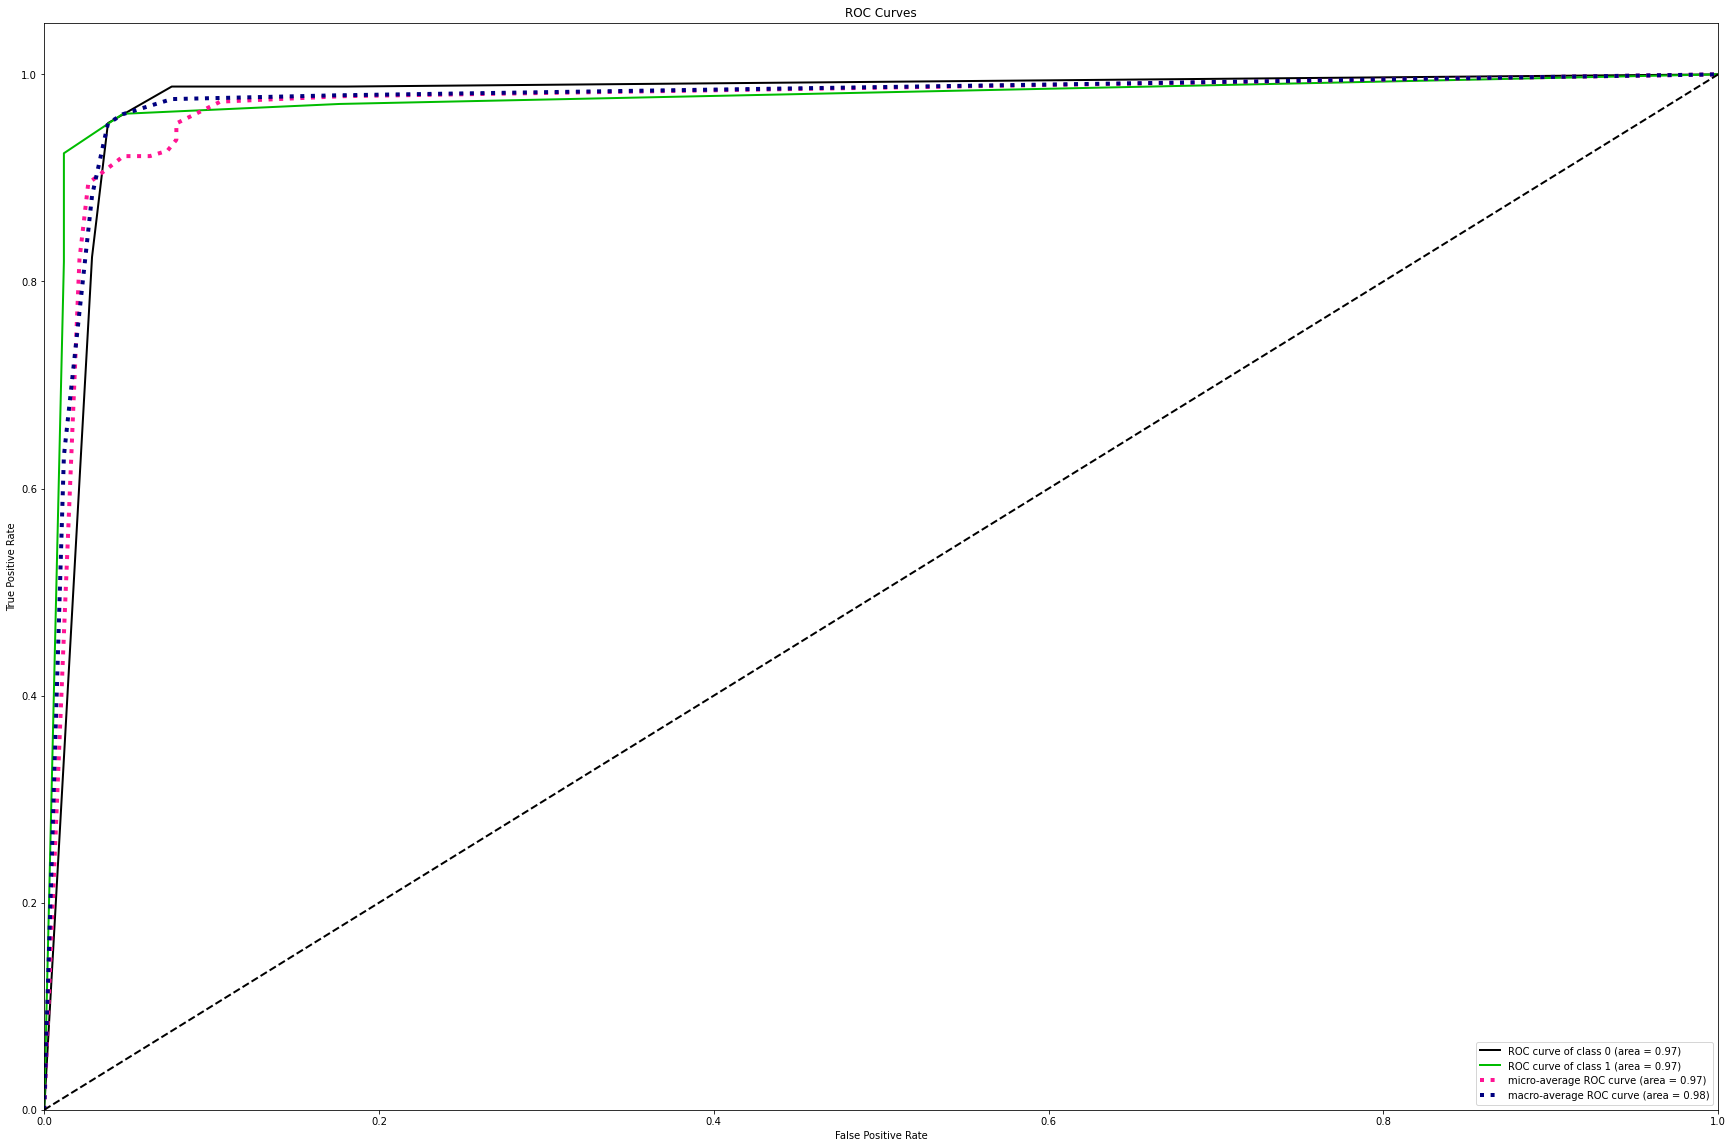

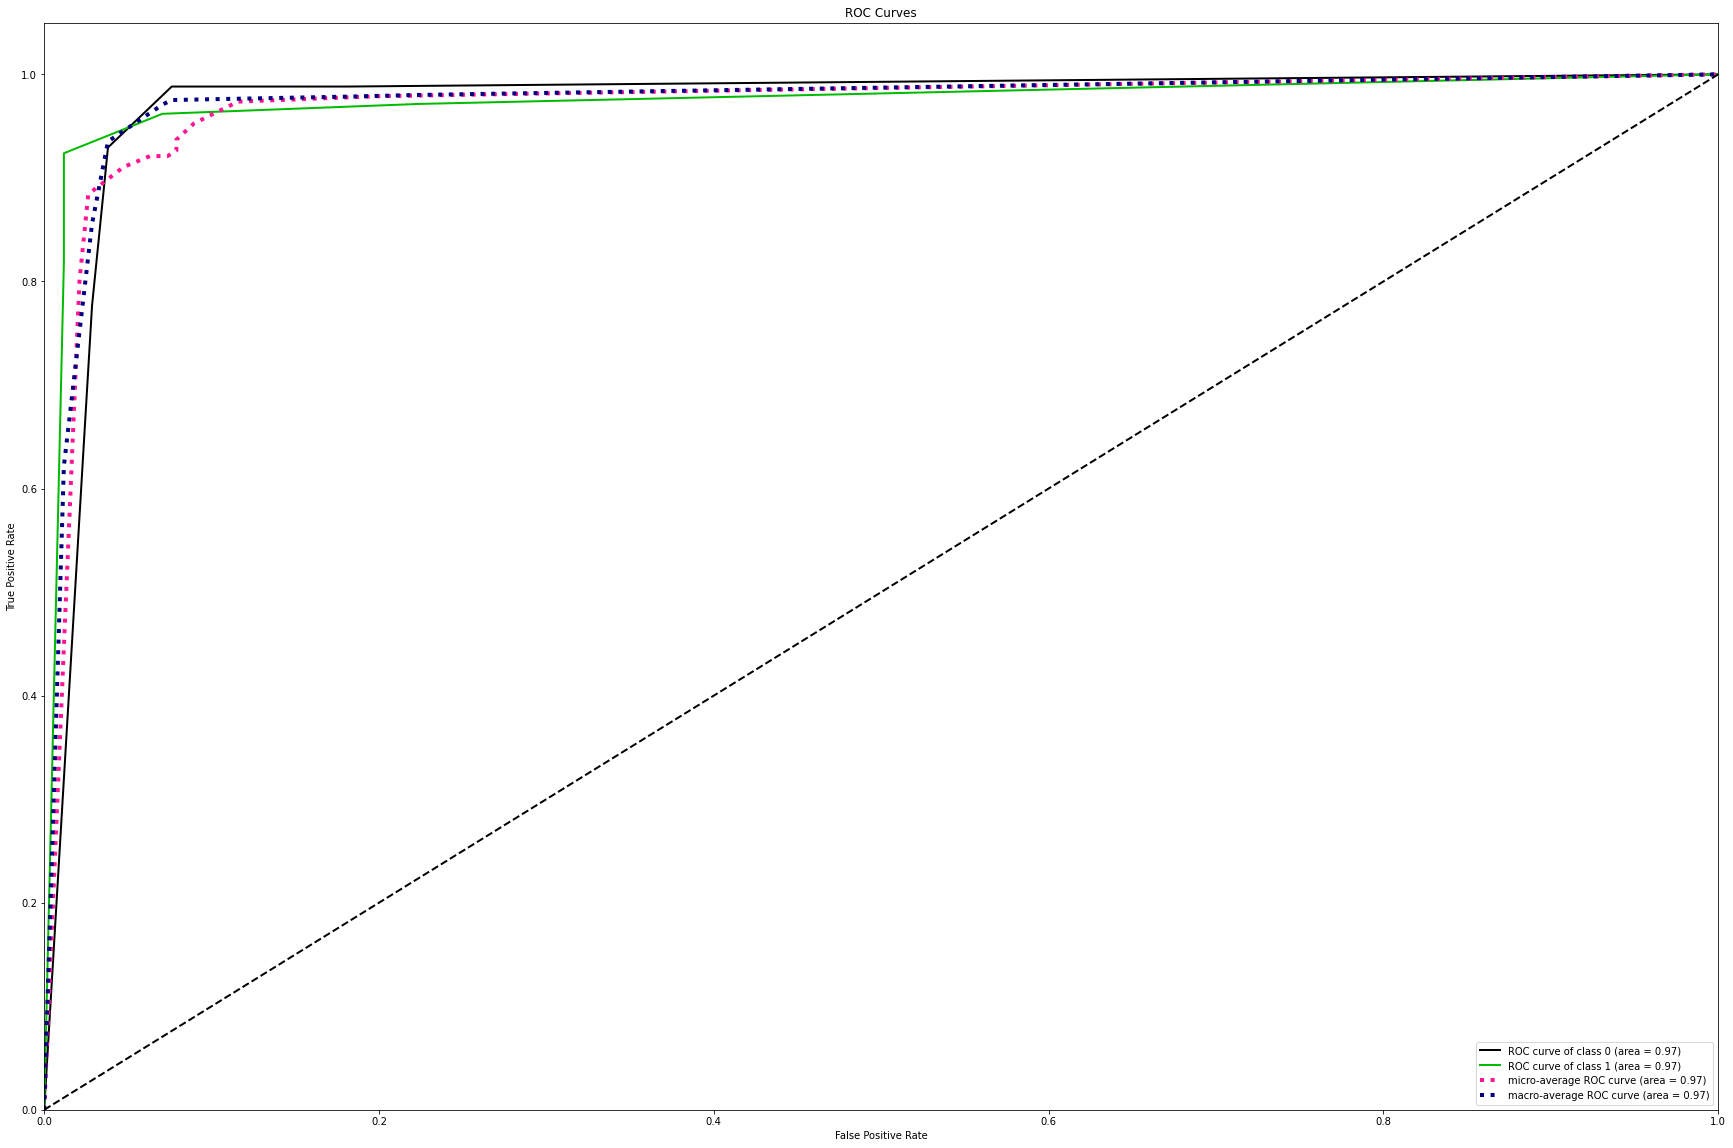

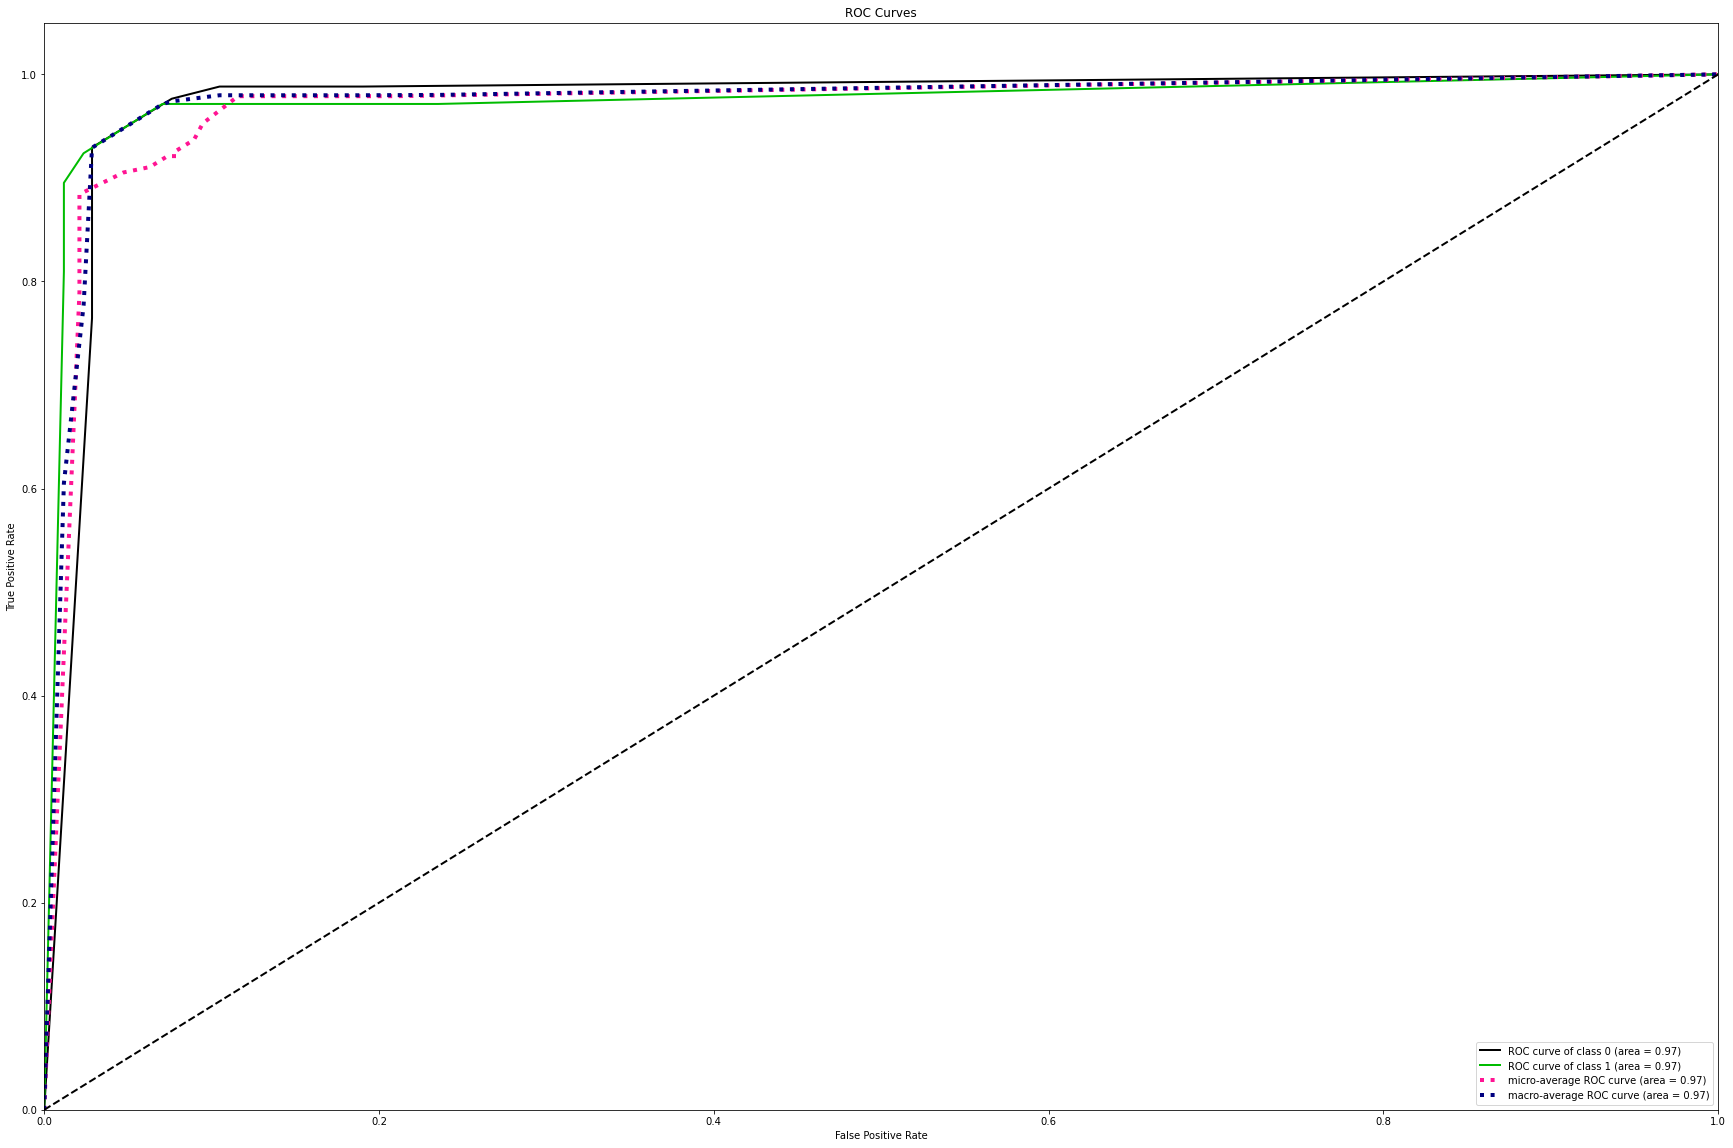

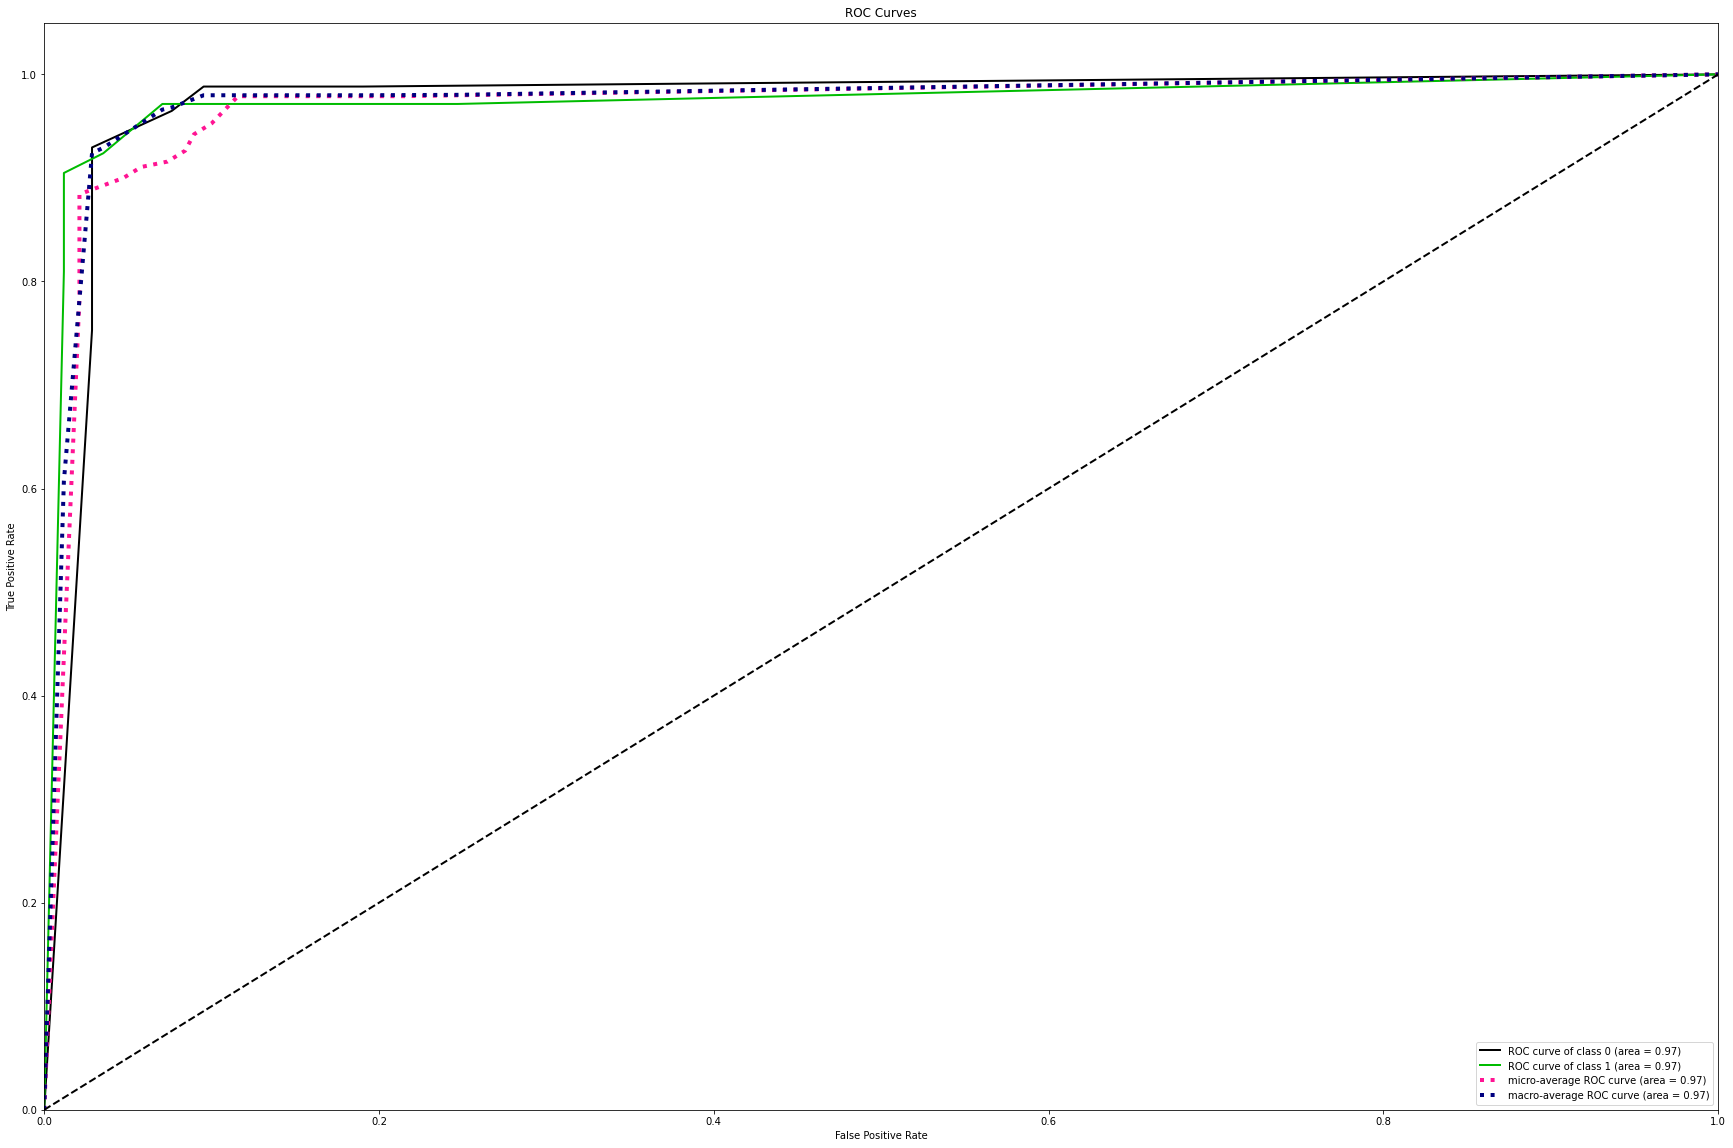

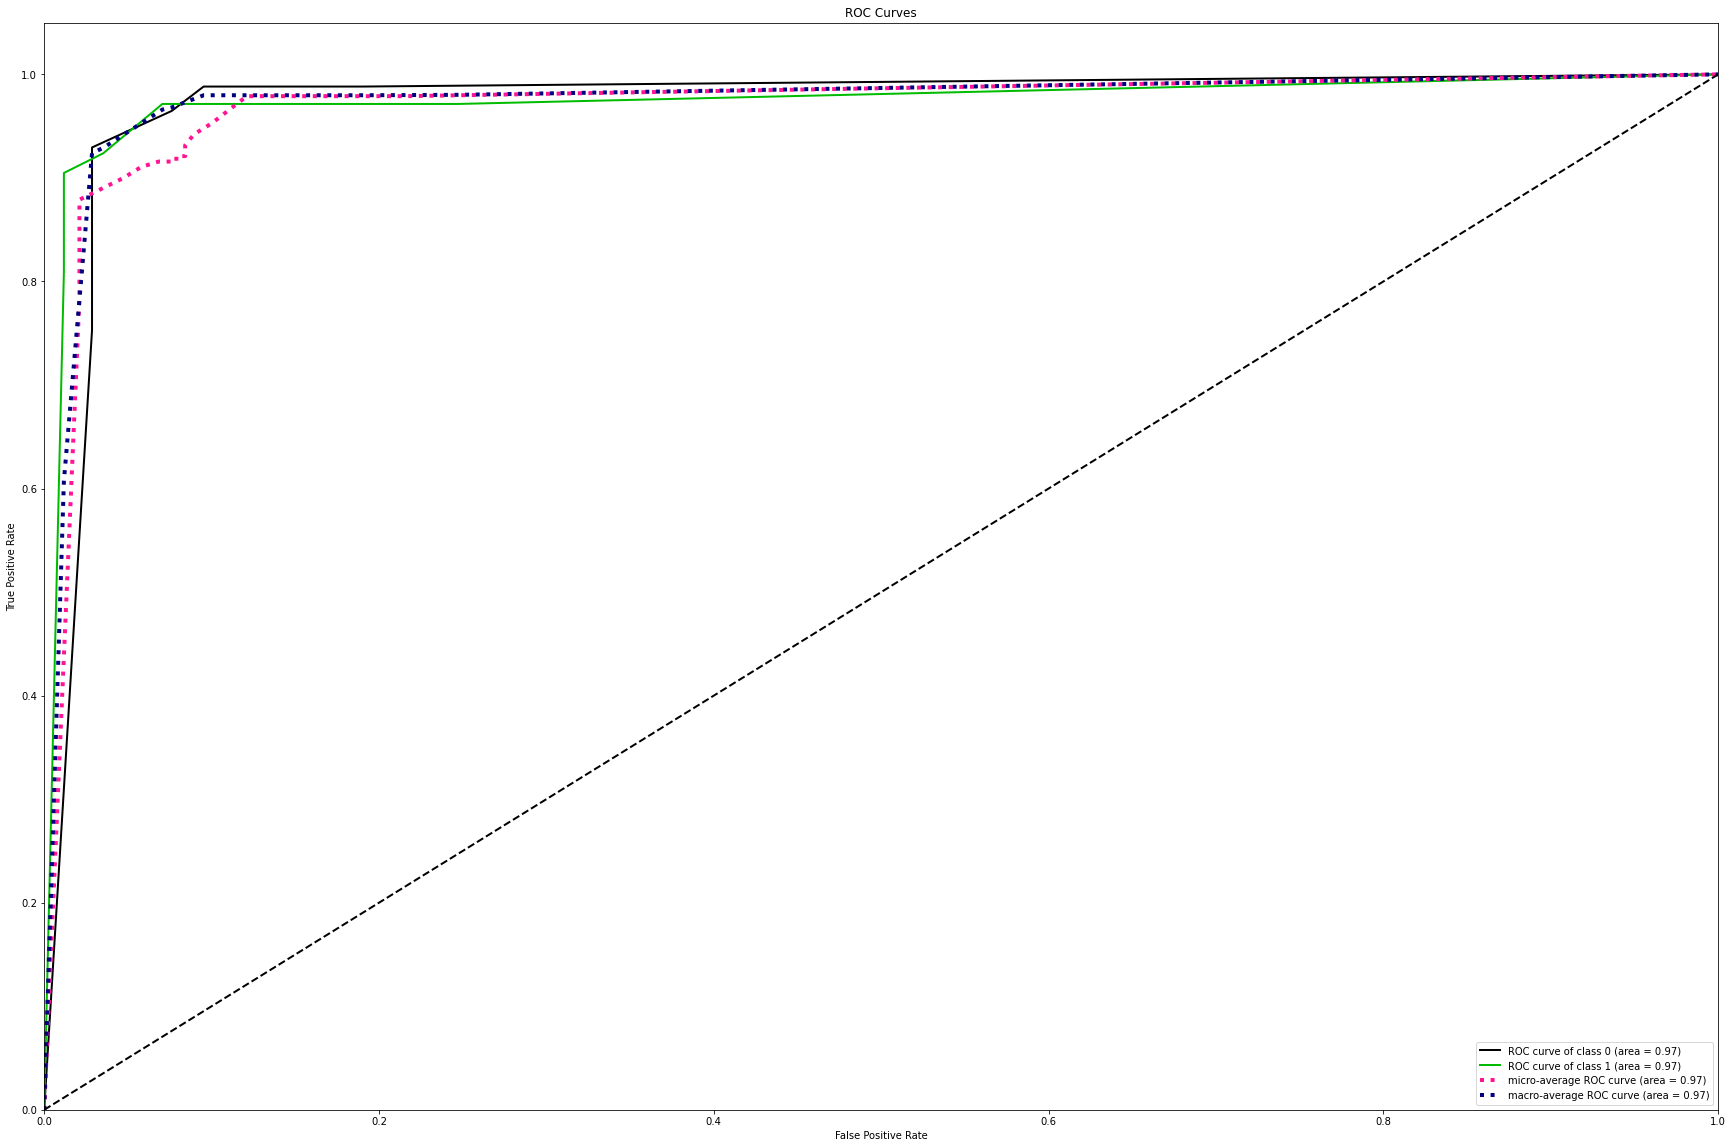

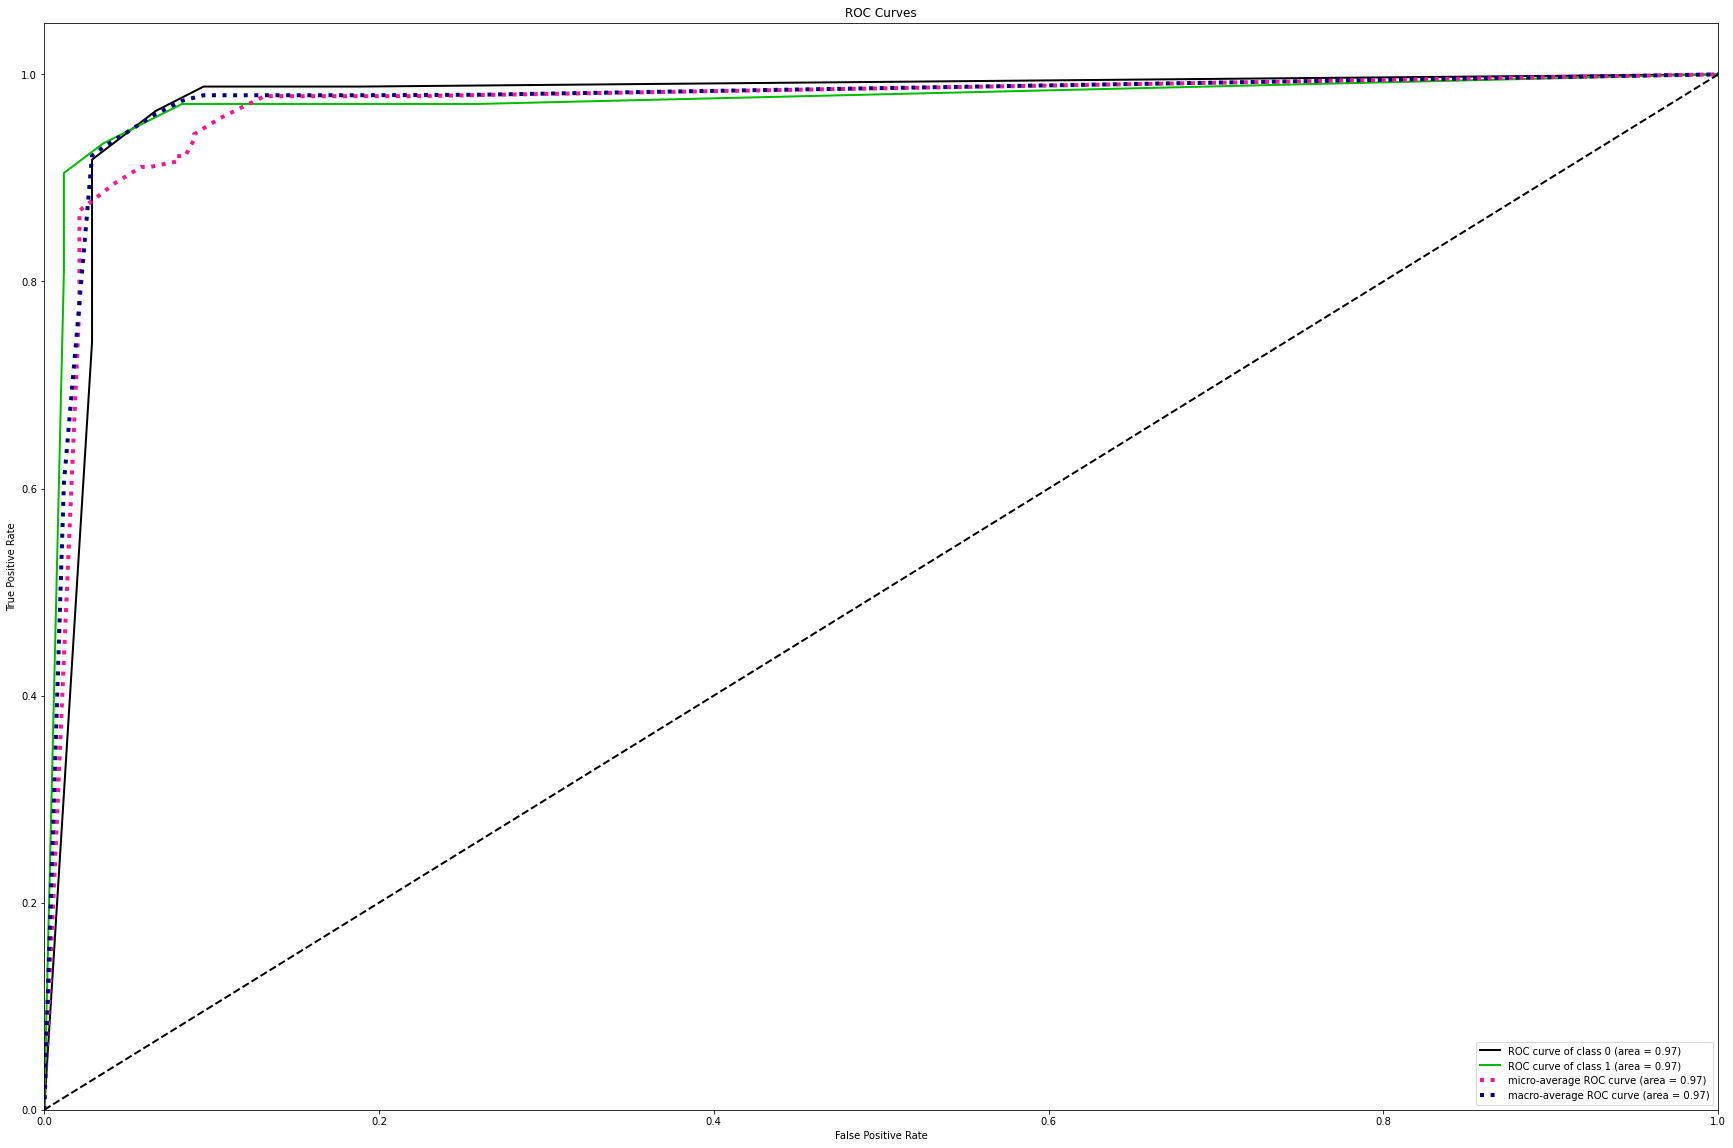

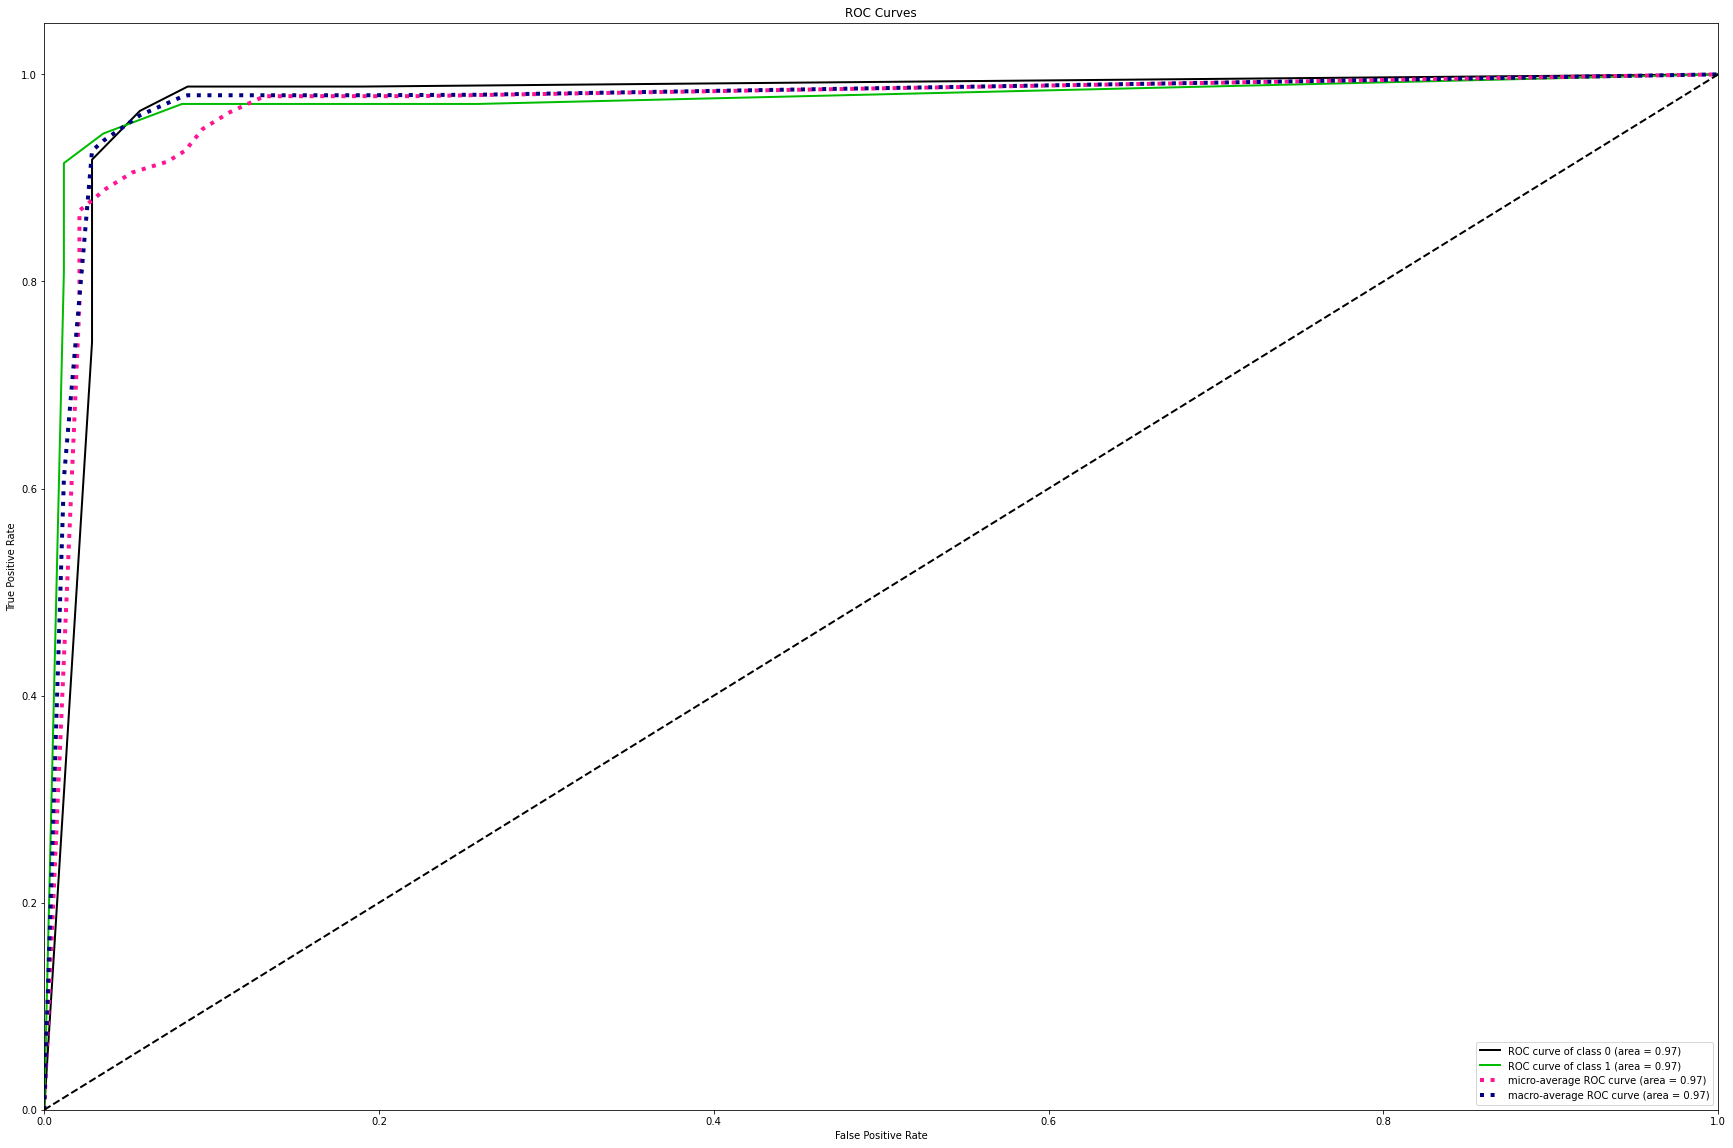

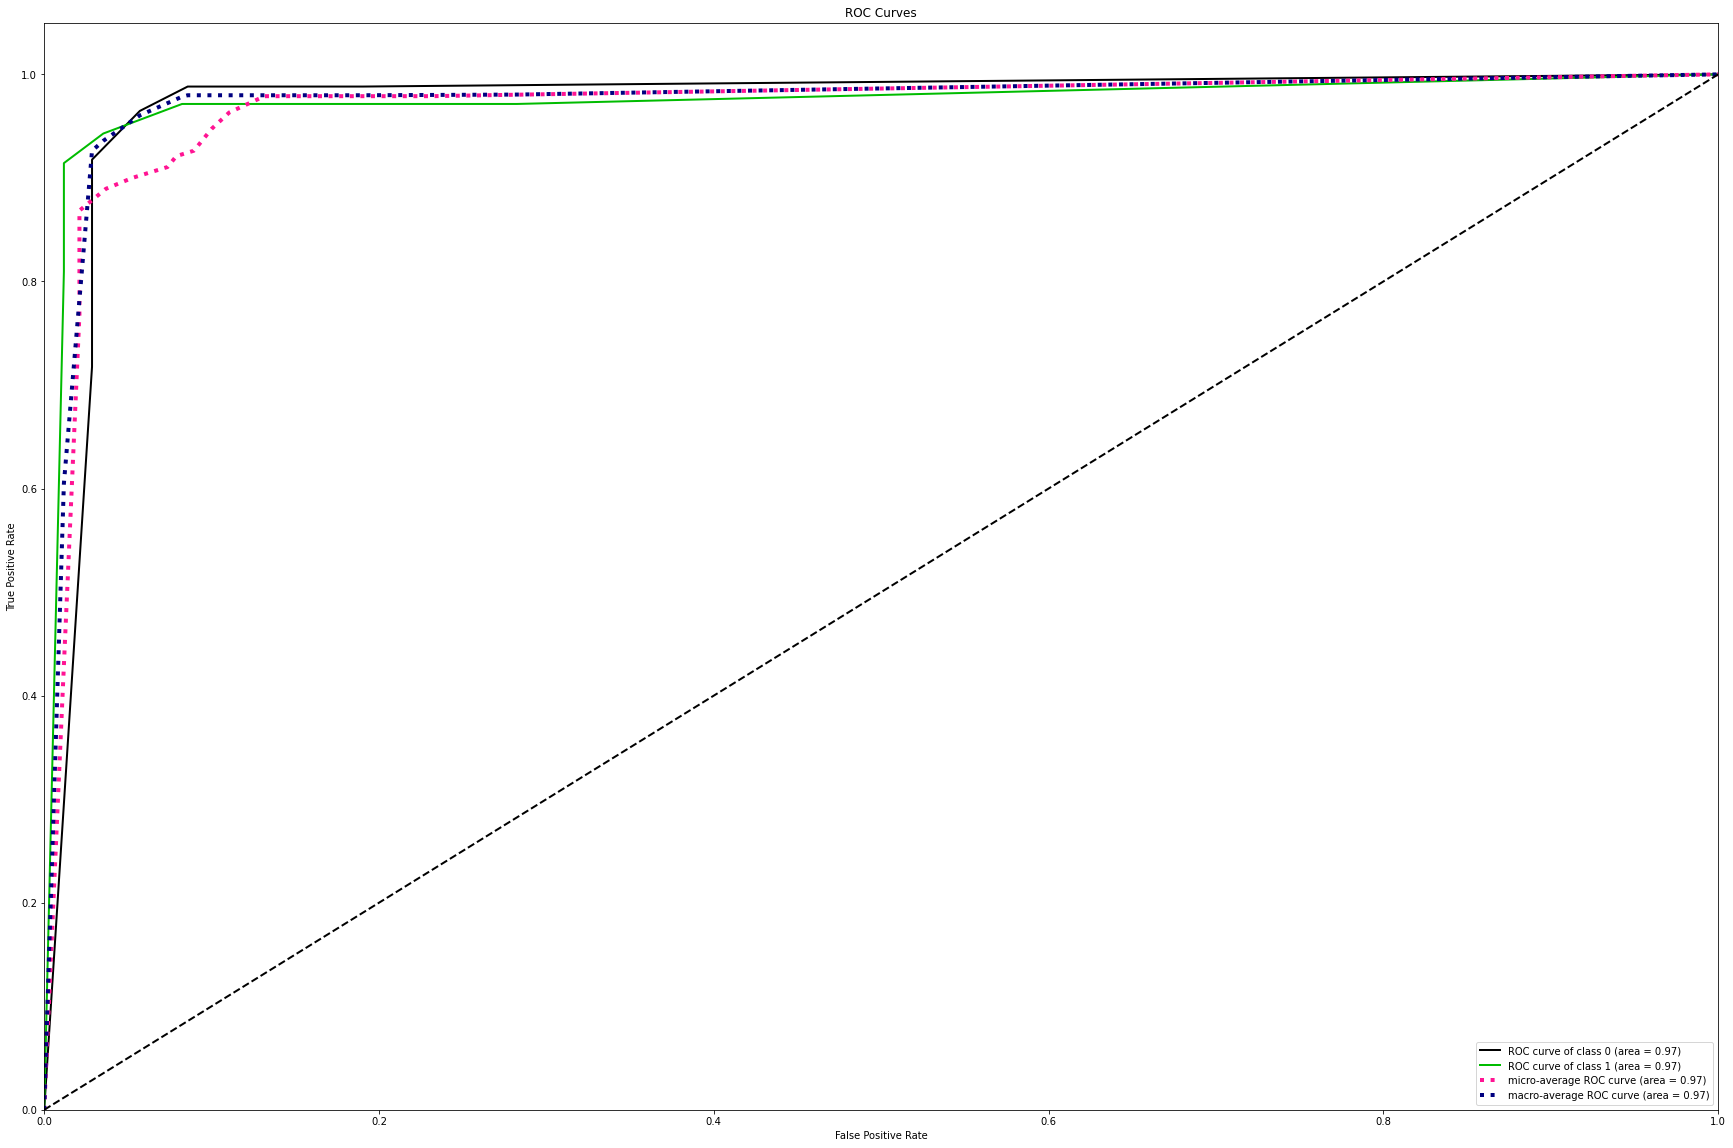

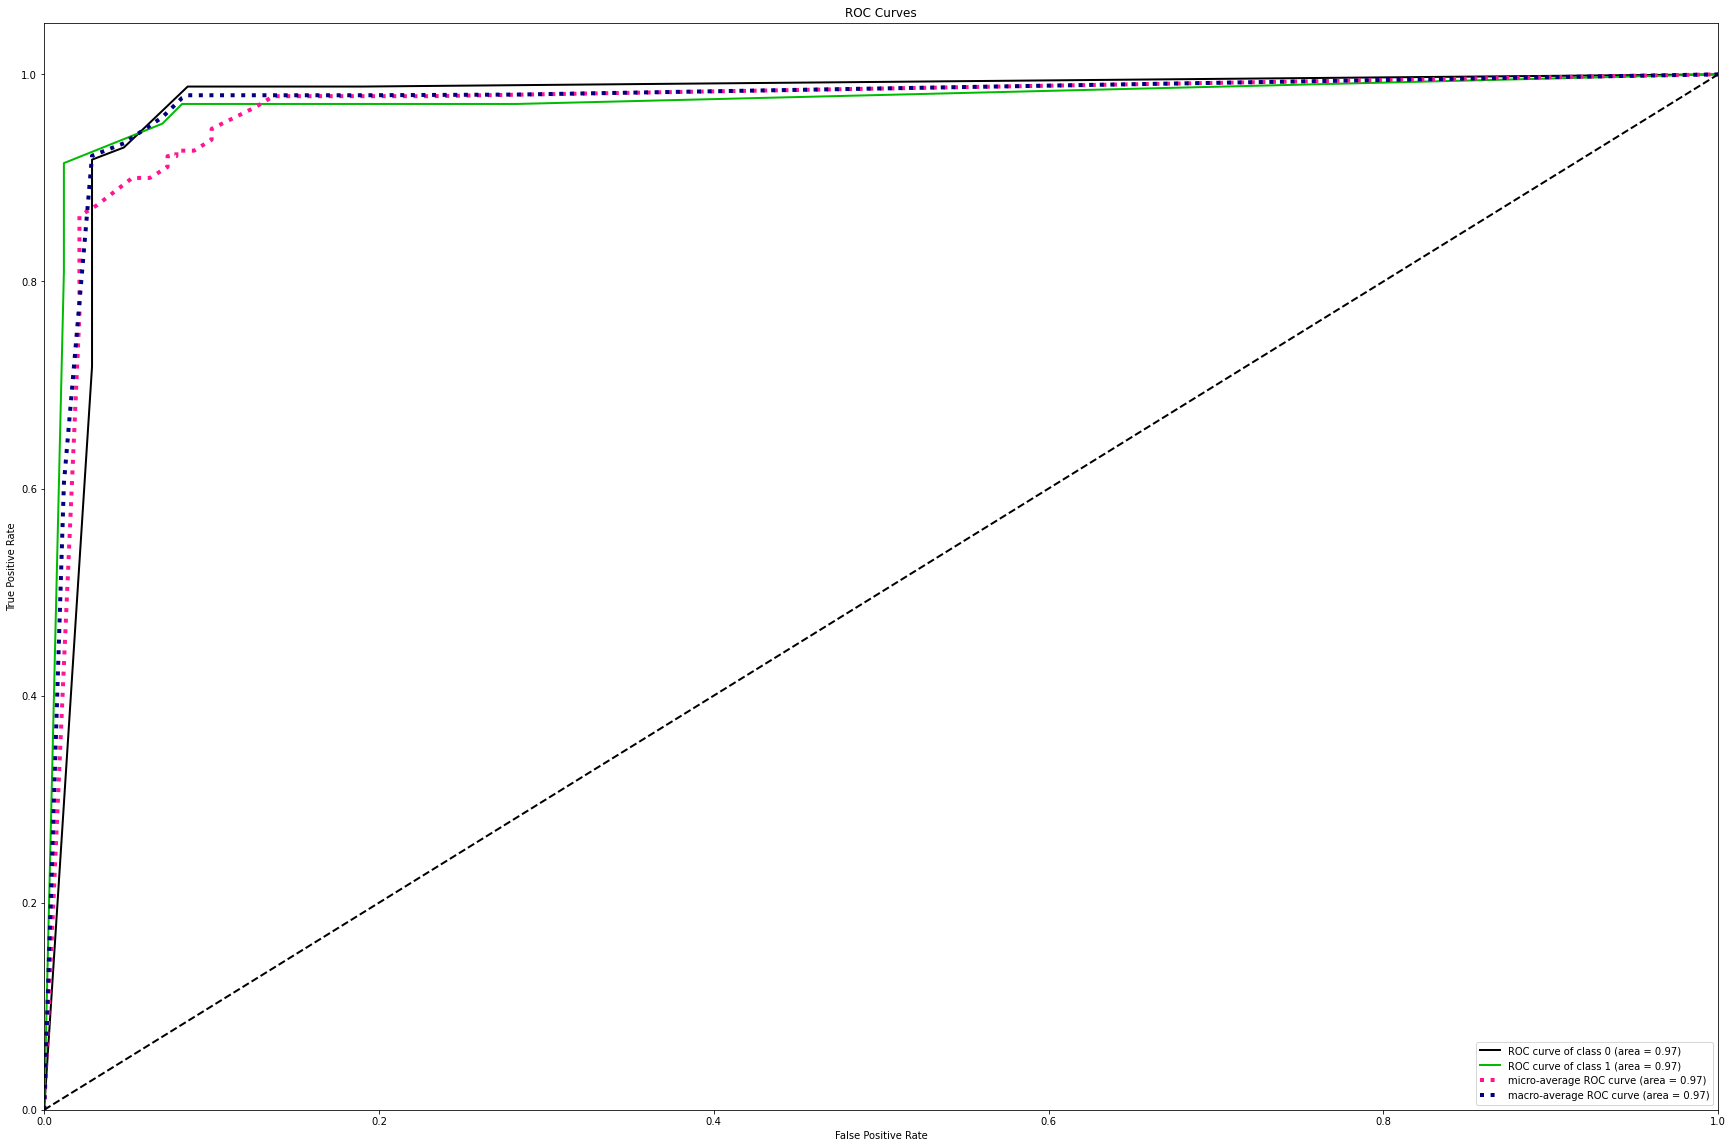

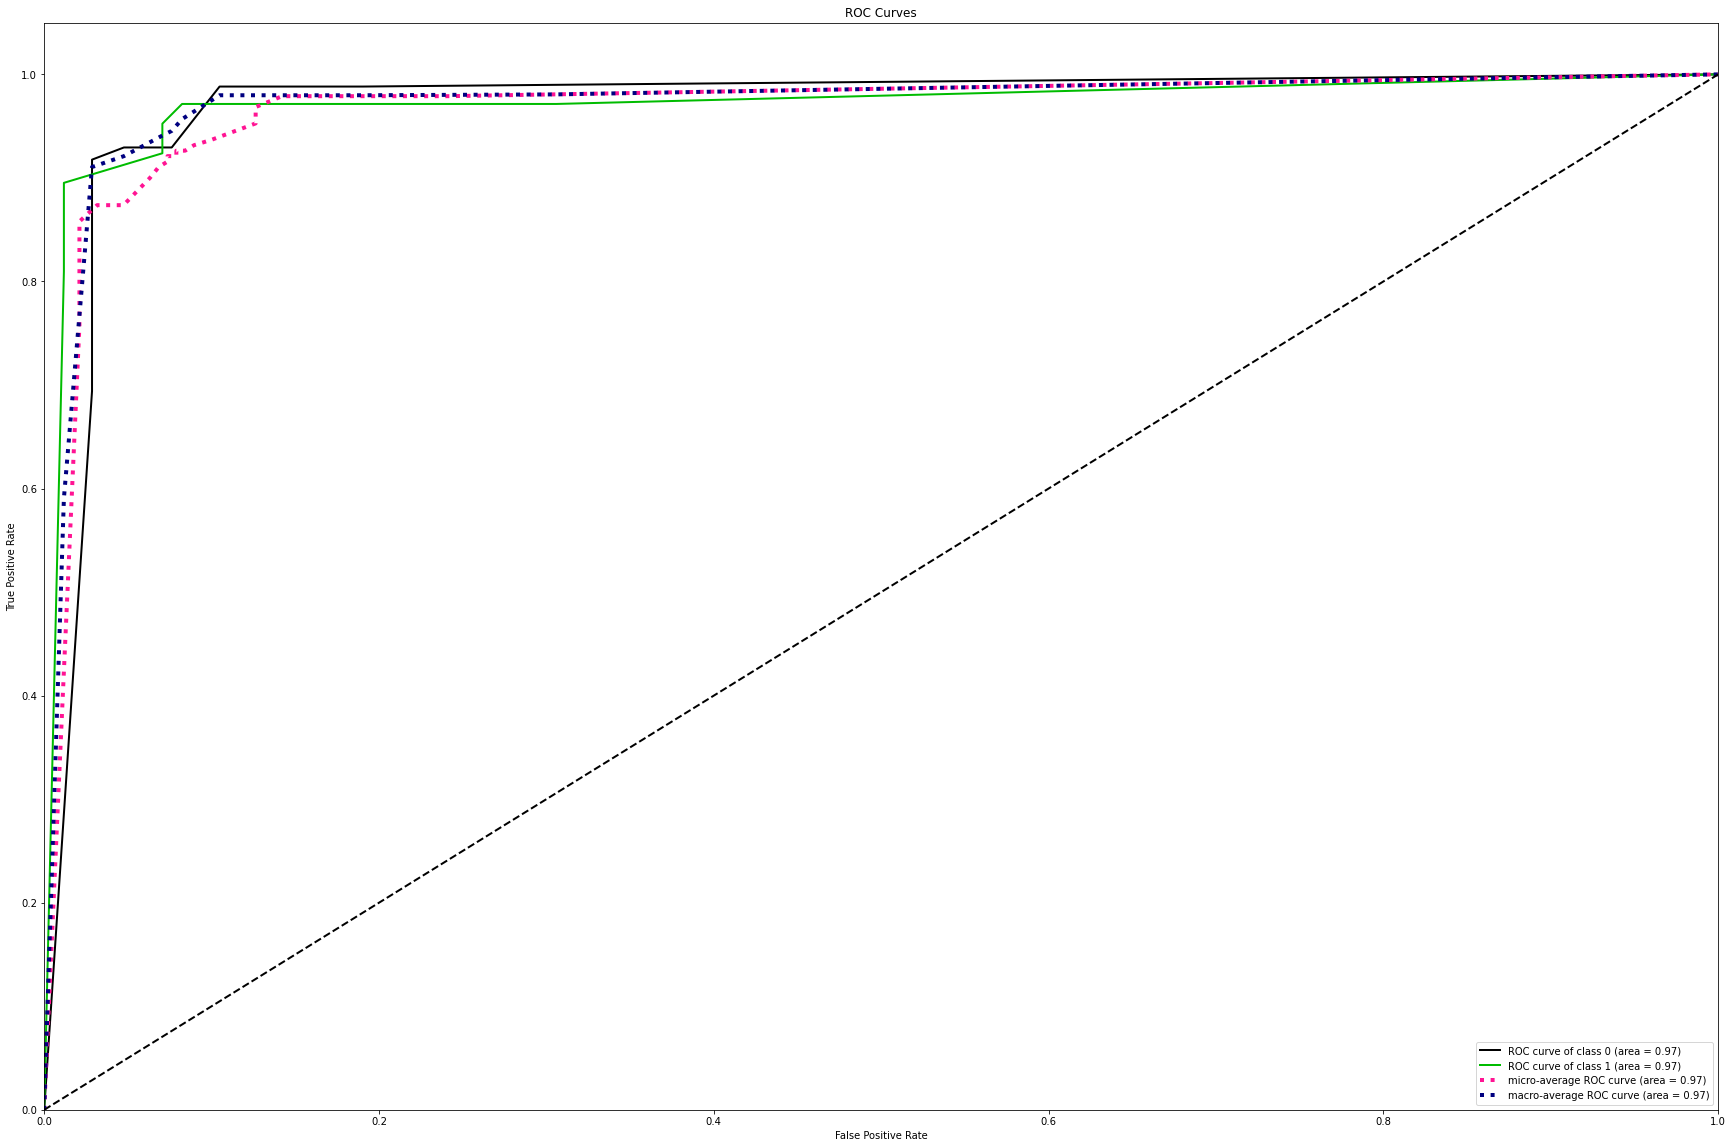

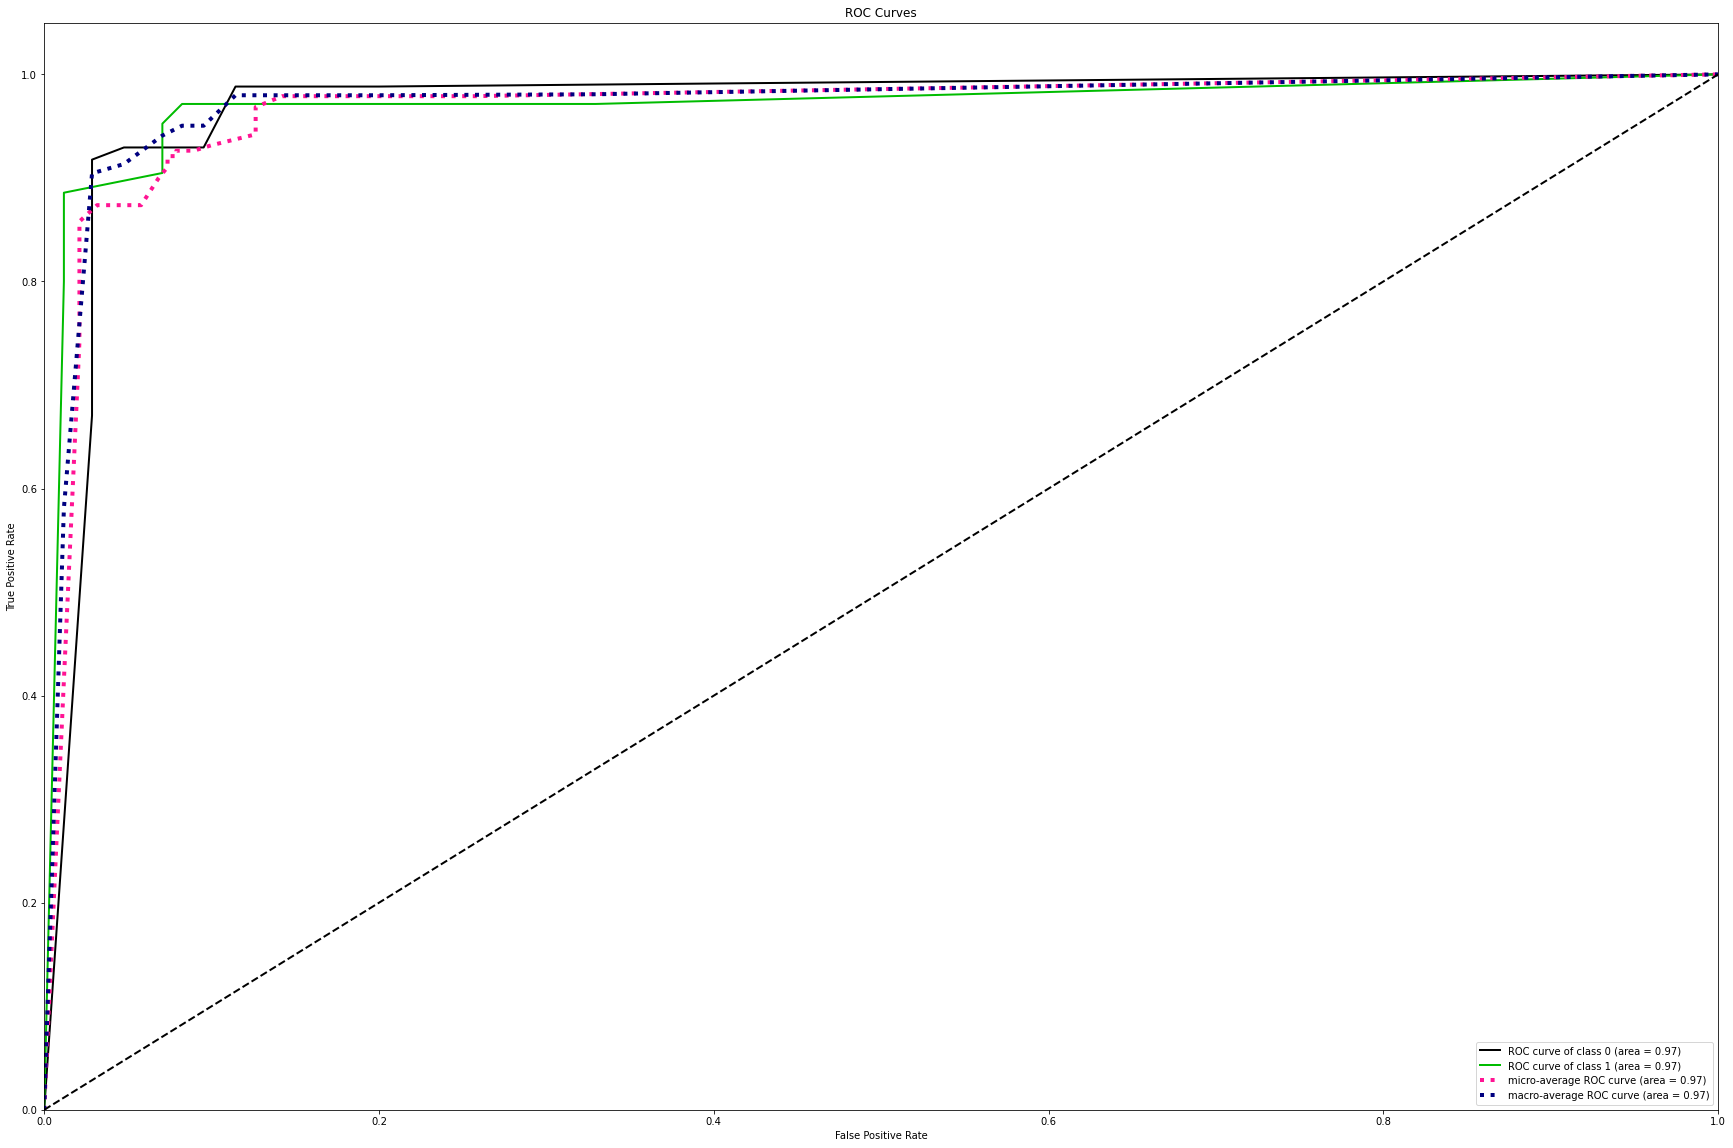

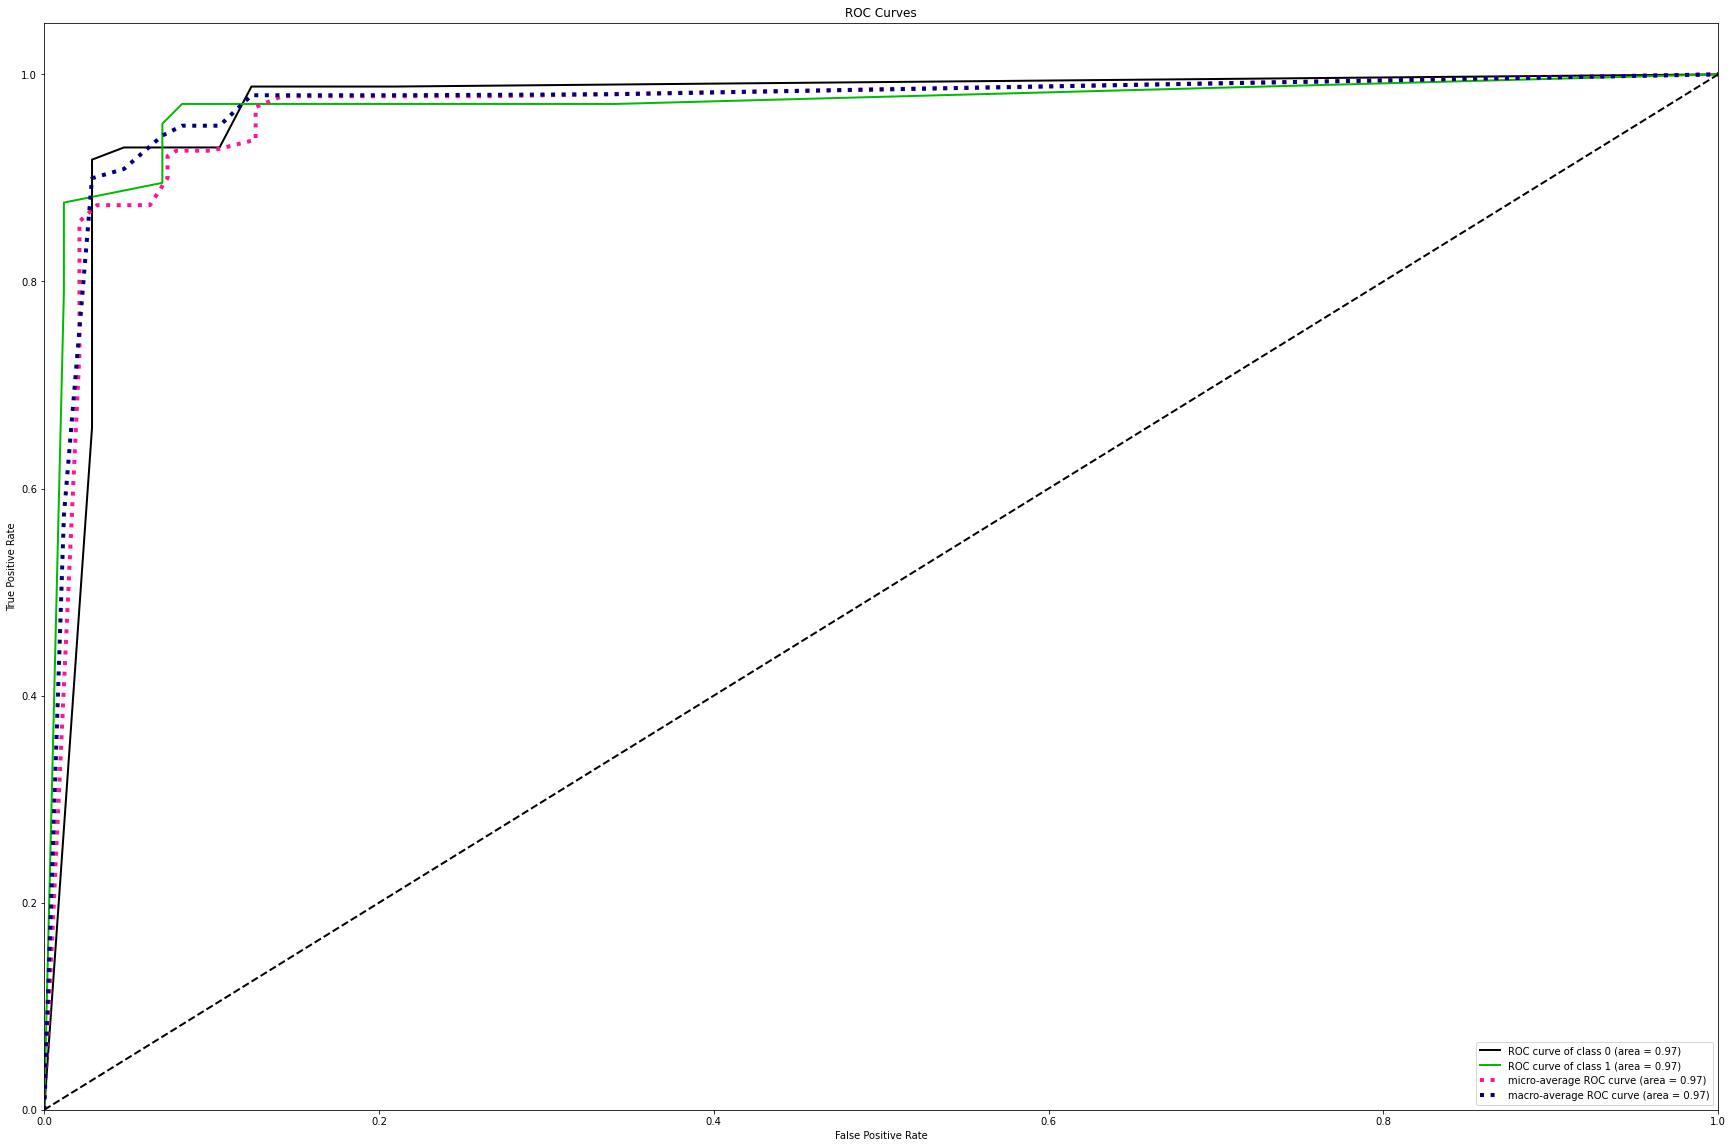

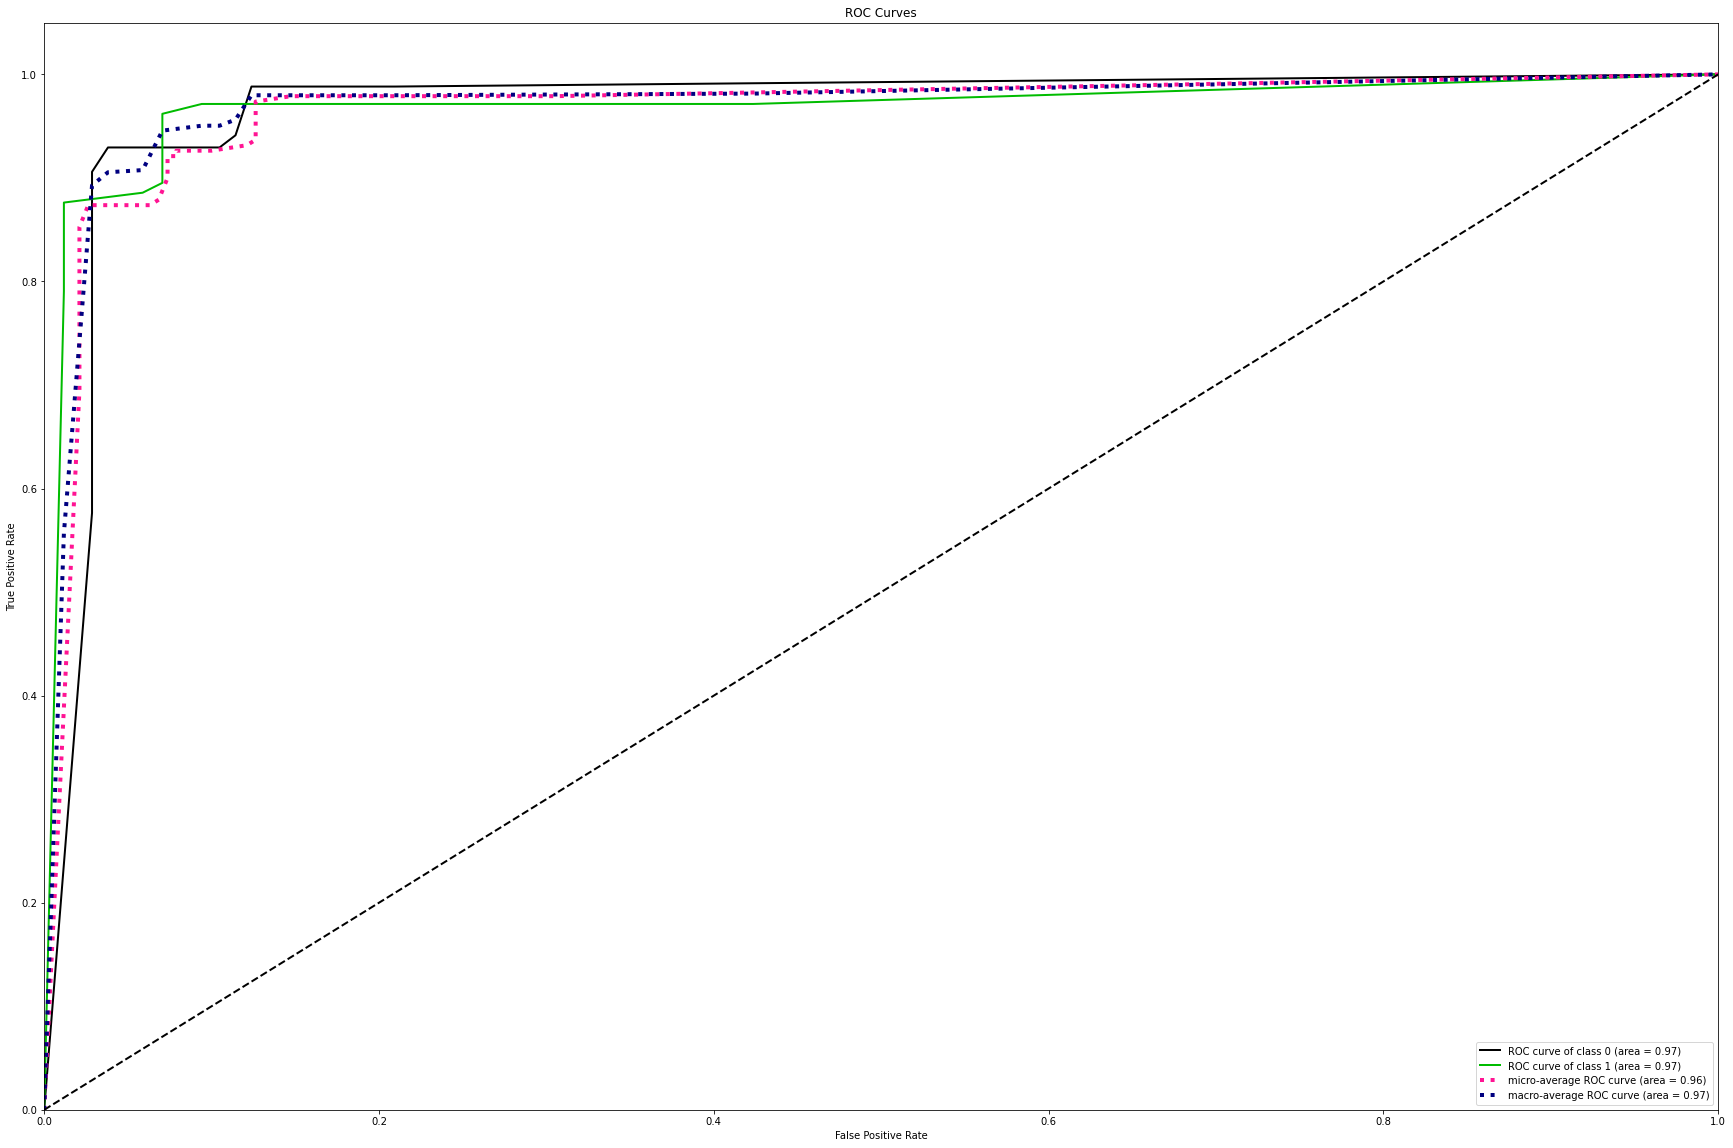

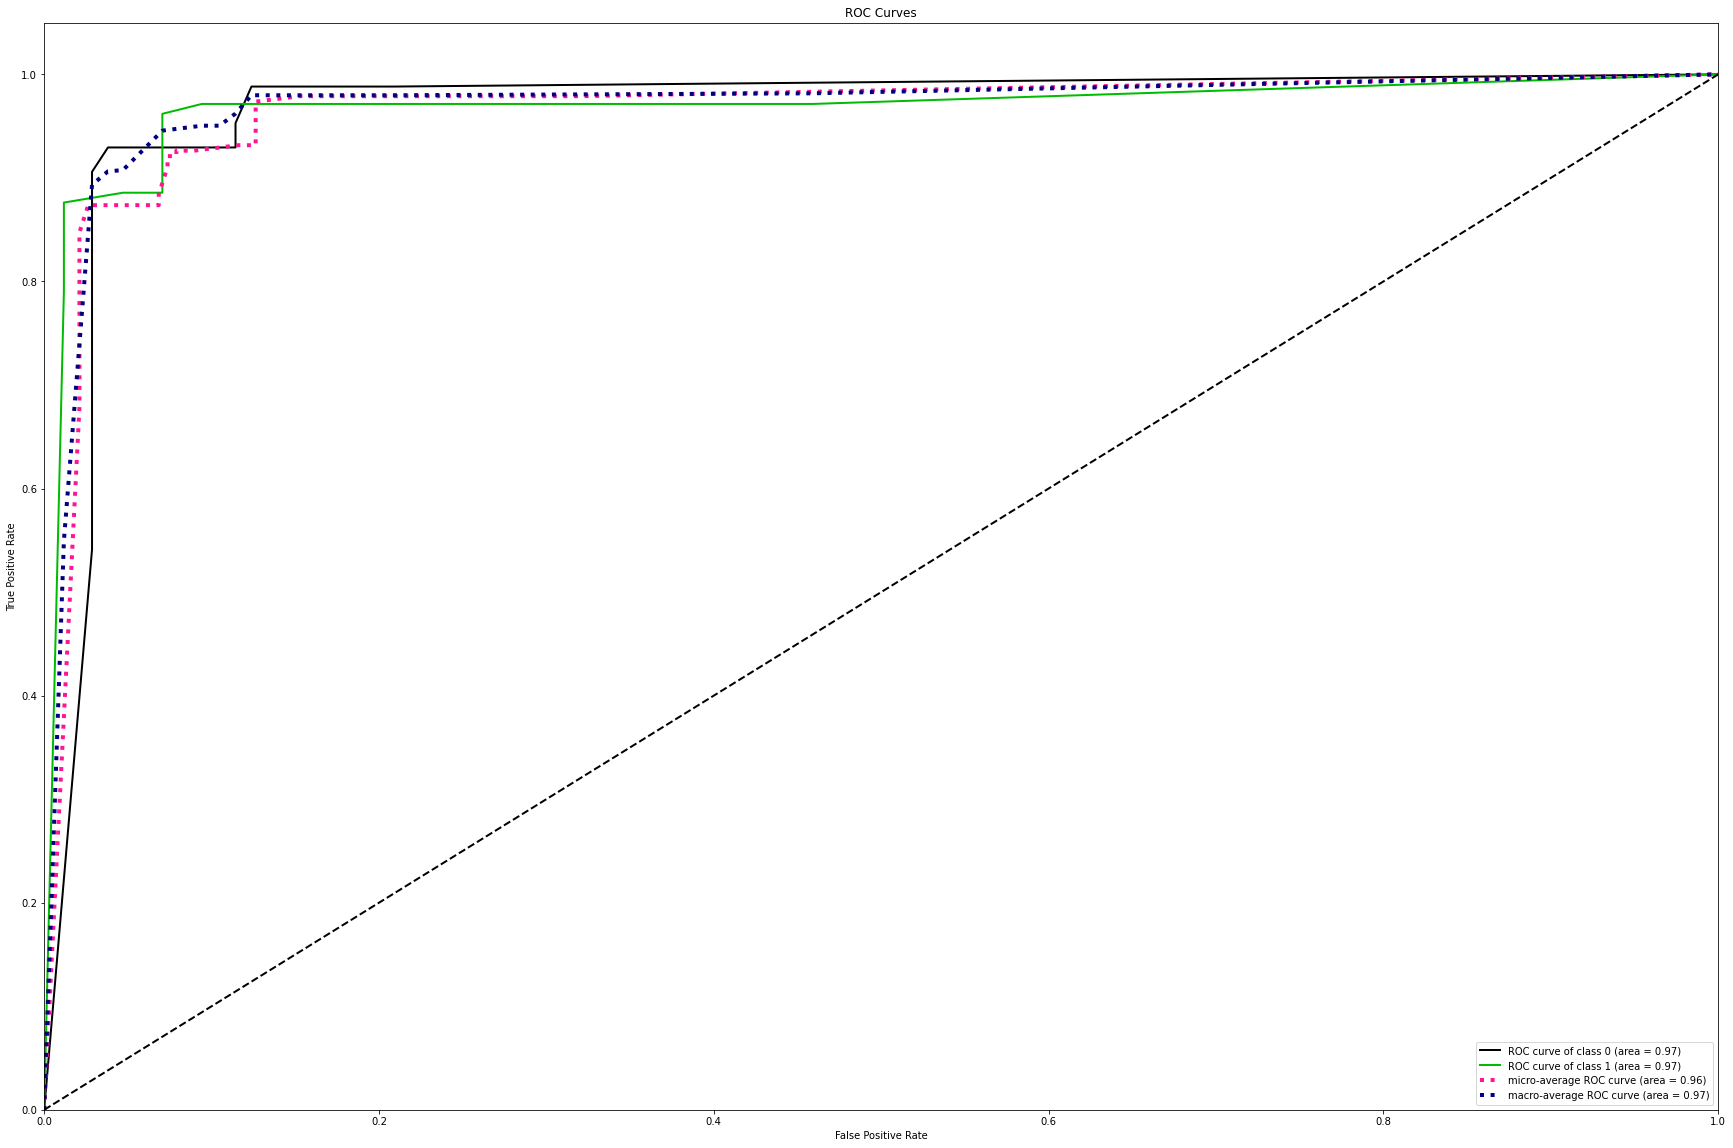

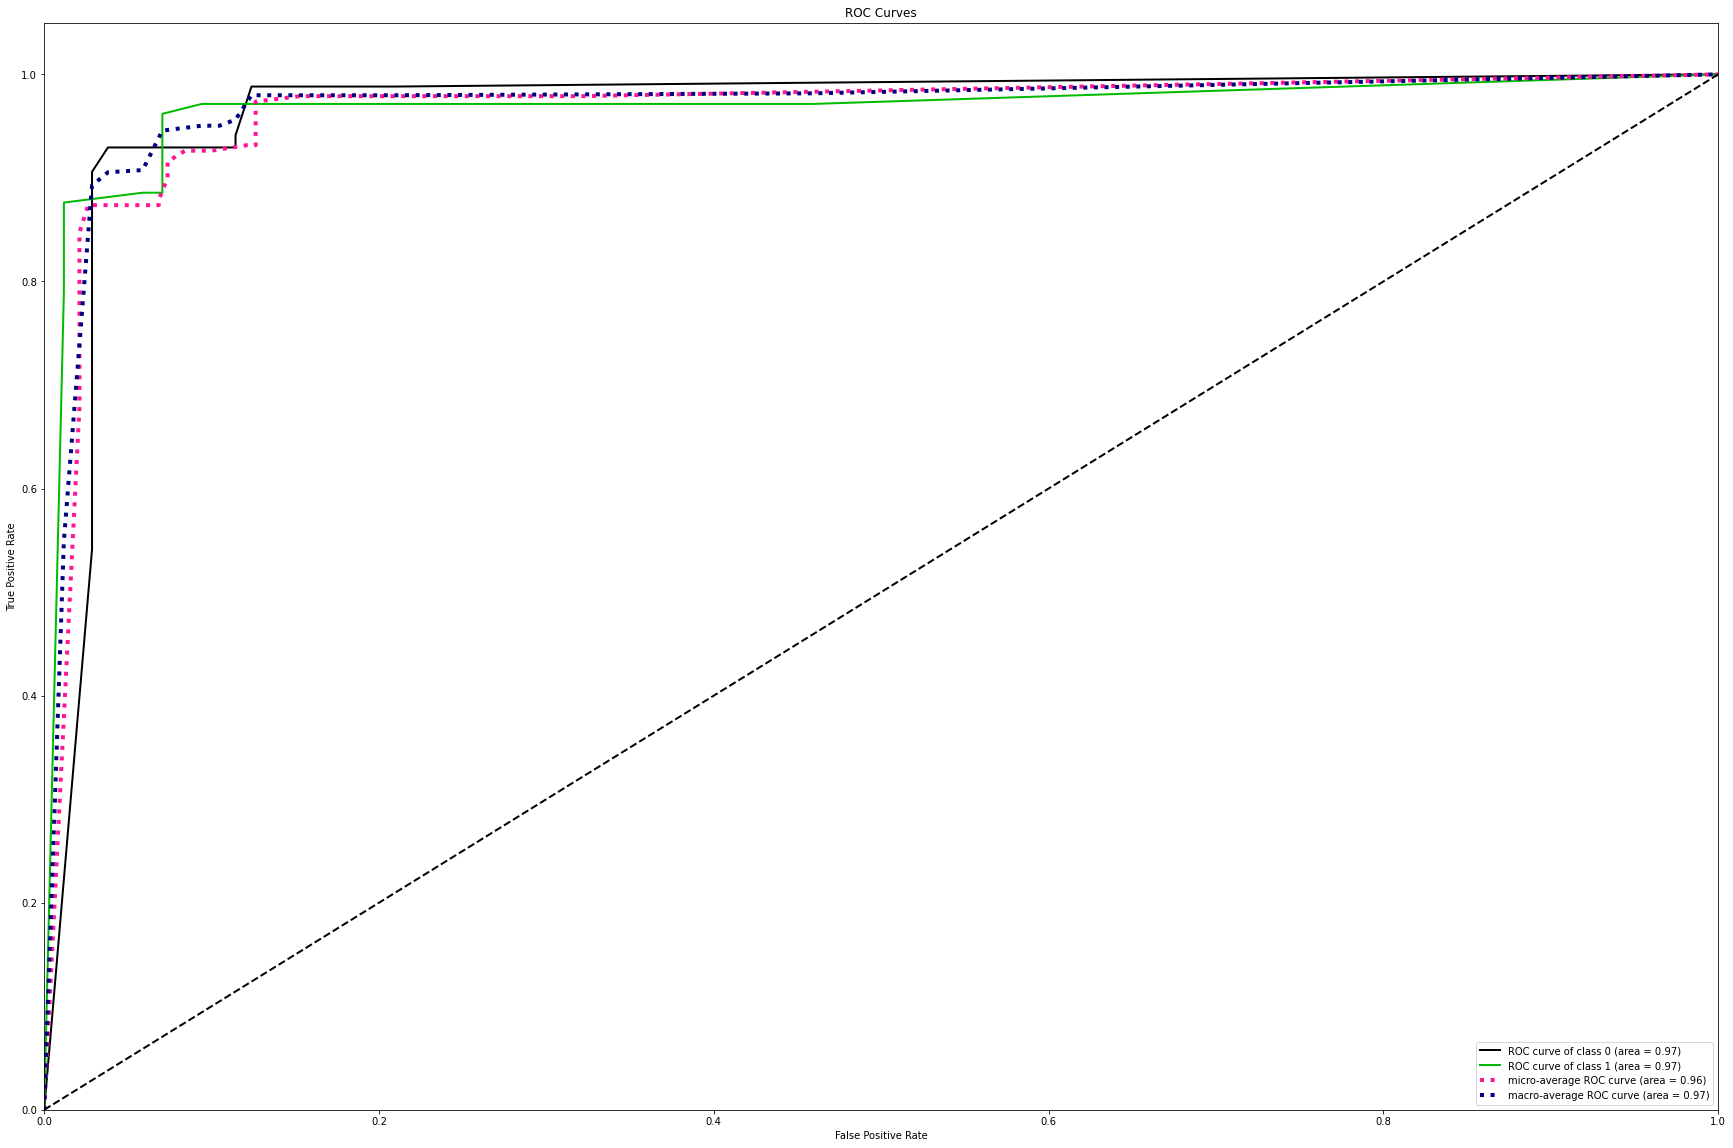

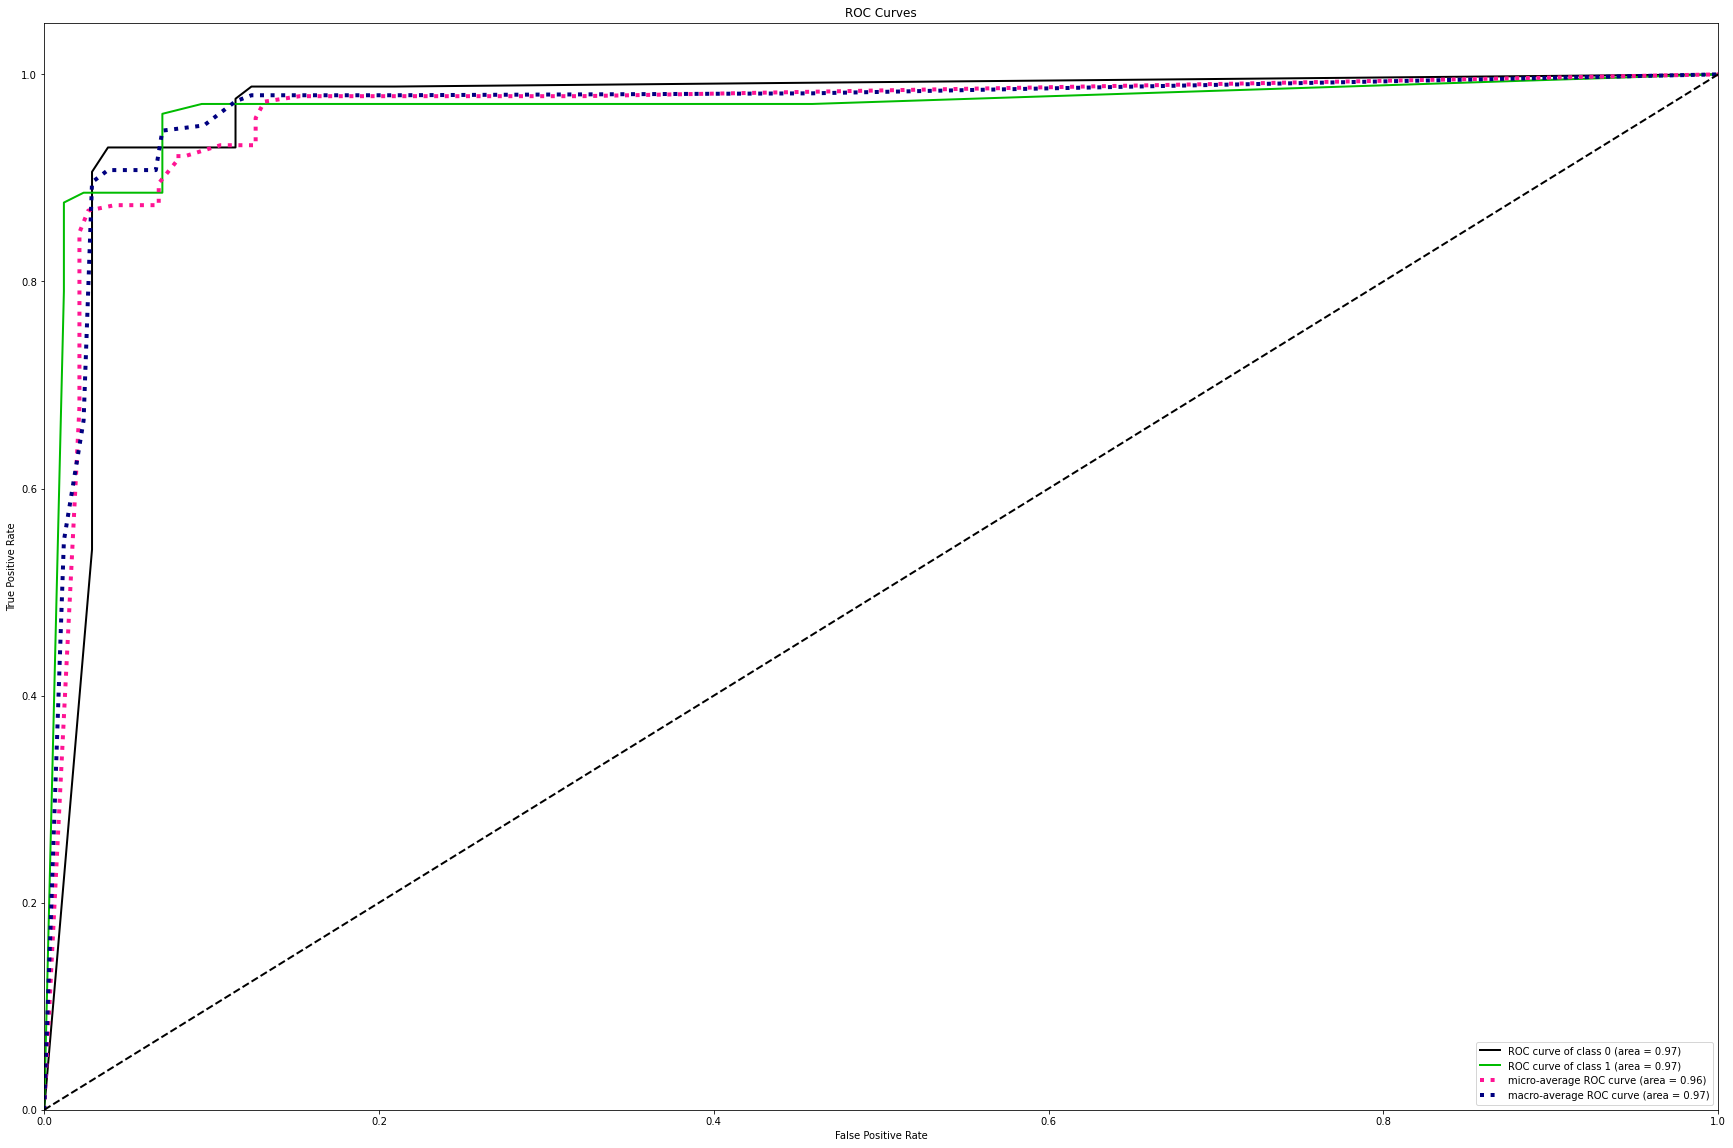

In [28]:
res_train = []
res_test = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    print(i)
    err1, err2 = model_fit(model, train_X, train_y, test_X)
    res_train.append(err1)
    res_test.append(err2)

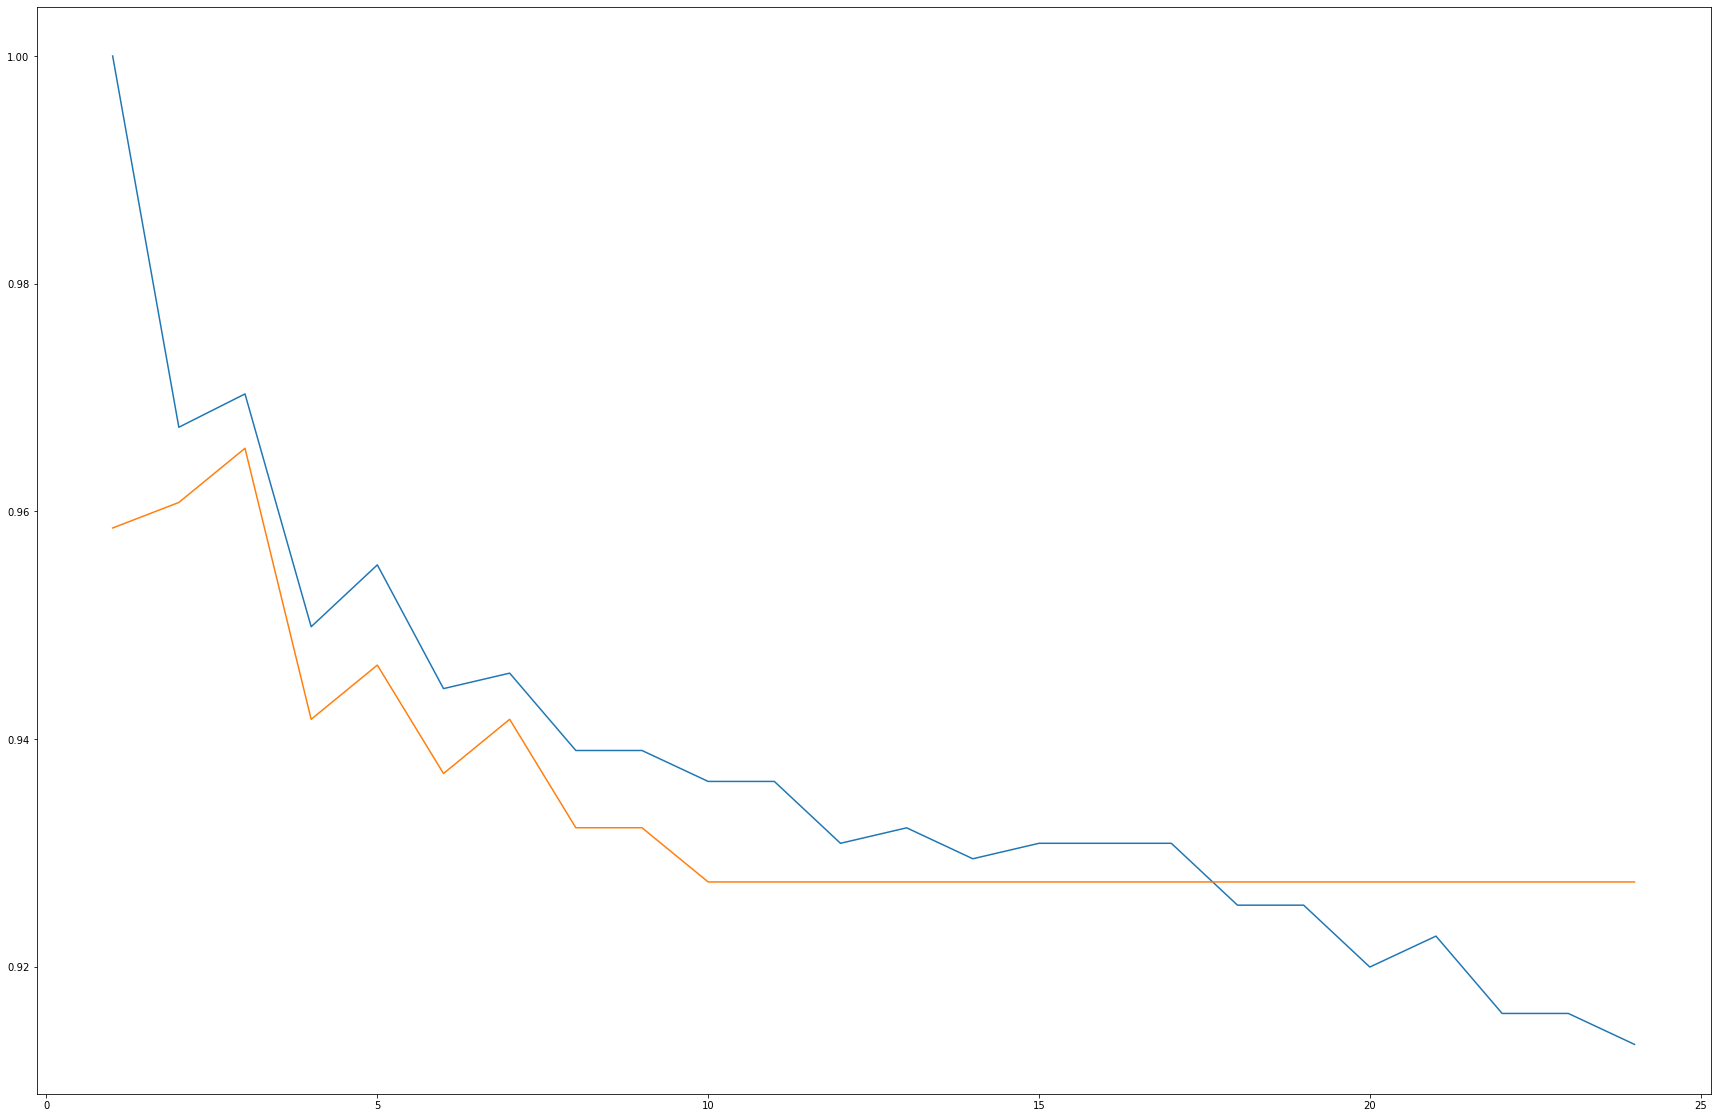

In [29]:
plt.plot(range(1,25),res_train)
plt.plot(range(1,25),res_test)

Train Accuracy :  0.9708994708994709
Train confusion matrix : 
 [[385   3]
 [ 19 349]]
Train AUC :  0.9703188032272524
Test Accuracy :  0.9631578947368421
Test confusion matrix : 
 [[84  1]
 [ 6 99]]
Test AUC :  0.9655462184873951


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


(0.9703188032272524, 0.9655462184873951)

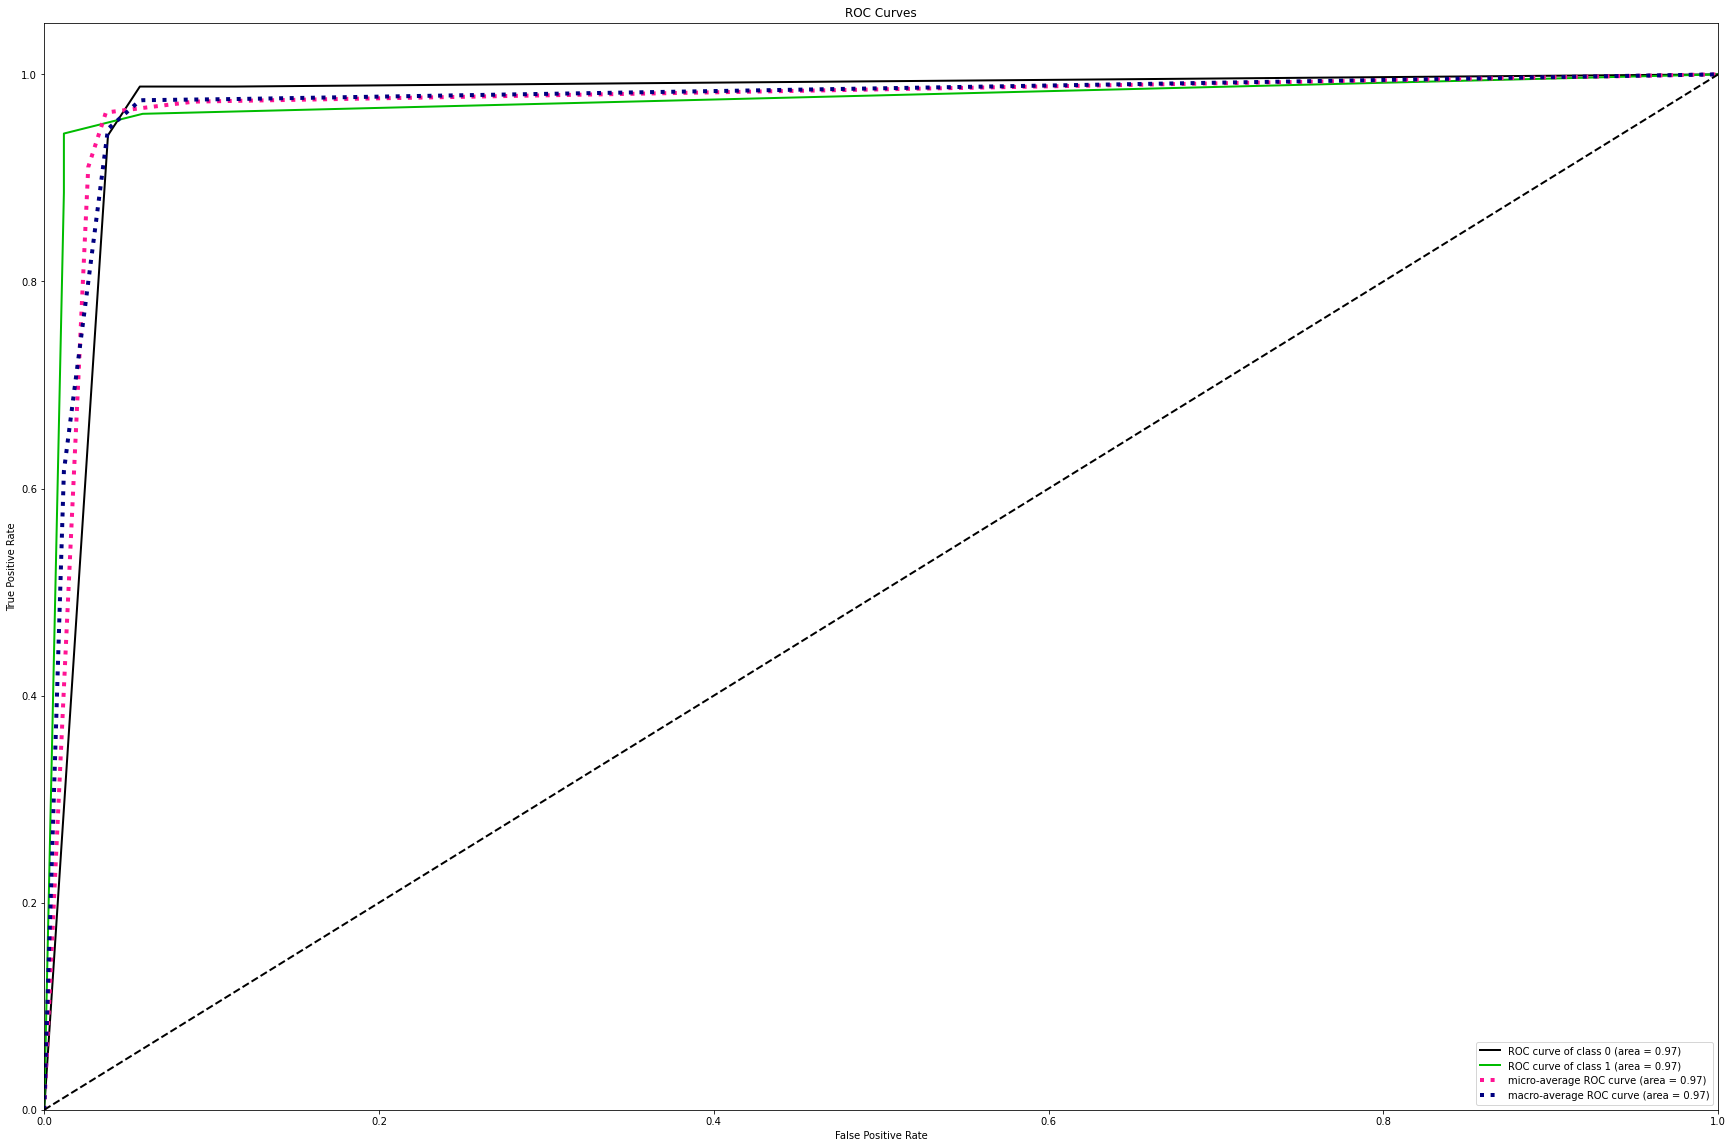

In [30]:
model = KNeighborsClassifier(n_neighbors=3)
model_fit(model, train_X, train_y, test_X)

In [31]:
data_undersampled['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

Train Accuracy :  0.9708994708994709
Train confusion matrix : 
 [[382   6]
 [ 16 352]]
Train AUC :  0.9705289108023308
Test Accuracy :  0.9473684210526315
Test confusion matrix : 
 [[81  4]
 [ 6 99]]
Test AUC :  0.9478991596638654


C:\Users\nived\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


(0.9705289108023308, 0.9478991596638654)

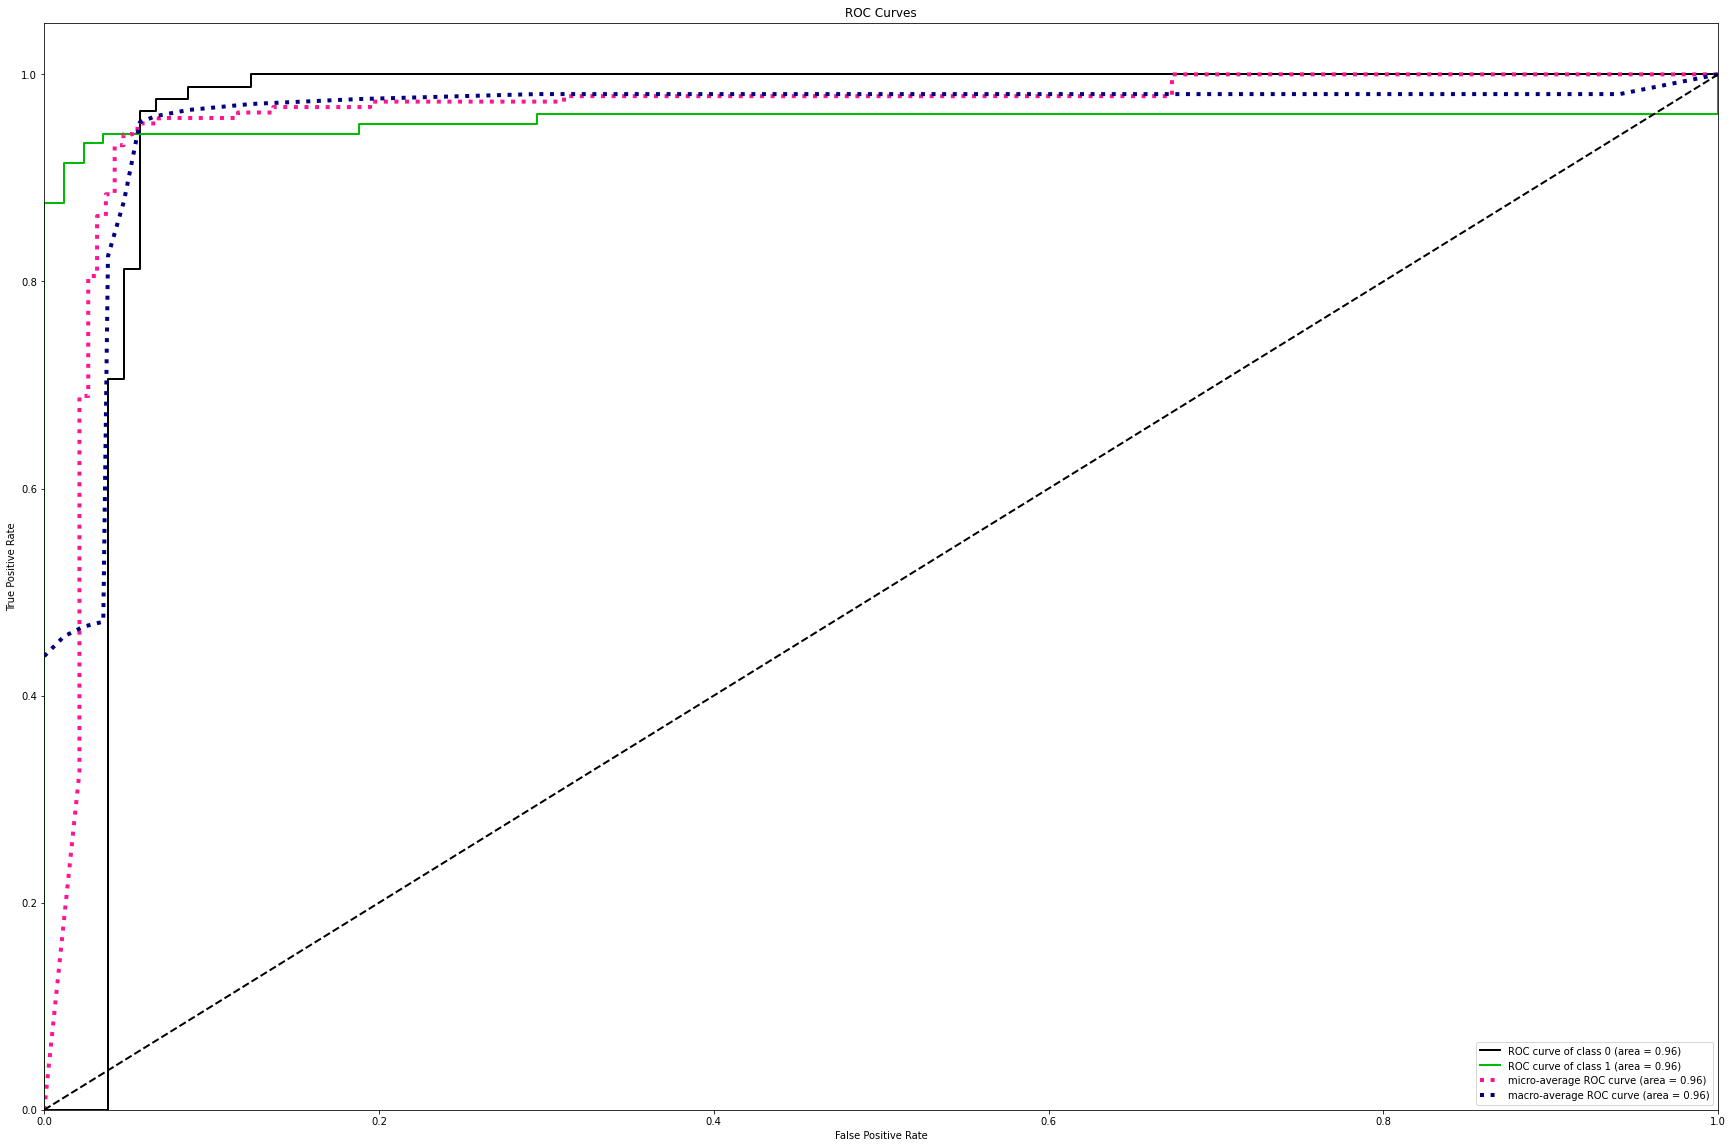

In [32]:
model = LogisticRegression(penalty='none')
model_fit(model, train_X, train_y, test_X)

Train Accuracy :  0.9722222222222222
Train confusion matrix : 
 [[384   4]
 [ 17 351]]
Train AUC :  0.9717475347377857
Test Accuracy :  0.9473684210526315
Test confusion matrix : 
 [[82  3]
 [ 7 98]]
Test AUC :  0.9490196078431373


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


(0.9717475347377857, 0.9490196078431373)

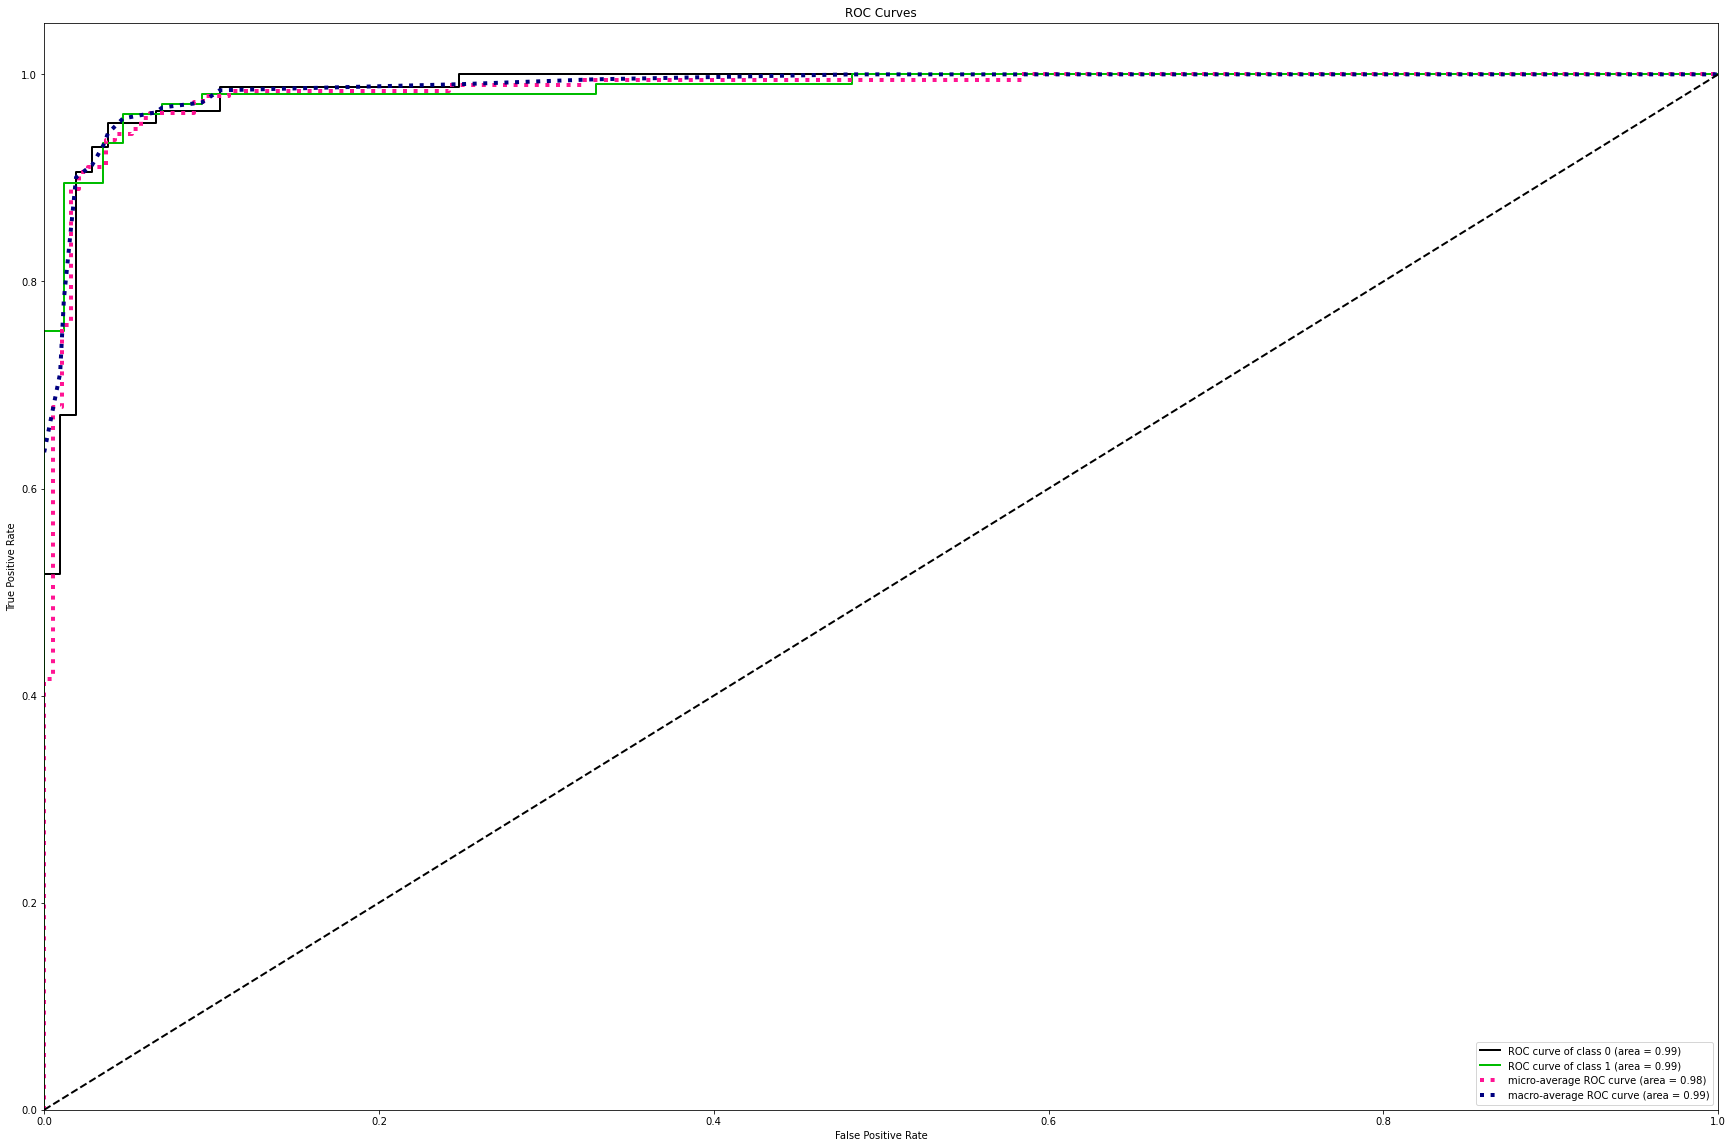

In [33]:
model = LogisticRegression(penalty='l1',solver='liblinear')
model_fit(model, train_X, train_y, test_X)

Train Accuracy :  0.9537037037037037
Train confusion matrix : 
 [[382   6]
 [ 29 339]]
Train AUC :  0.9528658673240701
Test Accuracy :  0.9421052631578948
Test confusion matrix : 
 [[82  3]
 [ 8 97]]
Test AUC :  0.9442577030812325


C:\Users\nived\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


(0.9528658673240701, 0.9442577030812325)

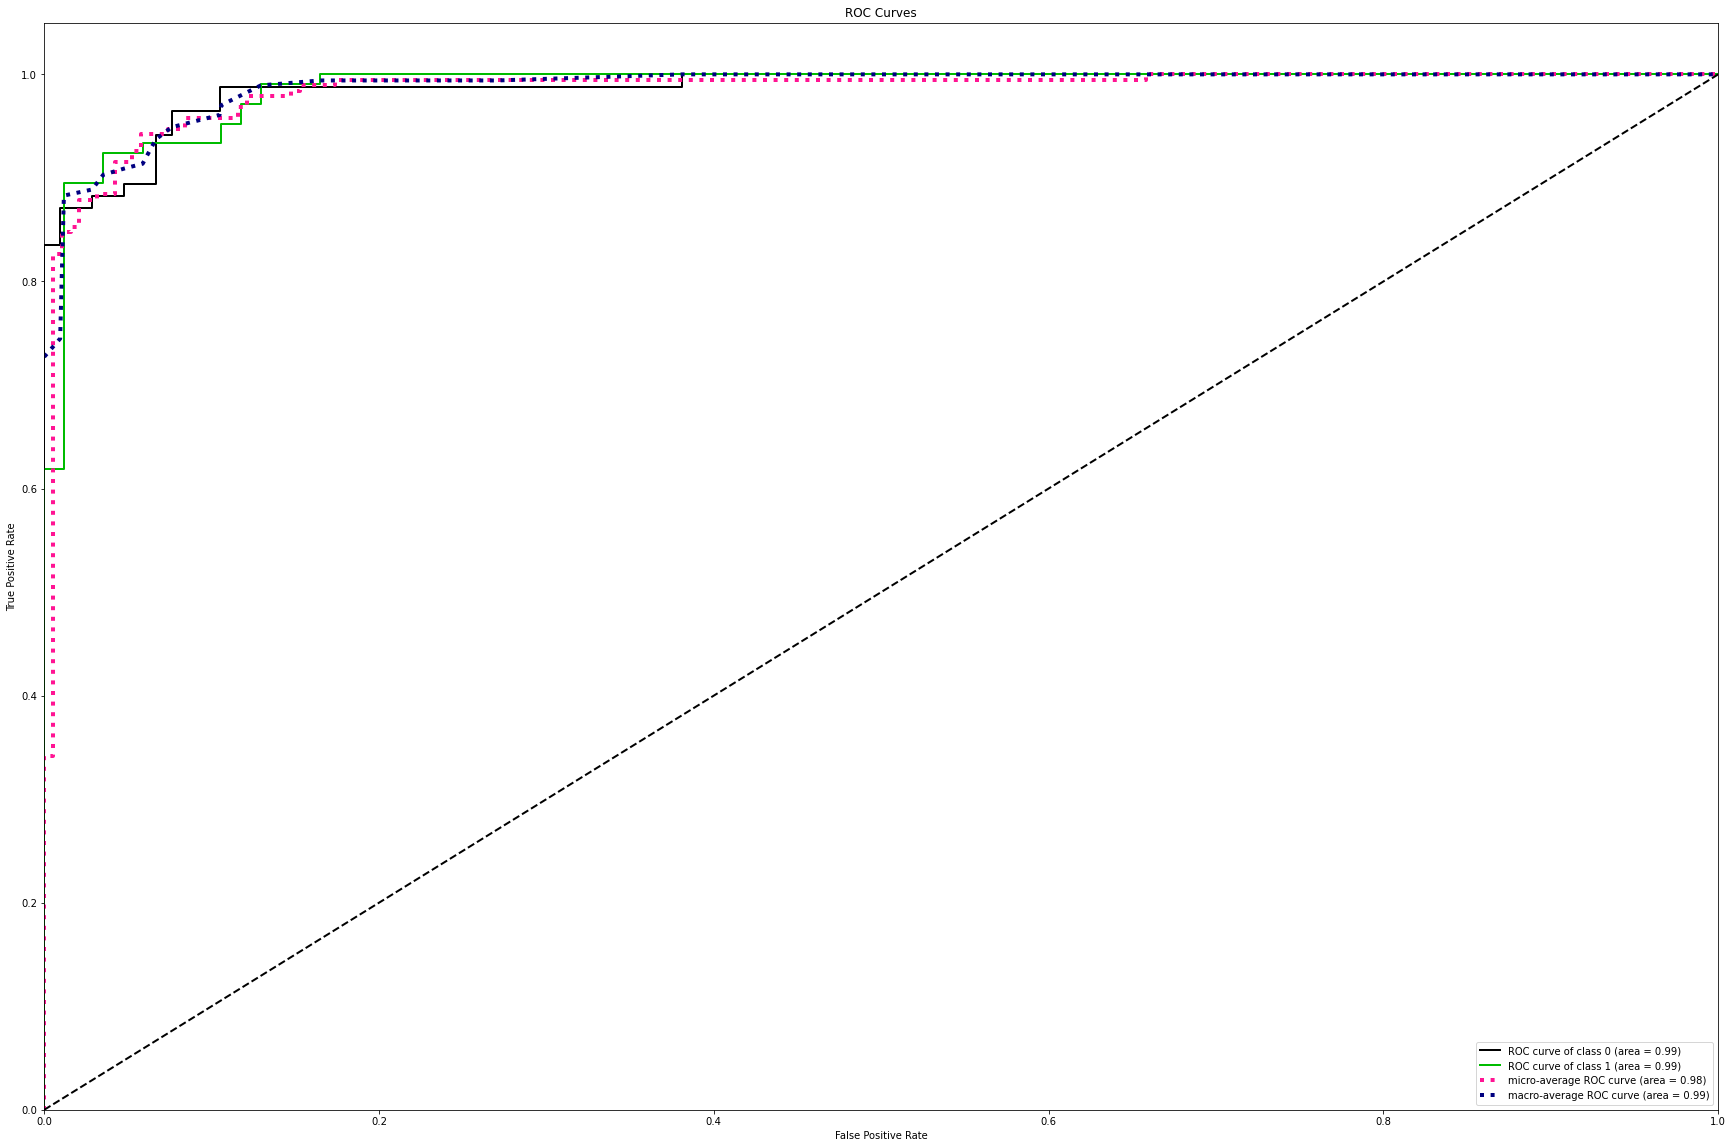

In [34]:
model = LogisticRegression(penalty='elasticnet',l1_ratio=1,solver='saga')
model_fit(model, train_X, train_y, test_X)

Train Accuracy :  0.9722222222222222
Train confusion matrix : 
 [[384   4]
 [ 17 351]]
Train AUC :  0.9717475347377857
Test Accuracy :  0.9473684210526315
Test confusion matrix : 
 [[82  3]
 [ 7 98]]
Test AUC :  0.9490196078431373


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

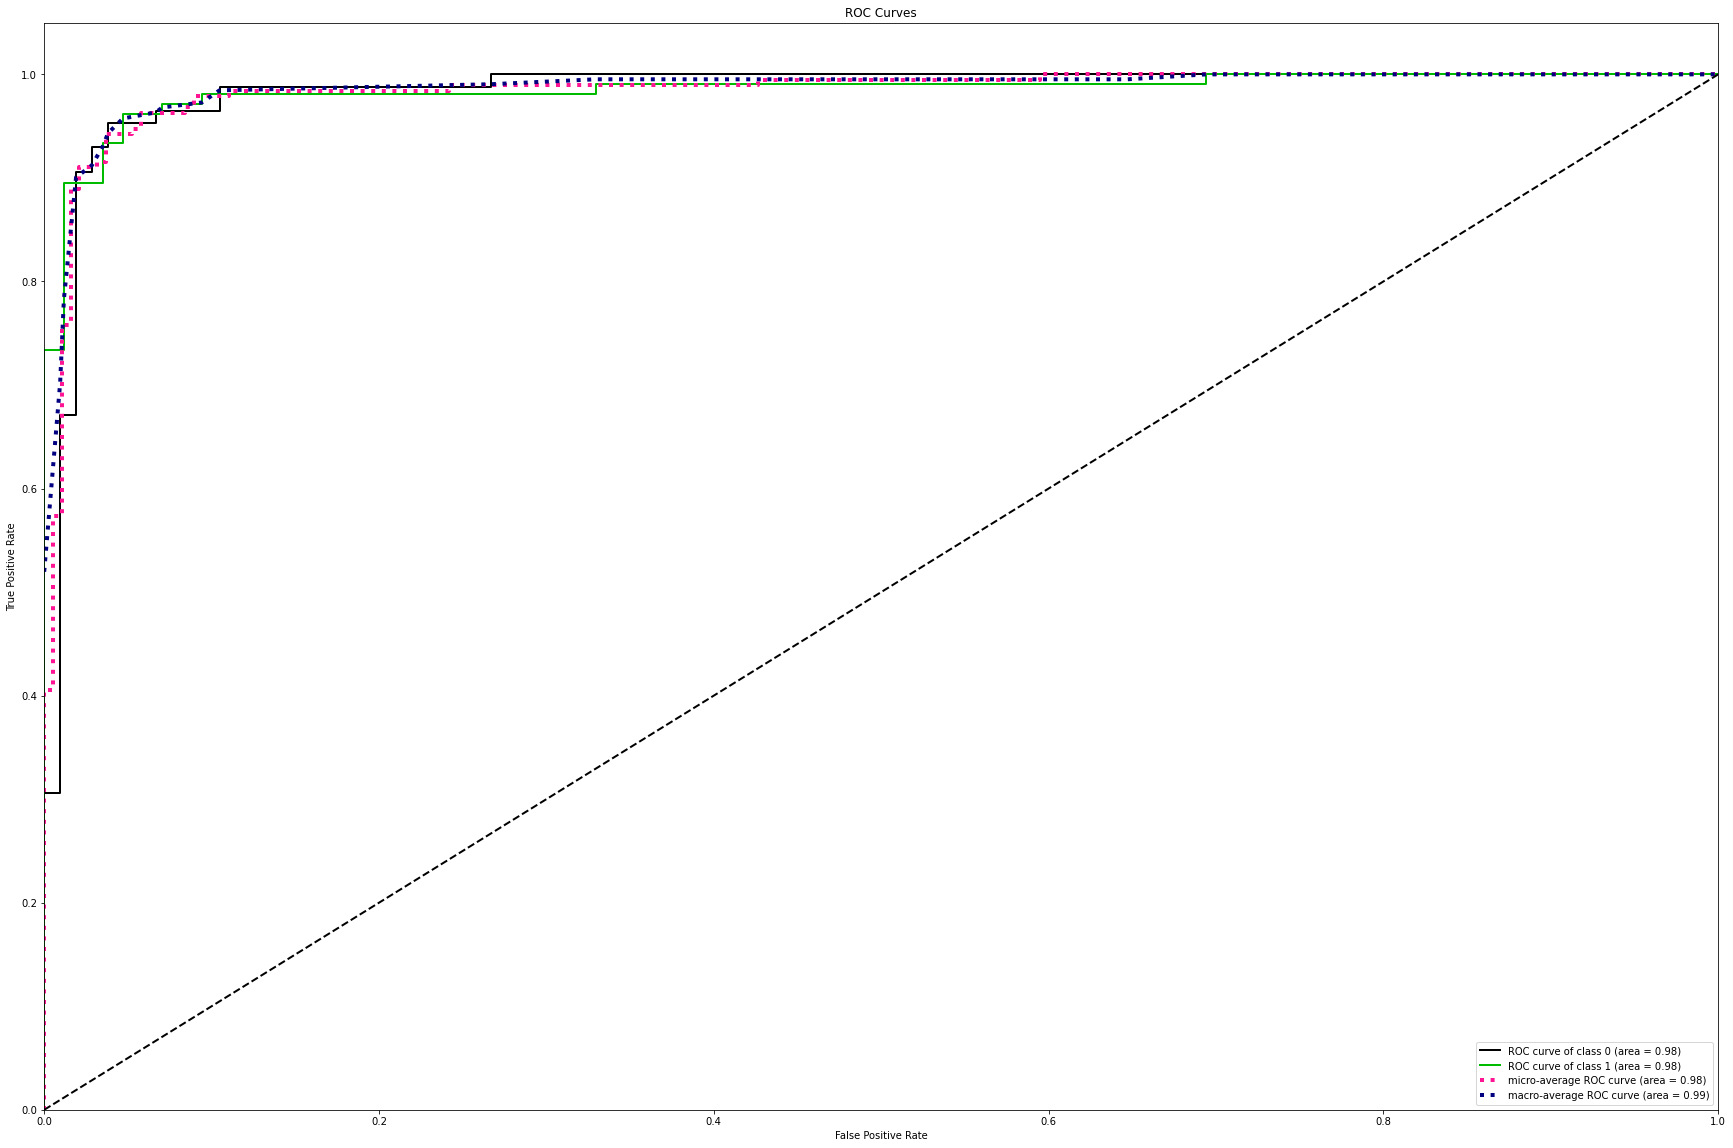

In [35]:
model = LogisticRegression(penalty='l1',solver='liblinear')
model.fit(train_X, train_y)
train_pred = model.predict(train_X)
print("Train Accuracy : ",accuracy_score(train_y, train_pred))
print("Train confusion matrix : \n",confusion_matrix(train_y, train_pred))
print("Train AUC : ", roc_auc_score(train_y, train_pred))
test_pred = model.predict(test_X)
print("Test Accuracy : ",accuracy_score(test_y, test_pred))
print("Test confusion matrix : \n",confusion_matrix(test_y, test_pred))
print("Test AUC : ", roc_auc_score(test_y, test_pred))
skplt.metrics.plot_roc_curve(test_y, model.predict_proba(test_X))

In [36]:
test_data_res = pd.concat([test_X,test_y], axis=1)

In [37]:
test_probab = model.predict_proba(test_X)[:,1]

In [38]:
test_data_res['res_proba'] = test_probab

In [39]:
test_data_res['res'] = test_pred

In [40]:
test_data_res[((test_data_res['Class']==1)  & (test_data_res['res']==0))]

V1        V2        V3        V4        V5        V6        V7  \
634  0.635481  0.321042 -0.358258  0.857148  0.346919 -0.147372  0.038582   
533  0.574643  0.688821 -0.639360  1.894137  0.717678 -0.181825  0.256090   
699  0.629709 -0.330841  0.720007  0.634323 -1.042031 -0.267025 -0.585905   
628 -0.250227  0.645945  0.427861  0.642458  0.593709 -0.067604  0.409180   
724  0.571165  0.787024 -0.861958  1.512350  0.559457 -0.860521  0.316681   
719  0.582978  0.786622 -0.950841  1.457499  0.681912 -0.718608  0.317150   
789 -0.755244 -0.661470 -0.040685  0.755031  8.056074 -4.076670 -7.640399   

           V8        V9       V10  ...        V23       V24       V25  \
634  0.032777  0.118408 -0.512318  ...  -0.309514 -1.515138  1.308825   
533  0.105012 -1.042224 -0.342314  ...  -0.180494 -0.977982  0.999625   
699  0.003410 -0.090188  0.505969  ...   0.020258  1.154183  1.012031   
628  0.137330 -0.696909 -0.510128  ...  -0.280354 -0.725072  0.459483   
724 -0.090087 -0.033540 -1.998390  ...  -0.164380  0.029220  1.248100   
719 -0.077744 -0.028510 -2.000976  ...  -0.231054 -0.504258  1.338681   
789 -0.377932  1.819921  1.660492  ... -25.624202 -1.459456 -6.785020   

          V26       V27       V28    Amount  Class  res_proba  res  
634 -0.403624  0.111573  0.120688 -0.349333      1   0.042954    0  
533  0.089625  0.033850  0.192254 -0.338311      1   0.162159    0  
699 -0.669546  0.199732  0.106333 -0.275092      1   0.240040    0  
628 -0.452177 -0.188545  0.030229 -0.349333      1   0.428015    0  
724 -0.689791  0.263266  0.388922 -0.349333      1   0.422786    0  
719 -0.648673  0.264021  0.379581 -0.349333      1   0.428477    0  
789 -1.230395  1.702523  1.293501 -0.349653      1   0.026367    0  

[7 rows x 31 columns]

In [41]:
test_data_res['pred_customized_threshold'] = np.where(test_probab>0.4,1,0)

In [42]:
print("Test confusion matrix : \n",confusion_matrix(test_y, test_data_res['pred_customized_threshold']))
print("Test AUC : ", roc_auc_score(test_y, test_data_res['pred_customized_threshold']))

Test confusion matrix : 
 [[ 81   4]
 [  4 101]]
Test AUC :  0.9574229691876751


In [43]:
from imblearn.over_sampling import RandomOverSampler

In [44]:
nm = RandomOverSampler()

In [45]:
X_over, y_over = nm.fit_resample(data_scale.drop(columns='Class'), data_scale['Class'])

C:\Users\nived\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

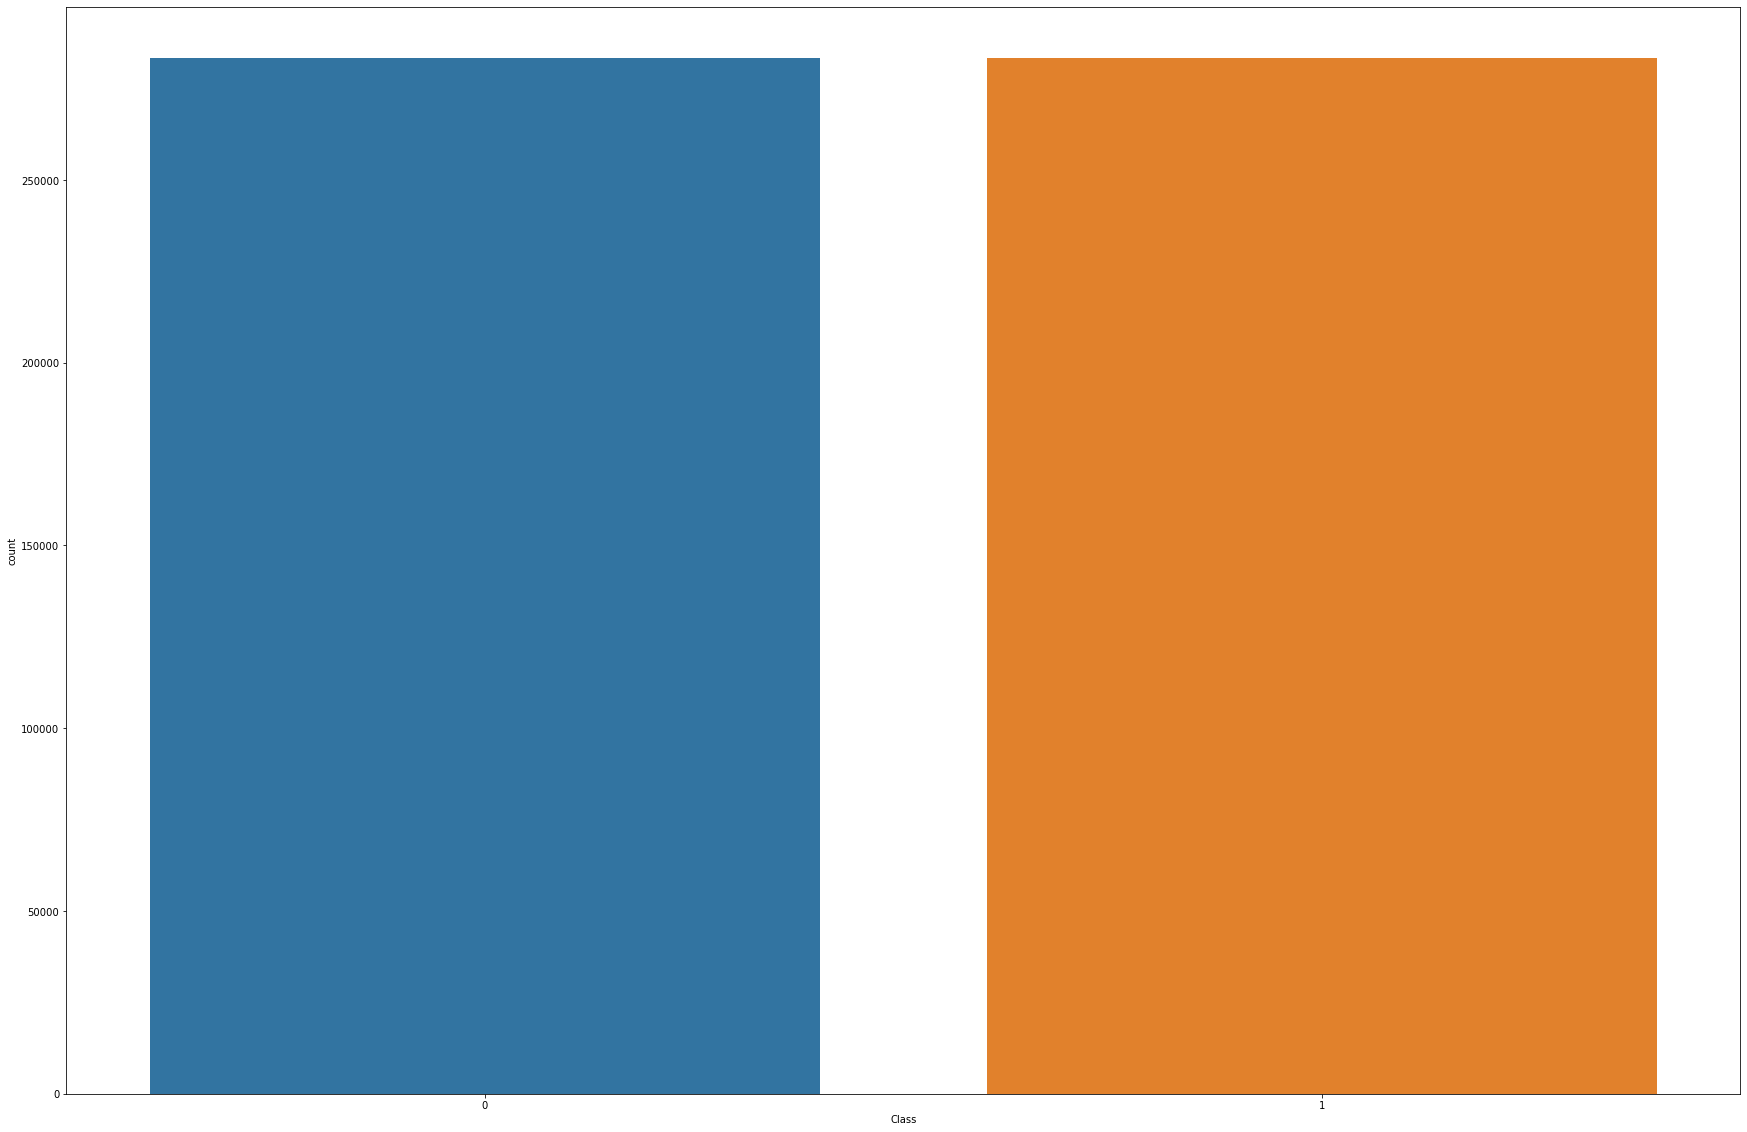

In [46]:
sns.countplot(y_over)

In [47]:
data_oversampled_randam_sample = pd.concat([X_over, y_over], axis = 1)

<AxesSubplot:>

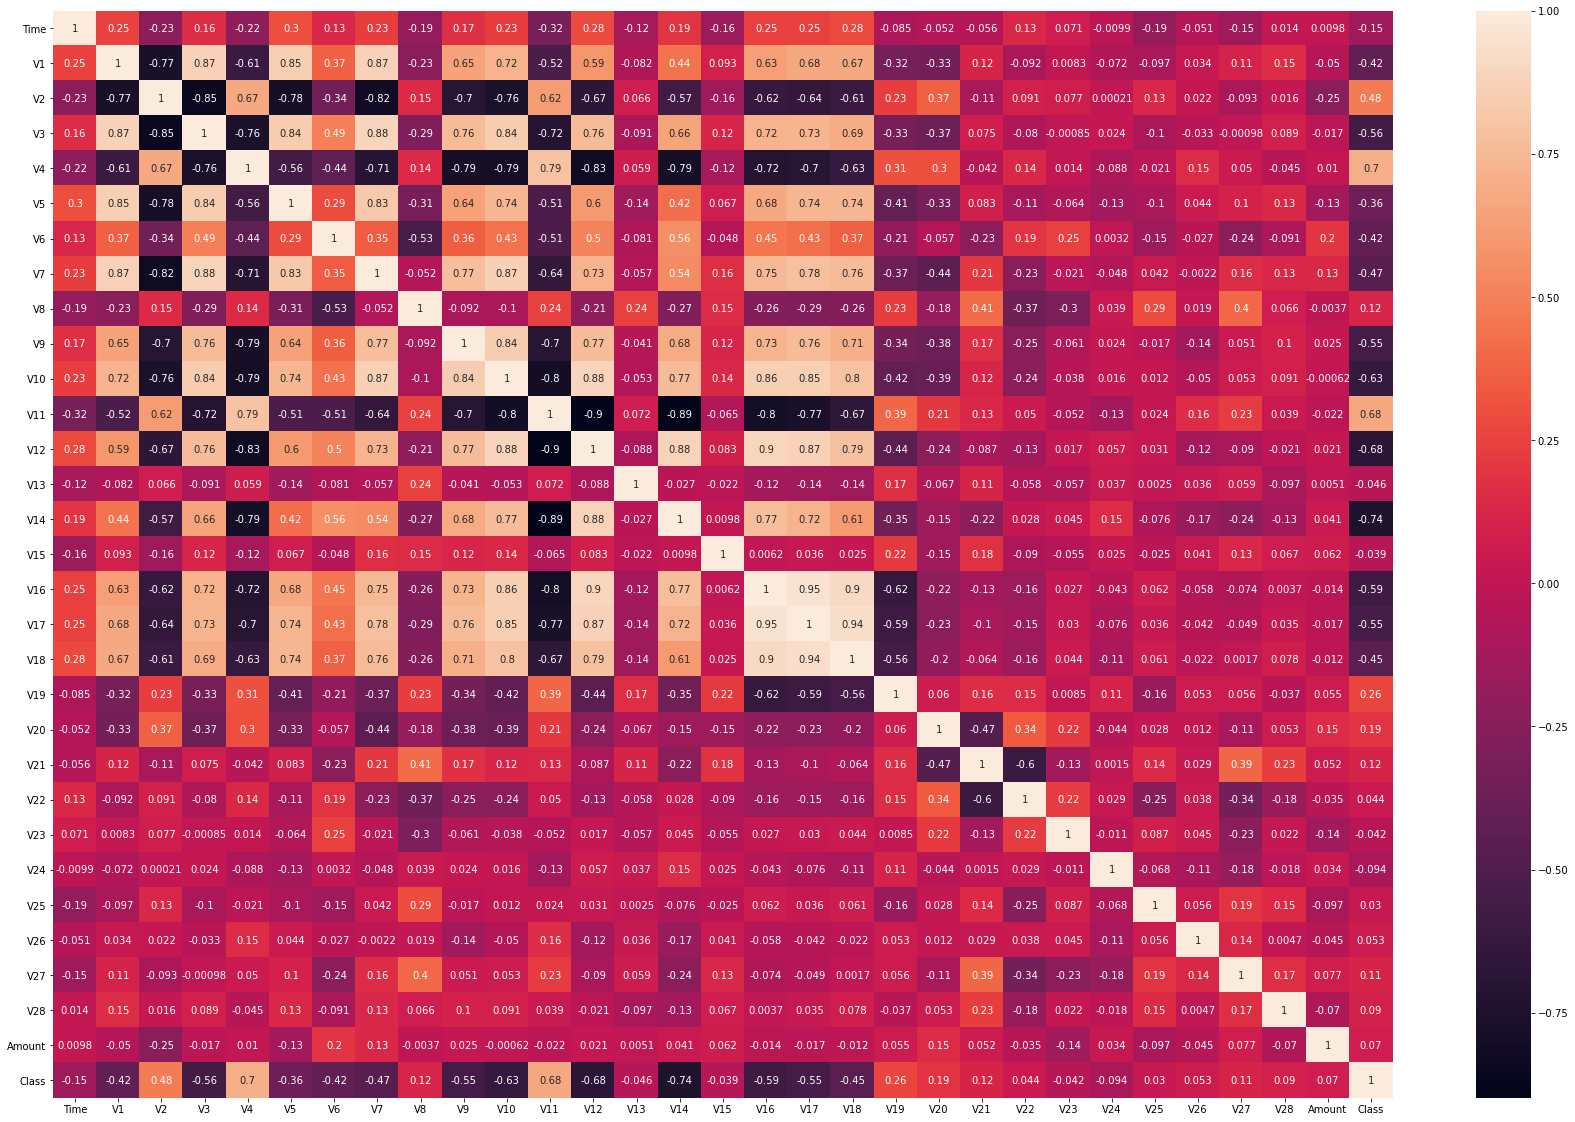

In [48]:
sns.heatmap(data_oversampled_randam_sample.corr(), annot=True,)

In [49]:
data_oversampled_randam_sample

Time        V1        V2        V3        V4        V5        V6  \
0      -1.996823 -0.701082 -0.041687  1.680101  0.976623 -0.247020  0.348012   
1      -1.996823  0.608792  0.164138  0.109279  0.318998  0.042258 -0.060980   
2      -1.996802 -0.700336 -0.811337  1.174270  0.270648 -0.366756  1.352655   
3      -1.996802 -0.499064 -0.109972  1.187383 -0.608355 -0.008814  0.937245   
4      -1.996781 -0.597606  0.535539  1.025470  0.287092 -0.297036  0.072873   
...          ...       ...       ...       ...       ...       ...       ...   
566501 -1.266278 -0.444935  1.904369 -3.350335  3.835368 -1.812606 -1.359043   
566502 -0.399320 -2.463824  2.078730 -3.364570  2.856036 -2.563317 -1.443097   
566503  0.661485 -0.589047  1.173125 -2.589662 -0.050189 -0.033904 -1.318284   
566504  1.121774 -1.142253  0.444505 -3.618955  4.191694  2.854480 -2.316074   
566505  1.565489 -0.992699  0.686092 -2.995961  1.239062 -1.138931 -1.508606   

              V7        V8        V9  ...       V21       V22       V23  \
0       0.193700  0.084434  0.333534  ... -0.024777  0.383483 -0.177444   
1      -0.065656  0.072903 -0.231703  ... -0.311372 -0.881454  0.162081   
2       0.643223  0.210788 -1.381169  ...  0.343094  1.065068  1.457772   
3       0.192079  0.320843 -1.264664  ... -0.149093  0.007299 -0.305465   
4       0.481517 -0.228725  0.747917  ... -0.012516  1.101780 -0.220709   
...          ...       ...       ...  ...       ...       ...       ...   
566501 -4.464518  1.009562 -3.566082  ...  1.648088  0.124727 -0.548466   
566502 -4.127995  1.694360 -2.825933  ...  1.614830  0.399622 -0.596578   
566503 -0.993121  0.309925 -2.527225  ...  0.141526 -0.733533 -0.527399   
566504 -1.368187  0.734428 -2.898851  ...  0.577204 -1.128051 -0.046417   
566505 -0.720598  0.592056 -1.883493  ...  1.076041 -0.440514  1.024883   

             V24       V25       V26       V27       V28    Amount  Class  
0       0.110157  0.247059 -0.392622  0.333033 -0.065850  0.244200      0  
1      -0.561503  0.321175  0.260854 -0.027154  0.043219 -0.342584      0  
2      -1.138484 -0.628161 -0.288861 -0.144325 -0.183824  1.158900      0  
3      -1.941446  1.242487 -0.460694  0.154039  0.185687  0.139886      0  
4       0.232904 -0.394800  1.041677  0.550001  0.654234 -0.073813      0  
...          ...       ...       ...       ...       ...       ...    ...  
566501 -0.356884  2.020770  0.562158  3.465724  2.105466 -0.277368      1  
566502  0.238674  0.163016 -0.409875  0.826062  2.545065  0.045437      1  
566503  0.648727  1.091032  1.631473 -0.373638  0.230665 -0.253486      1  
566504  0.042119 -1.583984 -0.027463  1.039887 -0.402208 -0.353327      1  
566505 -0.487263  1.031686  1.635188  0.735115  0.449417  1.204187      1  

[566506 rows x 31 columns]

In [50]:
X = data_oversampled_randam_sample.drop(columns=["Class", "Time", "V13"])

In [51]:
y = data_oversampled_randam_sample['Class']

In [52]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state=9)

In [53]:
model = KNeighborsClassifier()


In [54]:

model.fit(train_X, train_y)


KNeighborsClassifier()

In [55]:
#train_pred = model.predict(train_X)



In [56]:
#print("Train Accuracy : ",accuracy_score(train_y, train_pred))


In [57]:
#print("Train confusion matrix : \n",confusion_matrix(train_y, train_pred))


In [58]:
#print("Train AUC : ", roc_auc_score(train_y, train_pred))


In [59]:
test_pred = model.predict(test_X)
print("Test Accuracy : ",accuracy_score(test_y, test_pred))
print("Test confusion matrix : \n",confusion_matrix(test_y, test_pred))
print("Test AUC : ", roc_auc_score(test_y, test_pred))

Test Accuracy :  0.9996822650968209
Test confusion matrix : 
 [[56584    36]
 [    0 56682]]
Test AUC :  0.999682091133875


C:\Users\nived\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

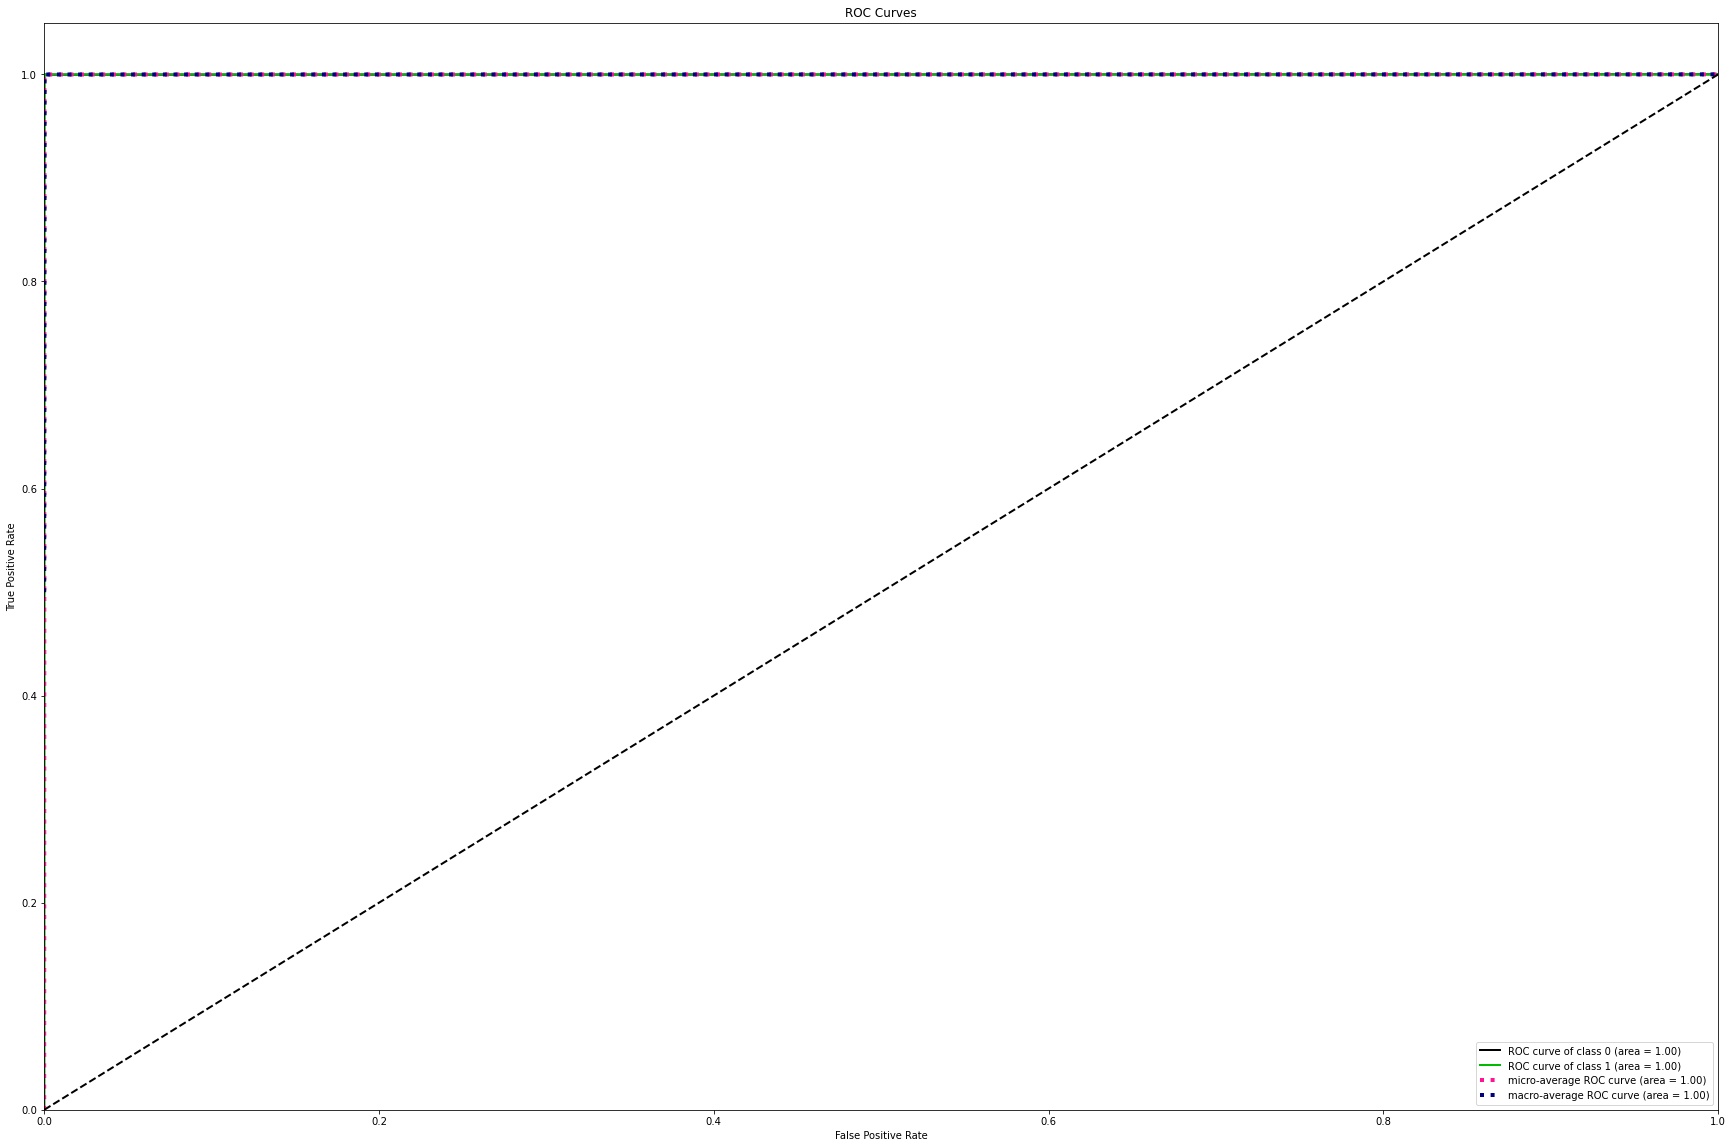

In [60]:
skplt.metrics.plot_roc_curve(test_y, model.predict_proba(test_X))